# FORENSIC ANALYSIS

## Displaying Images


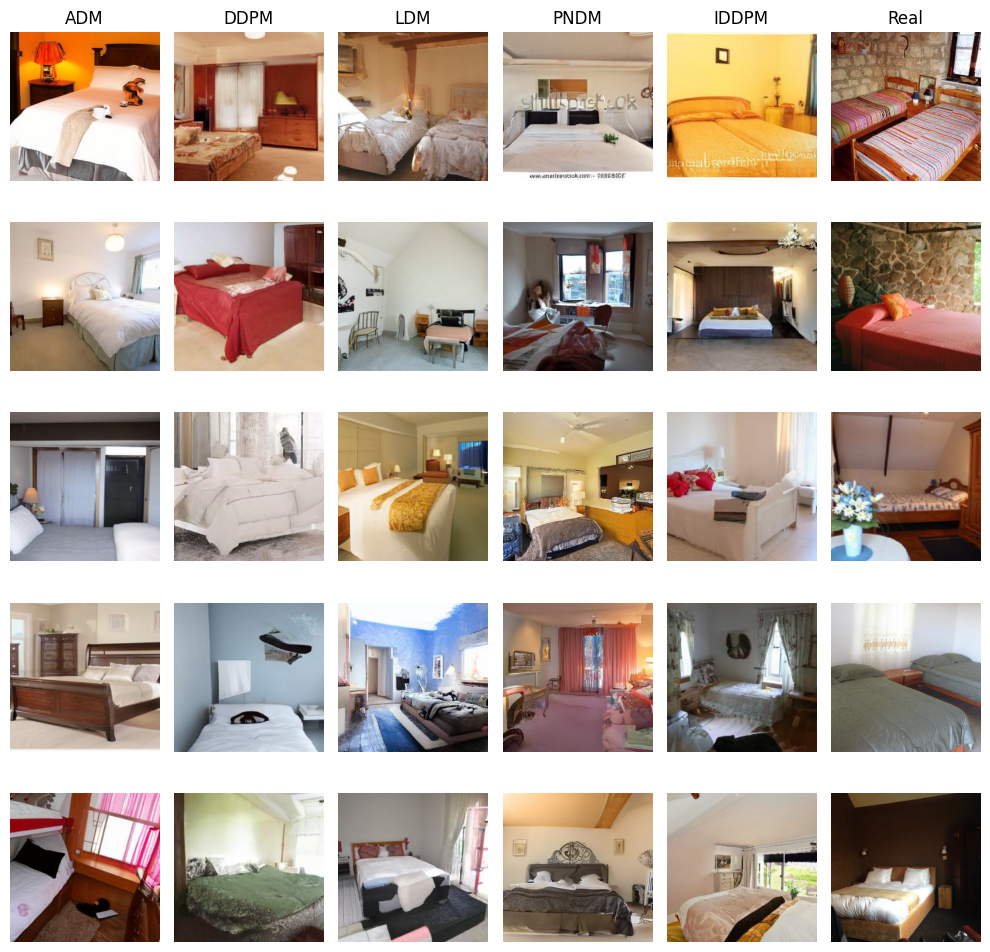

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def visualize_images(root_folder, num_images=5):
    subfolders = [subfolder for subfolder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, subfolder))]

    subfolders = ['ADM', 'DDPM', 'LDM', 'PNDM', 'IDDPM', 'Real']


    # Create a dictionary to store images for each subfolder
    image_dict = {subfolder: [] for subfolder in subfolders}

    # Collect images for each subfolder
    for subfolder in subfolders:
        folder_path = os.path.join(root_folder, subfolder)
        image_files = os.listdir(folder_path)

        count = 0
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            image = Image.open(image_path)

            if image is not None:
                image_dict[subfolder].append(image)
                count += 1

            if count == num_images:
                break

    # Display the images in the desired format
    num_columns = len(subfolders)
    num_rows = num_images

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10))

    for row in range(num_rows):
        for col, subfolder in enumerate(subfolders):
            images = image_dict[subfolder]

            if row < len(images):
                axes[row, col].imshow(images[row])
                axes[row, col].axis('off')
            else:
                # Display an empty space if there are no more images
                axes[row, col].axis('off')

    # Set the subfolder names as column labels
    for ax, col in zip(axes[0], range(num_columns)):
        ax.set_title(subfolders[col])

    plt.tight_layout()
    plt.show()

## Function Calling

root_folder = "/content/drive/MyDrive/Trail_2000"
num_images_per_folder = 5

visualize_images(root_folder, num_images_per_folder)


## Image Details Table

In [ ]:
import os
from PIL import Image
from tabulate import tabulate
from colorama import Fore, Style

def get_image_details_from_folders(root_folder):
    subfolders = [subfolder for subfolder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, subfolder))]
    subfolders = ['ADM', 'DDPM', 'LDM', 'PNDM', 'IDDPM', 'Real']
    image_details = []

    for subfolder in subfolders:
        folder_path = os.path.join(root_folder, subfolder)
        image_files = os.listdir(folder_path)

        if image_files:
            image_file = image_files[0]  # Get the first image in the folder
            image_path = os.path.join(folder_path, image_file)
            image = Image.open(image_path)
            image_format = image.format
            image_size = image.size
            image_pixels = image_size[0] * image_size[1]
            image_ratio = image_size[0] / image_size[1]
            file_size = os.path.getsize(image_path)

            details = {
                'Folder': subfolder,
                'Format': image_format,
                'Size': image_size,
                'Pixels': image_pixels,
                'Aspect Ratio': image_ratio
                # 'File Size': file_size
            }
            image_details.append(details)

    headers = image_details[0].keys()
    rows = [list(detail.values()) for detail in image_details]

    table = tabulate(rows, headers, tablefmt='grid')

    # Add colors to the table headers and rows
    colored_headers = [f"{Fore.BLUE}{Style.BRIGHT}{header}{Style.RESET_ALL}" for header in headers]
    colored_rows = [[f"{Fore.GREEN}{cell}{Style.RESET_ALL}" for cell in row] for row in rows]

    table = tabulate(colored_rows, colored_headers, tablefmt='grid')

    # Set the title for the table
    title = f"{Fore.YELLOW}{Style.BRIGHT}Image Details by Architecture{Style.RESET_ALL}"
    table_with_title = title + "\n" + table

    print(table_with_title)


root_folder = "/content/drive/MyDrive/Trail_2000"
get_image_details_from_folders(root_folder)


Image Details by Architecture
+----------+----------+------------+----------+----------------+
| Folder   | Format   | Size       |   Pixels |   Aspect Ratio |
+==========+==========+============+==========+================+
| ADM      | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| DDPM     | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| LDM      | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| PNDM     | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| IDDPM    | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| Real     | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+-------------

# 1. Autocorrelation in Spatial Domain

## Data Augmentation : Medium Denoised

Processing subfolder: ADM
1000


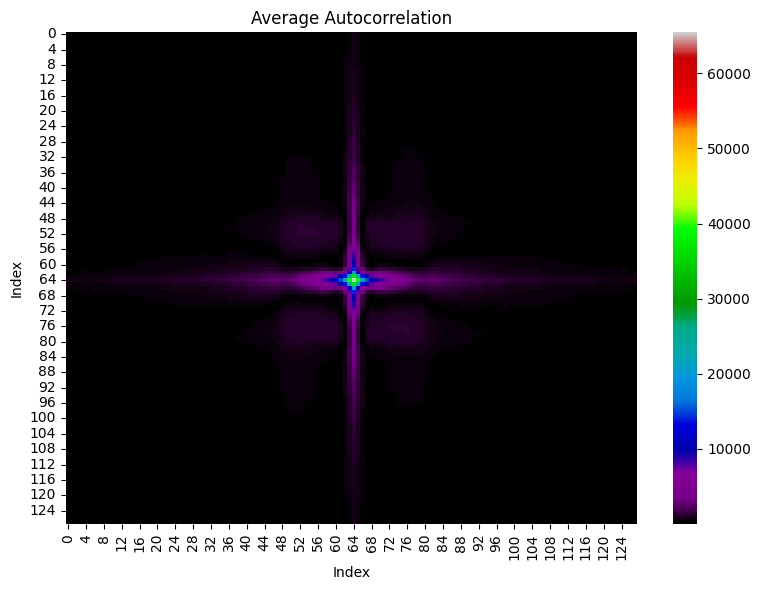

Mean: (-5.329070518200751e-15+6.162975822039155e-33j)
Max: (65439.244509563876+0j)
Min: (-1315.2111996630354-2.325564238462471e-14j)
SD: 603.5271688644966
Processing subfolder: DDPM
1000


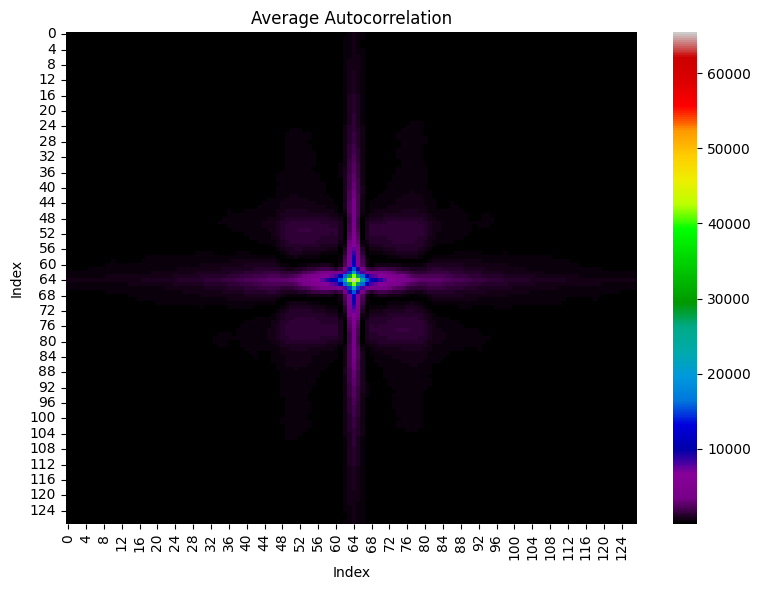

Mean: (-4.440892098500626e-16-2.465190328815662e-32j)
Max: (65412.382977642665+0j)
Min: (-1544.8943898692457+1.6680298464164537e-14j)
SD: 657.136842859528
Processing subfolder: LDM
1000


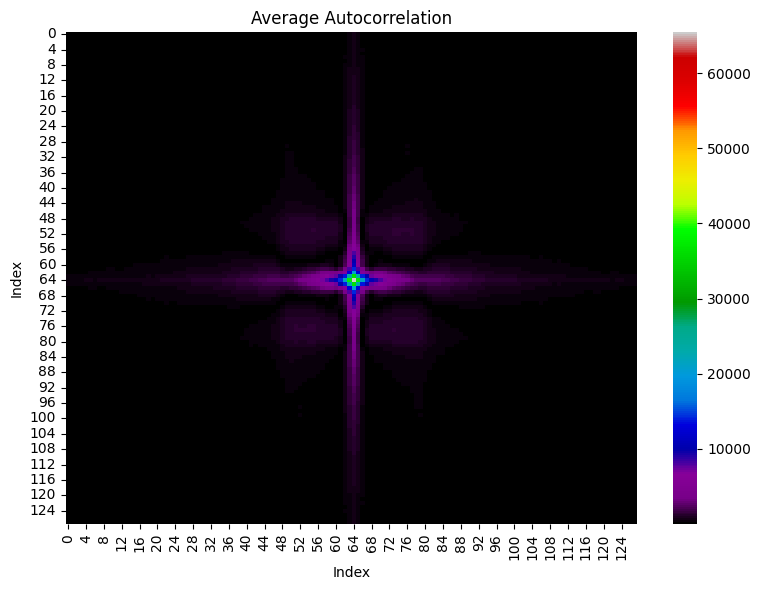

Mean: (-2.6645352591003757e-15-2.465190328815662e-32j)
Max: (65437.258512832625+0j)
Min: (-1312.2513030417074-2.685413715328502e-14j)
SD: 593.8661547196745
Processing subfolder: Real
1000


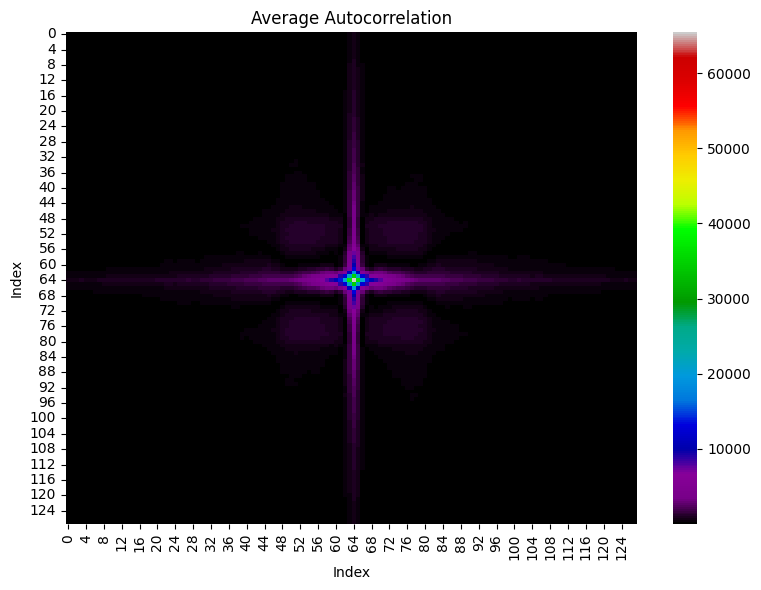

Mean: (3.552713678800501e-15-8.936314941956774e-32j)
Max: (65430.64852480344+0j)
Min: (-1163.3143567534528-1.0218723239572959e-14j)
SD: 565.8820307511778
Processing subfolder: PNDM
1000


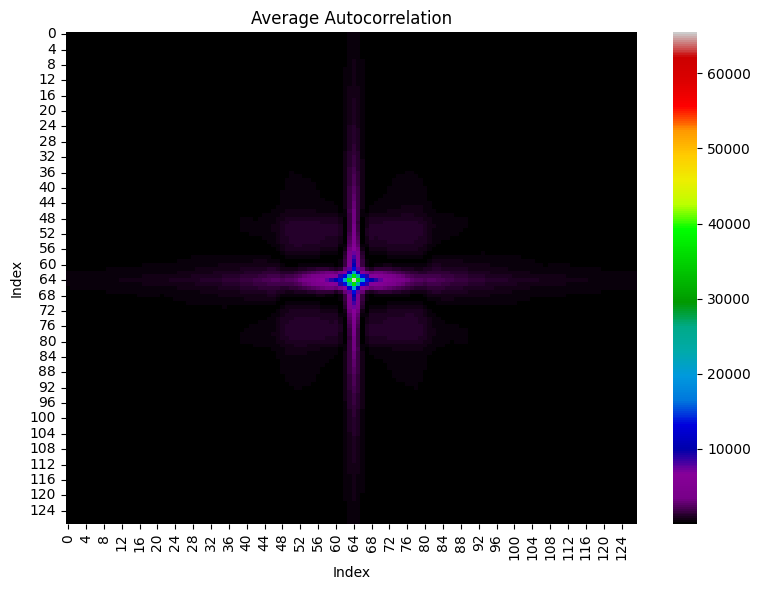

Mean: (-1.7763568394002505e-15+1.8488927466117464e-32j)
Max: (65445.55074525603+0j)
Min: (-1226.4898088143357-7.332485928897741e-15j)
SD: 575.7754097362724
Processing subfolder: IDDPM
1000


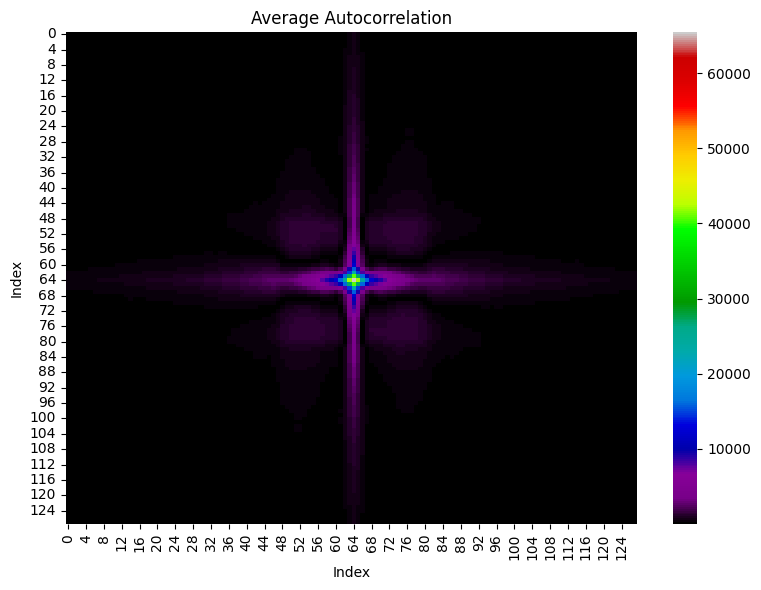

Mean: (-4.440892098500626e-15+1.1709654061874394e-31j)
Max: (65418.64208320235+0j)
Min: (-1521.3444712254845-1.8254602338538322e-14j)
SD: 659.1372484845127


In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    return image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        # fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))
        fft_image = (np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
          power_spectrum = np.abs(fft_image) ** 2
        else:
          power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr

def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(denoised_image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:10]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    calculate_power_spectrum_statistics(avg_autocorr)

# Data Augmentation : No Change

Processing subfolder: ADM
1000


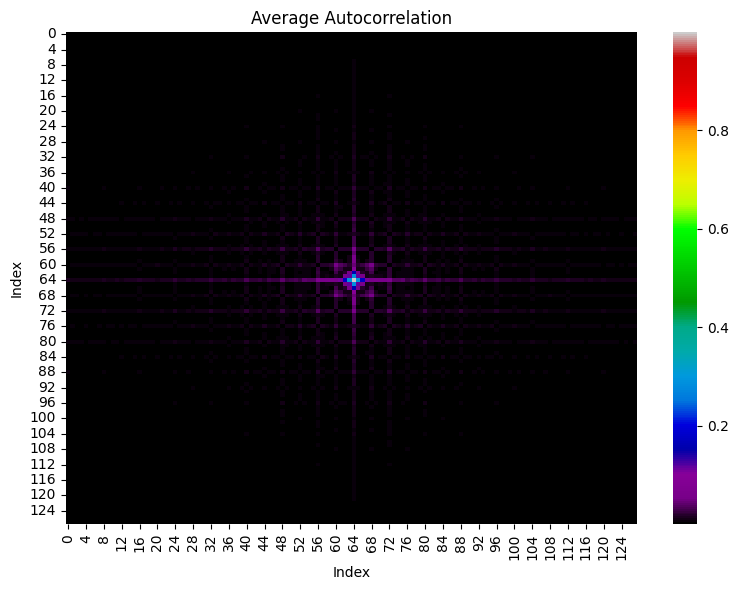

Mean: (-3.3881317890172014e-20+2.5860875718090325e-37j)
Max: (0.9988894746699707+0j)
Min: (-0.052204001101660805-1.306979200453935e-18j)
SD: 0.00543004863645018
Processing subfolder: DDPM
1000


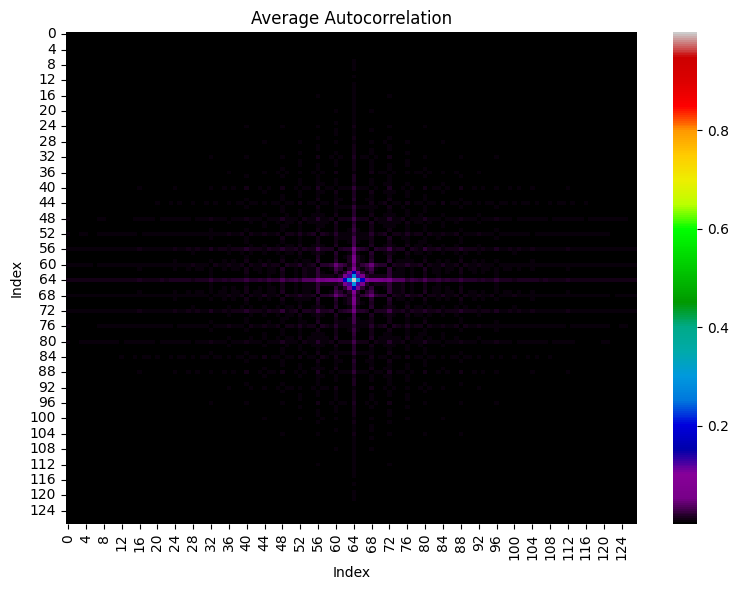

Mean: (-1.0164395367051604e-20+6.112570624275895e-37j)
Max: (0.9989369751159072+0j)
Min: (-0.04427098482193775-1.230831406791477e-18j)
SD: 0.00534704071453533
Processing subfolder: LDM
1000


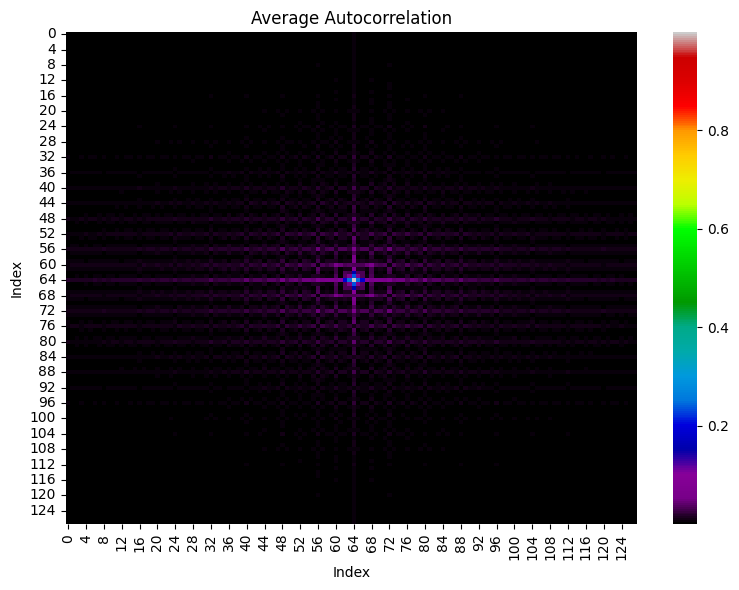

Mean: (4.0657581468206416e-20-6.8178672347692675e-37j)
Max: (0.9990605347332349+0j)
Min: (-0.0624980005952419-7.510681194409073e-20j)
SD: 0.005895472523009939
Processing subfolder: Real
1000


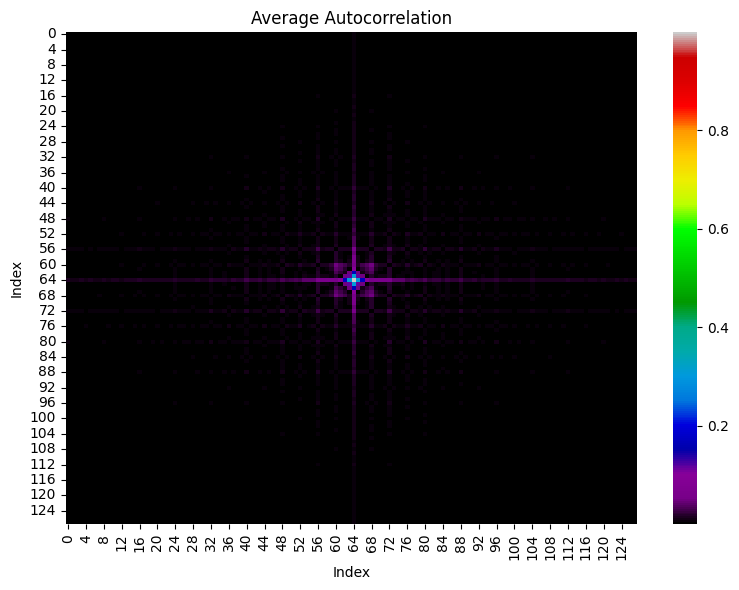

Mean: (3.7269449679189215e-20+1.6456920911512025e-36j)
Max: (0.9988507794807795+0j)
Min: (-0.049012906785261275-1.4776942352165282e-18j)
SD: 0.005397220304573409
Processing subfolder: PNDM
1000


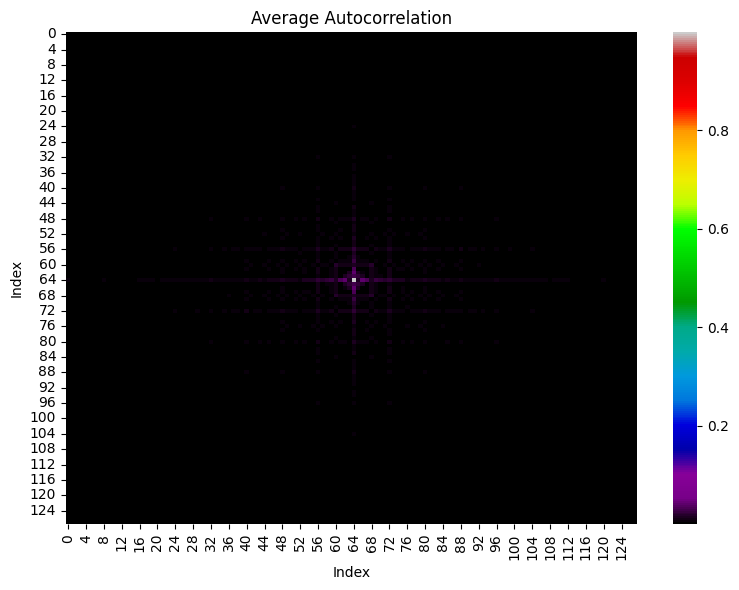

Mean: (-2.371692252312041e-20+4.70197740328915e-38j)
Max: (0.9992194199552917+0j)
Min: (-0.01791828518754449-4.0833508578330006e-19j)
SD: 0.004045615517688374
Processing subfolder: IDDPM
1000


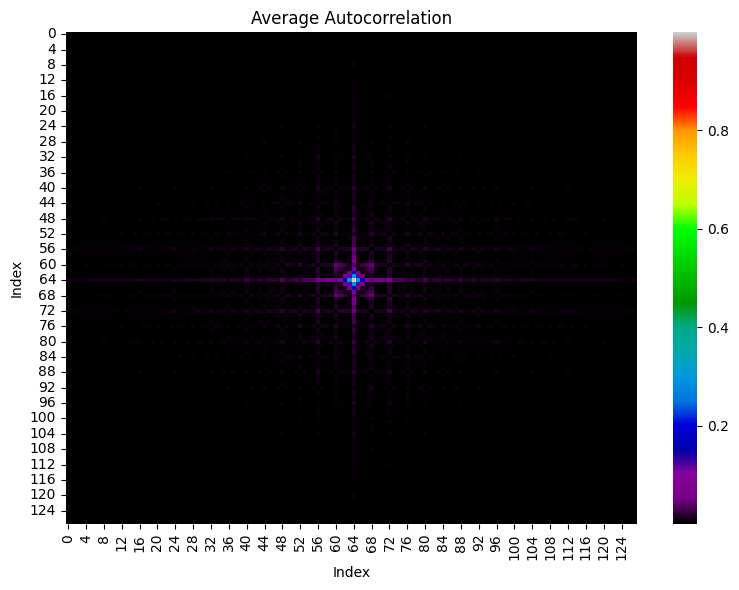

Mean: (-3.5575383784680614e-20+3.9966807927957775e-37j)
Max: (0.9990157119987496+0j)
Min: (-0.04540748051805134-7.948357621337517e-20j)
SD: 0.00525470201318083


In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    return image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        fft_image = (np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
          power_spectrum = np.abs(fft_image) ** 2
        else:
          power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr

def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(denoised_image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    calculate_power_spectrum_statistics(avg_autocorr)

## Data Augmentation : Rotate upto 10 Degrees

Processing subfolder: ADM
1000


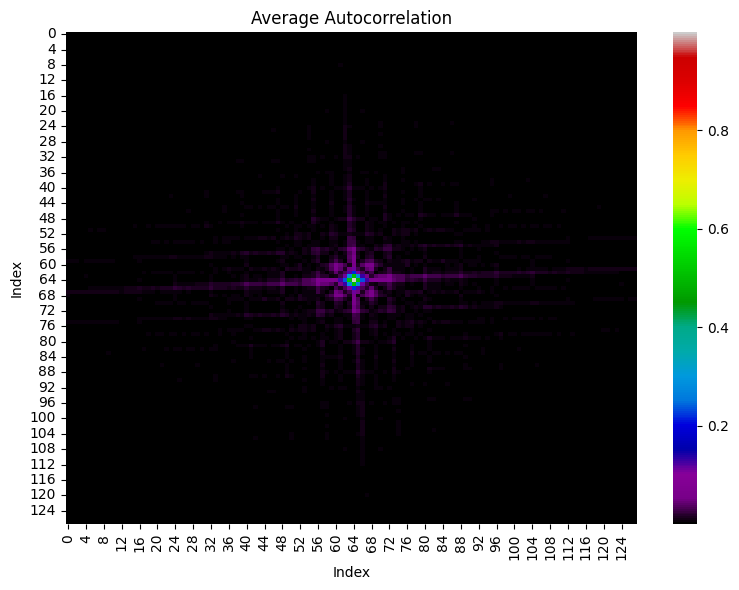

Mean: (4.743384504624082e-20-2.82118644197349e-37j)
Max: (0.9982717222219628+0j)
Min: (-0.060659707004731674-6.286297179497494e-21j)
SD: 0.00690944984475389
Processing subfolder: DDPM
1000


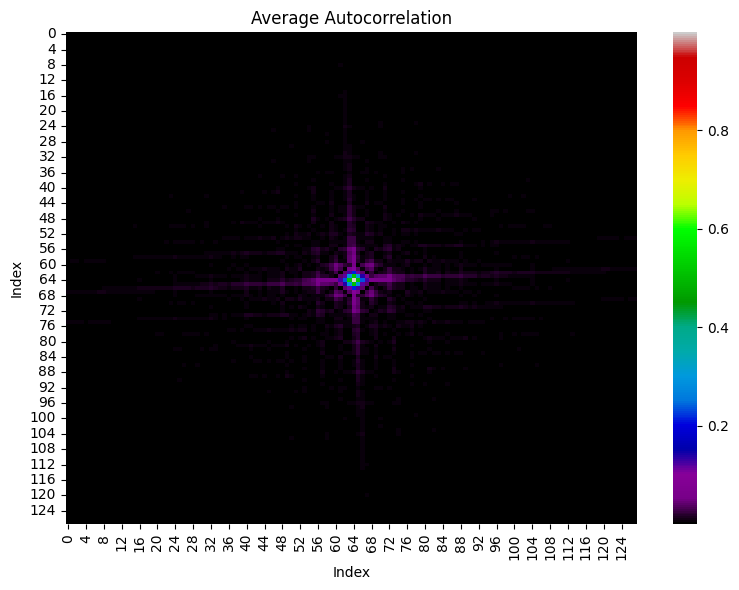

Mean: (-5.421010862427522e-20-2.350988701644575e-38j)
Max: (0.9983459698045095+0j)
Min: (-0.050668240798445126-1.1926525253021035e-19j)
SD: 0.006874597742057279
Processing subfolder: LDM
1000


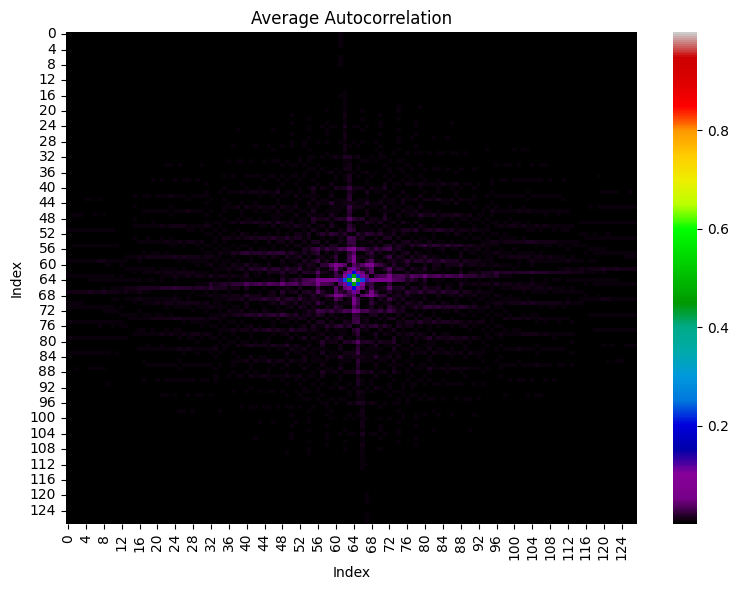

Mean: (6.776263578034403e-21+0j)
Max: (0.9984367170376491+0j)
Min: (-0.06900419973896524-1.7619035510597221e-19j)
SD: 0.006695227013558572
Processing subfolder: Real
1000


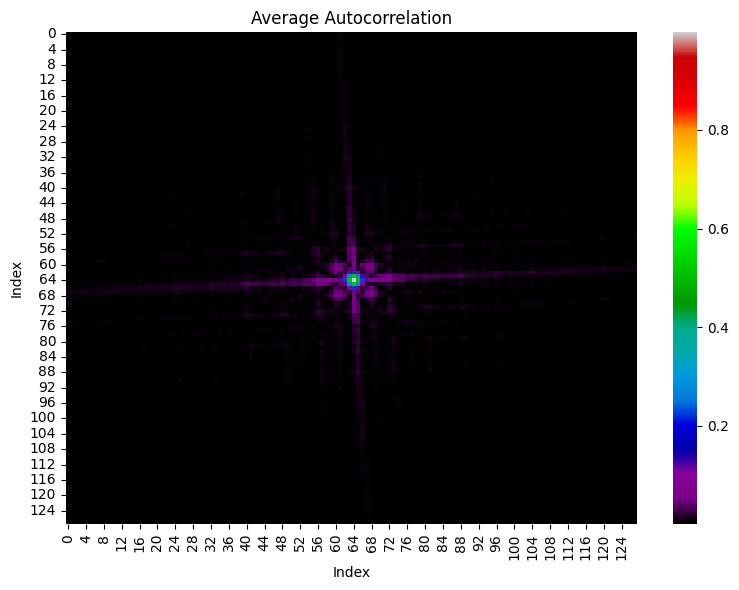

Mean: (-4.743384504624082e-20+7.52316384526264e-37j)
Max: (0.9981985889718534+0j)
Min: (-0.062071042606892654-2.095912989878617e-18j)
SD: 0.006894643459575238
Processing subfolder: PNDM
1000


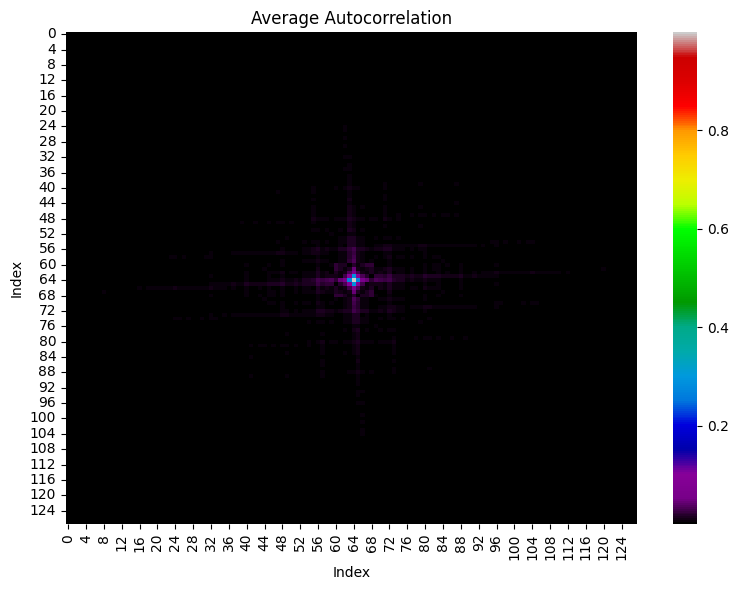

Mean: (-3.3881317890172014e-21+1.222514124855179e-36j)
Max: (0.9984240197305679+0j)
Min: (-0.021414623229232824+5.706782269020483e-19j)
SD: 0.0047369436732004255
Processing subfolder: IDDPM
1000


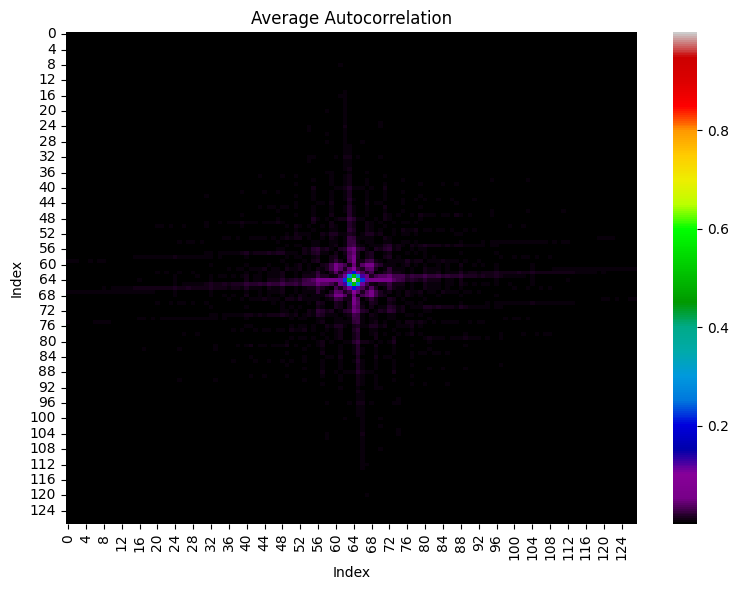

Mean: (-6.776263578034403e-21+1.504632769052528e-36j)
Max: (0.9984763218228186+0j)
Min: (-0.05332190869472403-1.0519214074088555e-19j)
SD: 0.006743999122920566


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals


def rotate_image(image, angle):
    rows, cols = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image


def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Rotate the image randomly by 10%
        random.seed(42)
        angle = random.uniform(-10, 10)
        rotated_image = rotate_image(image, angle)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(rotated_image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        random.seed(42)
        angle = random.uniform(-10, 10)
        rotated_image = rotate_image(image, angle)


        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(rotated_image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]  // Uncomment to check the autocorrelation of 1 image 
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    #  ### Uncomment to check the autocorrelation of 1 image
    #  # Show original and noisy images side by side
    # plt.figure(figsize=(12, 6))
    # for i, image_path in enumerate(images):
    #     image = load_image(image_path)
    #     noisy_image = rotate_image(image, 10)  # You can adjust the noise level as needed

    #     plt.subplot(2, len(images), i + 1)
    #     plt.imshow(image, cmap='gray')
    #     plt.title("Original")
    #     plt.axis('off')

    #     plt.subplot(2, len(images), len(images) + i + 1)
    #     plt.imshow(noisy_image, cmap='gray')
    #     plt.title("Noisy")
    #     plt.axis('off')

    # plt.tight_layout()
    # plt.show()

    calculate_power_spectrum_statistics(avg_autocorr)


## Data Augmentation : Rotate randomly - upto 180 degrees

Processing subfolder: ADM
1000


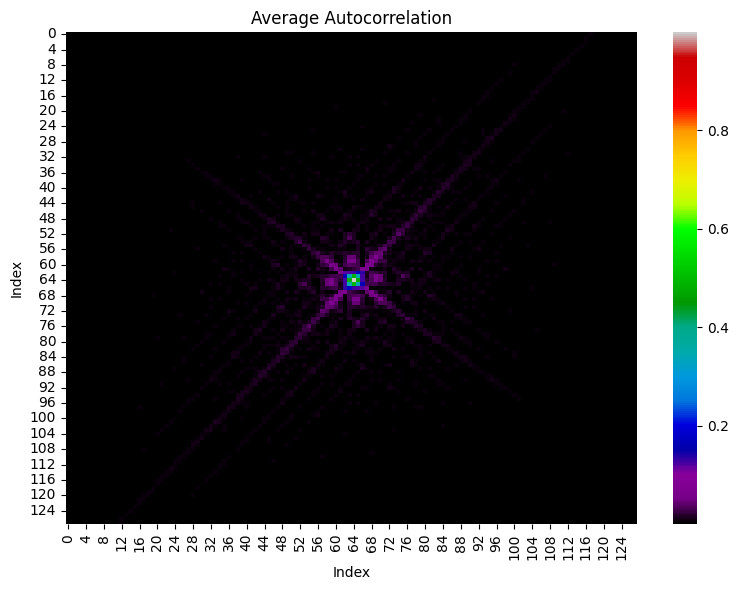

Mean: (-4.743384504624082e-20+7.052966104933725e-37j)
Max: (0.998512019306943+0j)
Min: (-0.05762994822646454-5.313135012263931e-18j)
SD: 0.006879808603701516
Processing subfolder: DDPM
1000


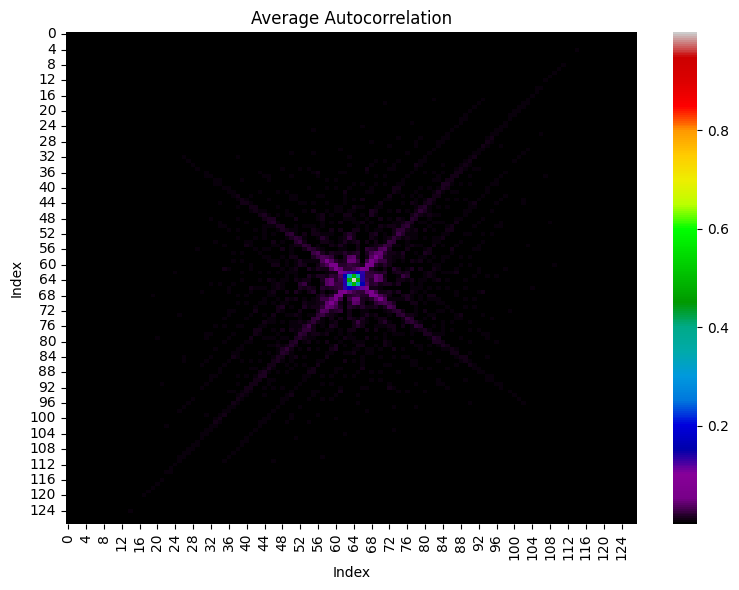

Mean: (-3.3881317890172014e-20+9.168855936413843e-37j)
Max: (0.9985051408458082+0j)
Min: (-0.046039126027509876+5.171659862001395e-18j)
SD: 0.006862117736027283
Processing subfolder: LDM
1000


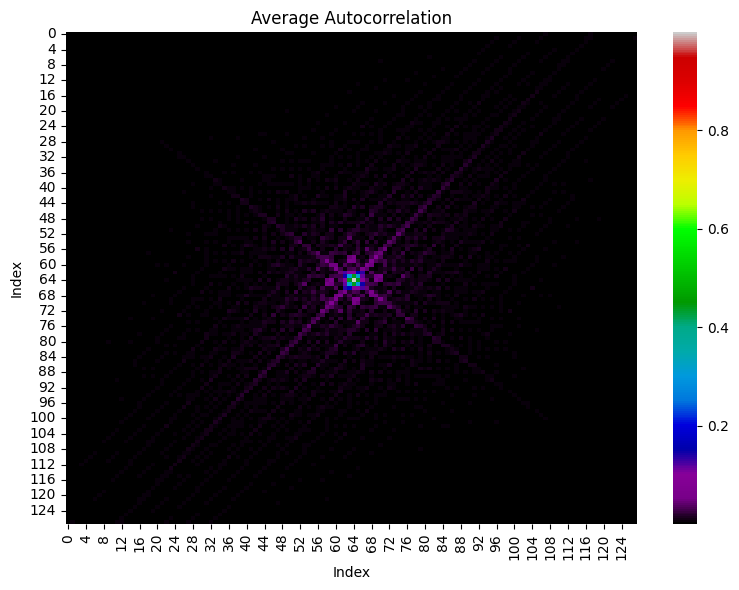

Mean: (-4.743384504624082e-20-1.786751413249877e-36j)
Max: (0.9986961987407745+0j)
Min: (-0.060923629397684184-2.5498273127000806e-18j)
SD: 0.006656136765140226
Processing subfolder: Real
1000


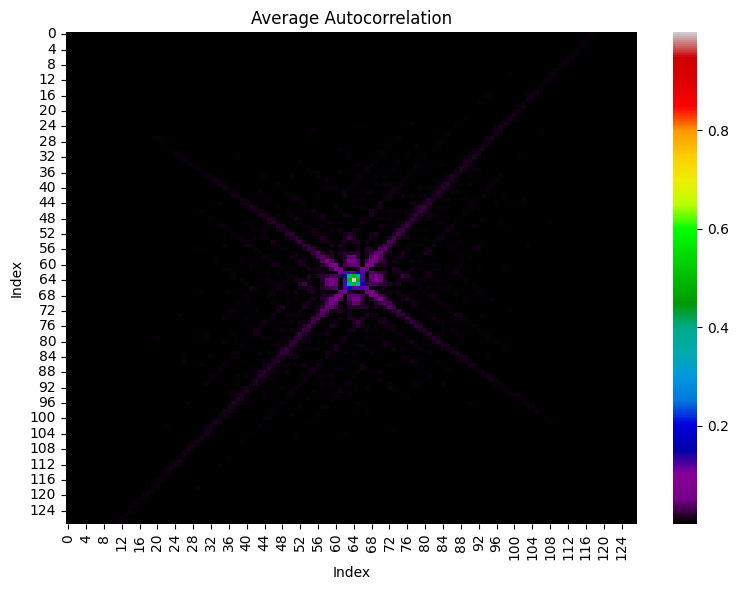

Mean: (-1.3552527156068805e-20+9.4039548065783e-38j)
Max: (0.9984641878448127+0j)
Min: (-0.059959322635894846-5.414681808877885e-18j)
SD: 0.006871087030492983
Processing subfolder: PNDM
1000


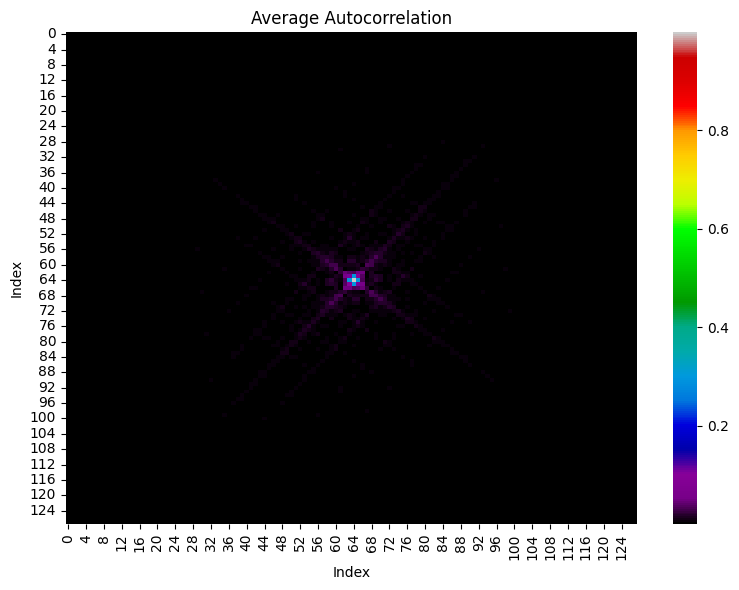

Mean: (-2.0328790734103208e-20-5.5542108076353085e-37j)
Max: (0.9986199969818823+0j)
Min: (-0.019739317439321974+2.8154191641328748e-18j)
SD: 0.004806454657201625
Processing subfolder: IDDPM
1000


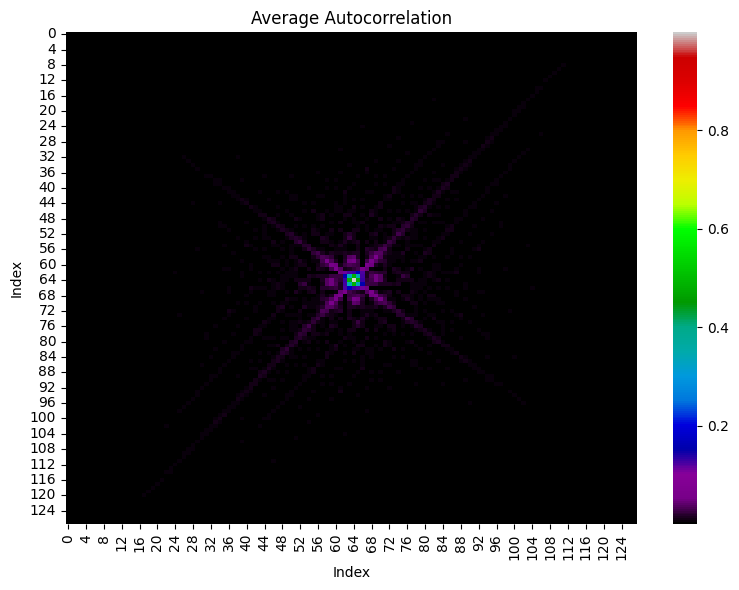

Mean: (-4.743384504624082e-20-1.316553672920962e-36j)
Max: (0.998656079455731+0j)
Min: (-0.05074862133209053-5.387722701712497e-18j)
SD: 0.006737061051098216


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals


def rotate_image(image, angle):
    rows, cols = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Rotate the image randomly by 10%
        random.seed(42)
        angle = random.uniform(-180, 180)
        rotated_image = rotate_image(image, angle)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(rotated_image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        random.seed(42)
        angle = random.uniform(-180, 180)
        rotated_image = rotate_image(image, angle)


        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(rotated_image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    #  # Show original and noisy images side by side
    # plt.figure(figsize=(12, 6))
    # for i, image_path in enumerate(images):
    #     image = load_image(image_path)
    #     noisy_image = rotate_image(image, 10)  # You can adjust the noise level as needed

    #     plt.subplot(2, len(images), i + 1)
    #     plt.imshow(image, cmap='gray')
    #     plt.title("Original")
    #     plt.axis('off')

    #     plt.subplot(2, len(images), len(images) + i + 1)
    #     plt.imshow(noisy_image, cmap='gray')
    #     plt.title("Noisy")
    #     plt.axis('off')

    # plt.tight_layout()
    # plt.show()

    calculate_power_spectrum_statistics(avg_autocorr)


## Data Augmentation : Rotate 360 Degrees

Processing subfolder: ADM
1000


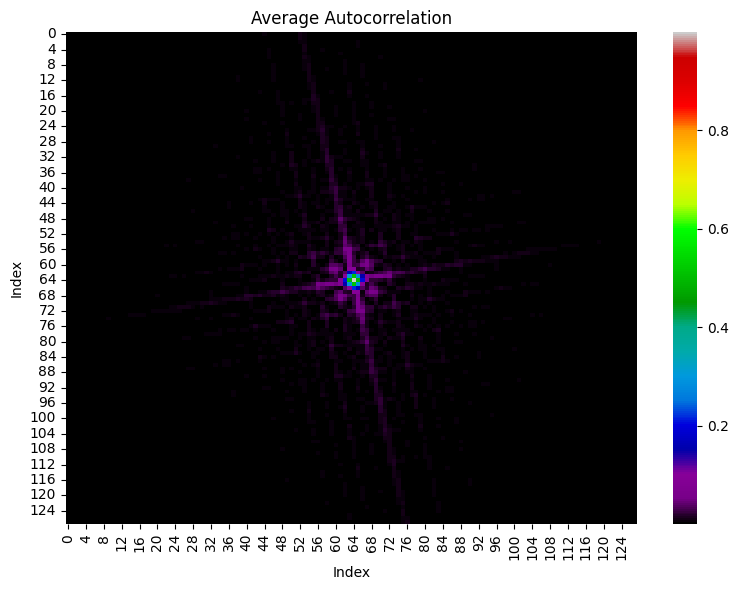

Mean: (-3.3881317890172014e-20-1.128474576789396e-36j)
Max: (0.9983492386160994+0j)
Min: (-0.061688071154396576-3.9216341102962375e-19j)
SD: 0.006930759306440518
Processing subfolder: DDPM
1000


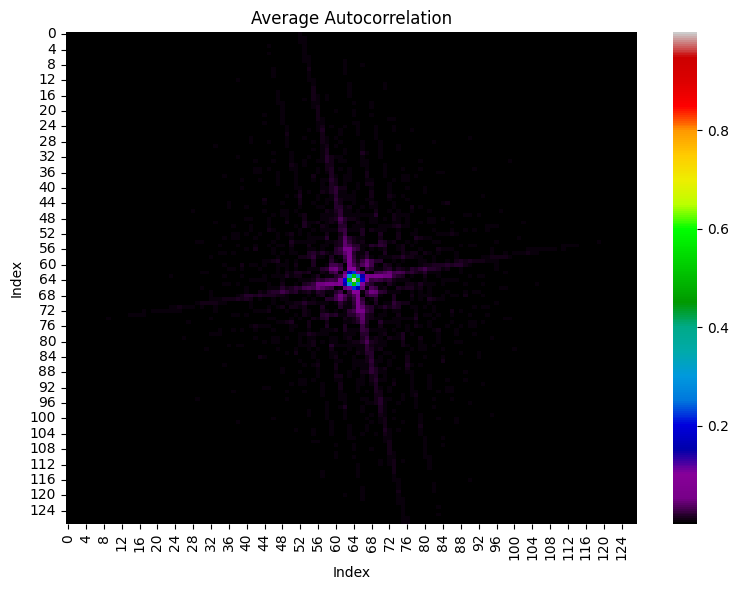

Mean: (1.3552527156068805e-20-1.3283086164291849e-36j)
Max: (0.9983986782400344+0j)
Min: (-0.04914192728336149-2.0149010413965313e-18j)
SD: 0.006904085054452817
Processing subfolder: LDM
1000


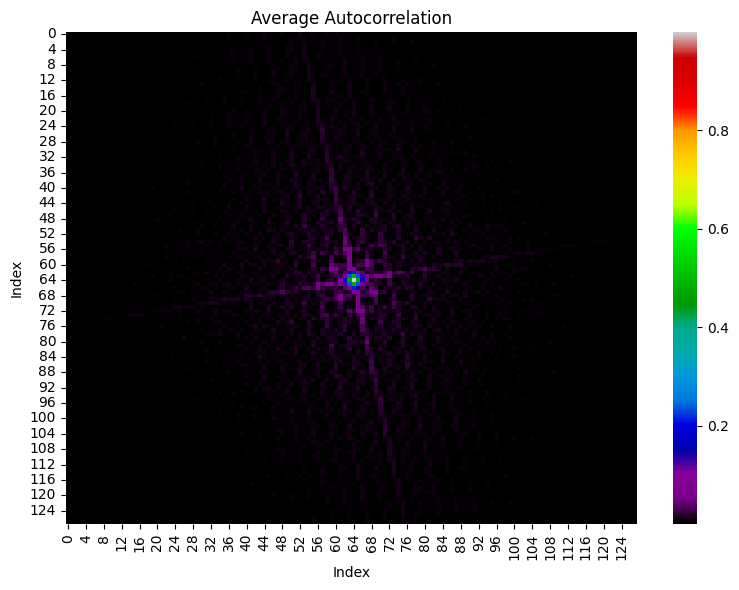

Mean: (-1.3552527156068805e-20+9.4039548065783e-37j)
Max: (0.9985234652172182+0j)
Min: (-0.06216370828909282-6.241401780564807e-20j)
SD: 0.0067213299417458175
Processing subfolder: Real
1000


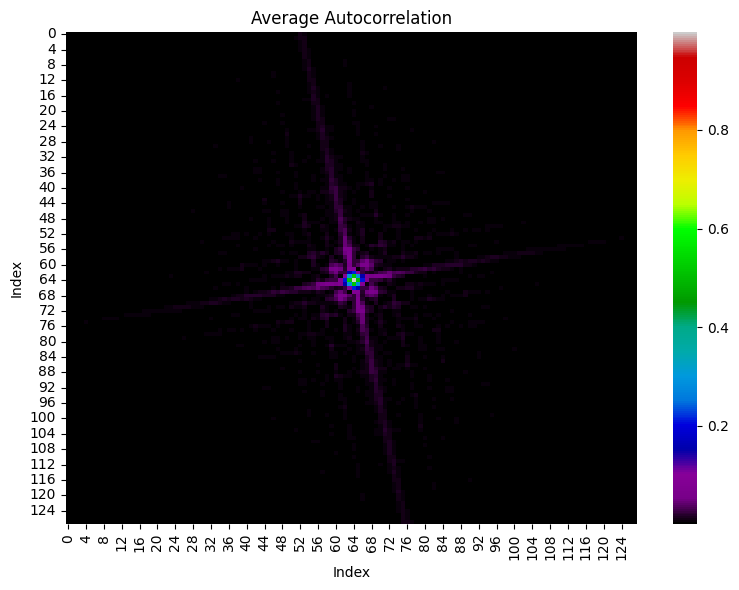

Mean: (-2.710505431213761e-20+2.1158898314801175e-36j)
Max: (0.9982586651674231+0j)
Min: (-0.06389709022245943-5.115831687618324e-19j)
SD: 0.006919840250064858
Processing subfolder: PNDM
1000


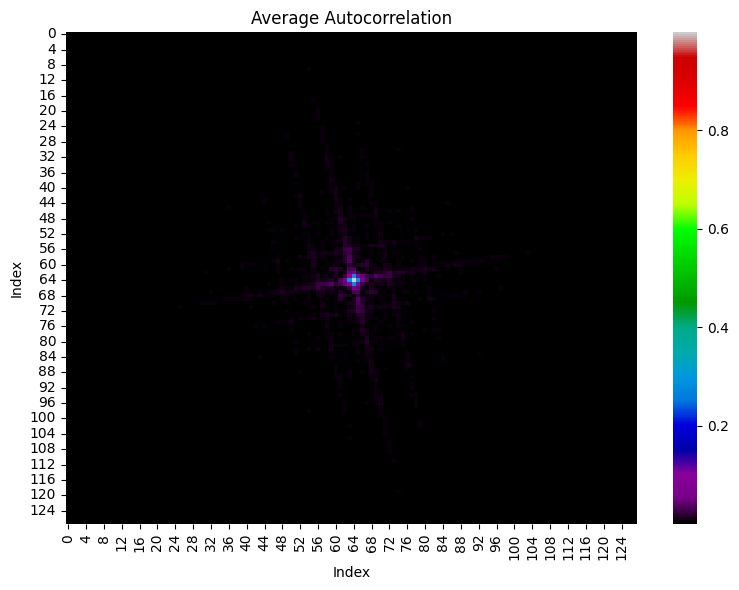

Mean: (6.776263578034403e-21-9.4039548065783e-37j)
Max: (0.9984654266318016+0j)
Min: (-0.022372267101638404-3.0786103744303956e-19j)
SD: 0.004774482125768231
Processing subfolder: IDDPM
1000


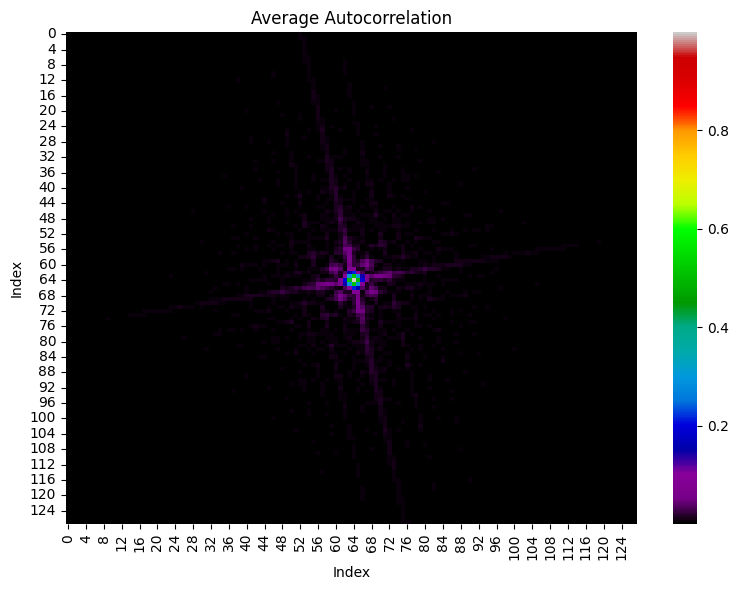

Mean: (-3.3881317890172014e-20+7.052966104933725e-37j)
Max: (0.9985133406809658+0j)
Min: (-0.05490507827513317-5.415126684919361e-19j)
SD: 0.006767789916358454


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals


def rotate_image(image, angle):
    rows, cols = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Rotate the image randomly by 10%
        random.seed(42)
        angle = random.uniform(-360, 360)
        rotated_image = rotate_image(image, angle)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(rotated_image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        random.seed(42)
        angle = random.uniform(-360, 360)
        rotated_image = rotate_image(image, angle)


        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(rotated_image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    calculate_power_spectrum_statistics(avg_autocorr)


## Data Augmentation : Rescale 2x

Processing subfolder: ADM
1000


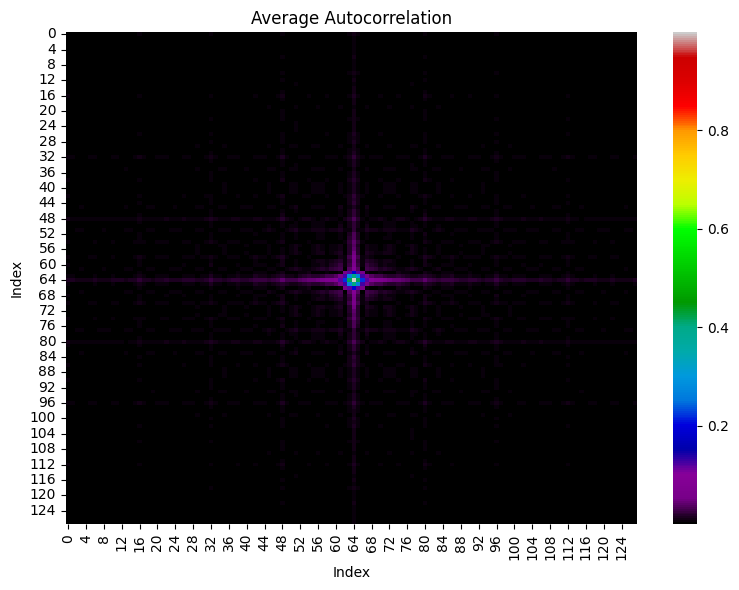

Mean: (-1.1858461261560205e-20+8.816207631167156e-39j)
Max: (0.9984857037958725+0j)
Min: (-0.02913117072588735+1.1654616589685976e-18j)
SD: 0.0032491625715448673
Processing subfolder: DDPM
1000


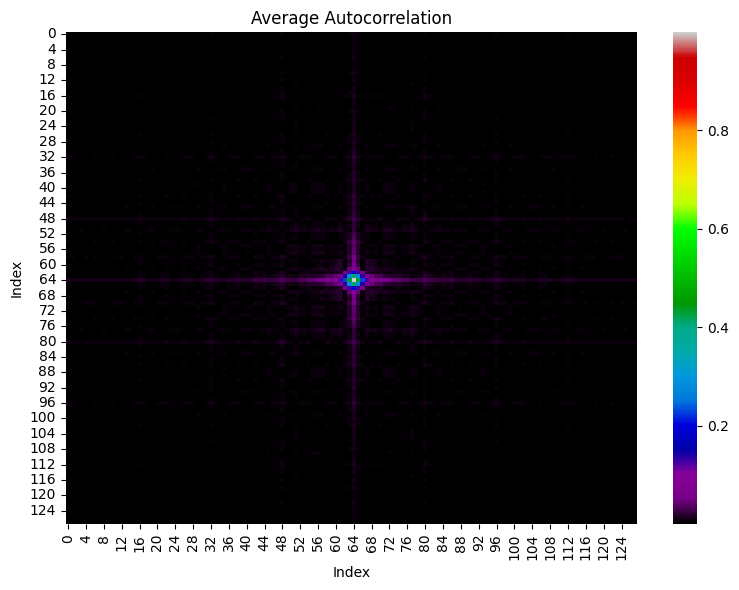

Mean: (-1.3976043629695956e-20-3.5264830524668625e-38j)
Max: (0.9985610987511603+0j)
Min: (-0.01946722941834037+3.1244614975859835e-20j)
SD: 0.003276206521413604
Processing subfolder: LDM
1000


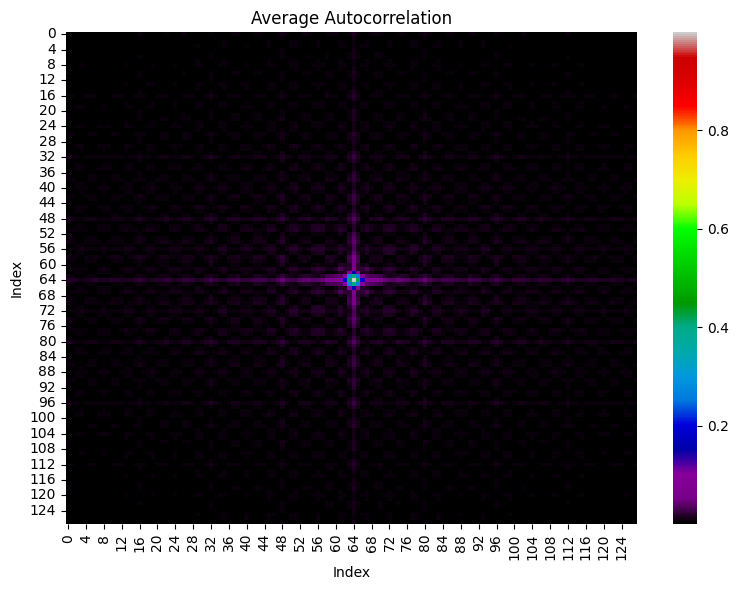

Mean: (4.658681209898652e-21-9.4039548065783e-38j)
Max: (0.9987714030678143+0j)
Min: (-0.033504511992648325-9.266907579259613e-20j)
SD: 0.0034278772428460555
Processing subfolder: Real
1000


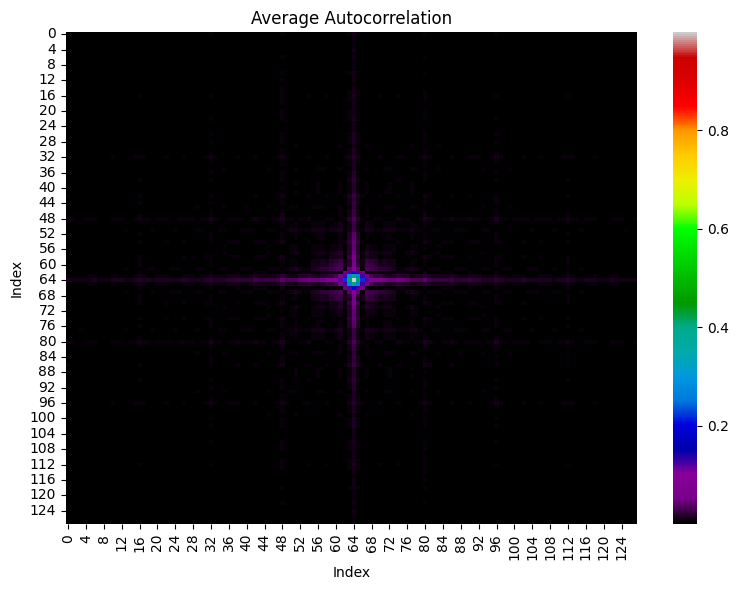

Mean: (-2.964615315390051e-21-1.2342690683634019e-37j)
Max: (0.998475922001882+0j)
Min: (-0.031519973555829466+1.2963698704020882e-18j)
SD: 0.0032312851828254605
Processing subfolder: PNDM
1000


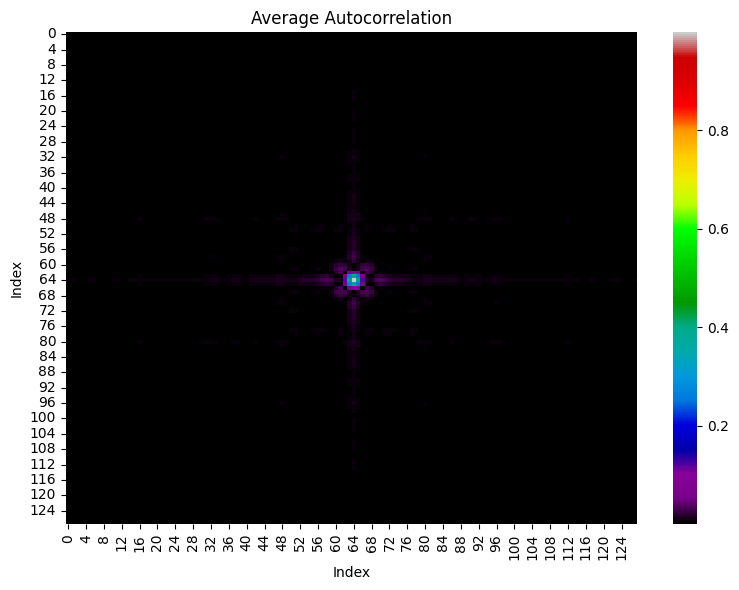

Mean: (-1.291725244562808e-20-4.70197740328915e-38j)
Max: (0.9990140082679295+0j)
Min: (-0.03422712686457008-2.220914078486703e-19j)
SD: 0.0028196913686890884
Processing subfolder: IDDPM
1000


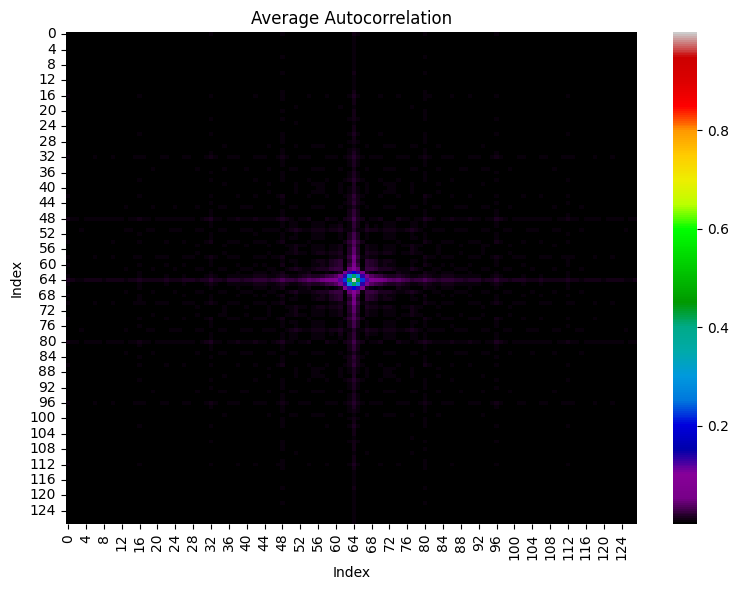

Mean: (-1.0164395367051604e-20+2.057115113939003e-37j)
Max: (0.9986815863339215+0j)
Min: (-0.023916474365068798-2.7649205408533343e-20j)
SD: 0.0032499717276024123


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path, resize_scale = 2):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    resized_image = cv2.resize(image, None, fx=resize_scale, fy=resize_scale, interpolation=cv2.INTER_LINEAR)
    return resized_image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)


    calculate_power_spectrum_statistics(avg_autocorr)



## Data Augmentation : Rescale 1.5 Times

Processing subfolder: ADM
1000


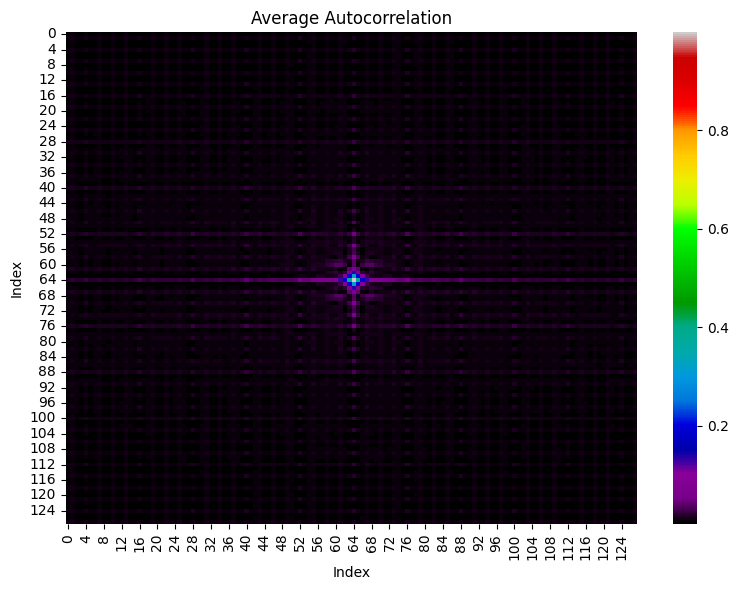

Mean: (4.141049964354357e-20+2.716698055233731e-37j)
Max: (0.9986092131047897+0j)
Min: (-0.03696394154134621+1.6037030494175833e-19j)
SD: 0.00603272620222384
Processing subfolder: DDPM
1000


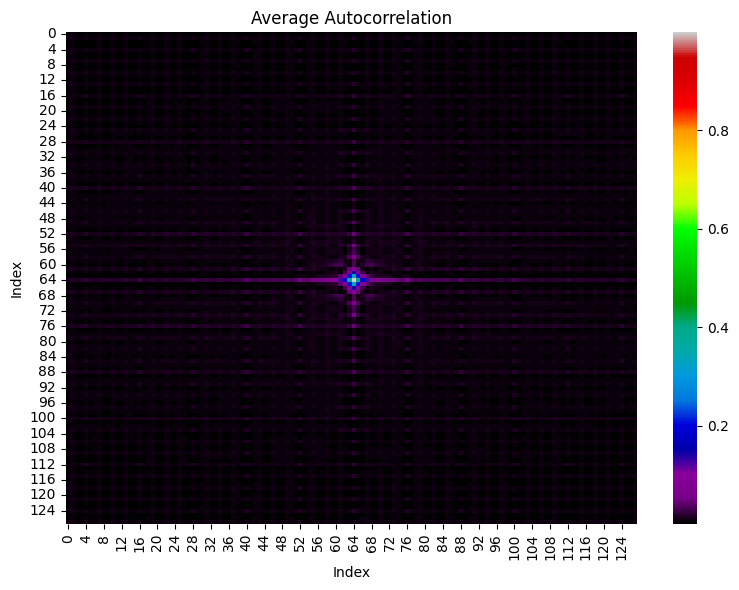

Mean: (-4.0657581468206416e-20+2.0897677347951777e-38j)
Max: (0.9986123993296462+0j)
Min: (-0.030666288090915386-3.536934865259965e-19j)
SD: 0.006196344572271572
Processing subfolder: LDM
1000


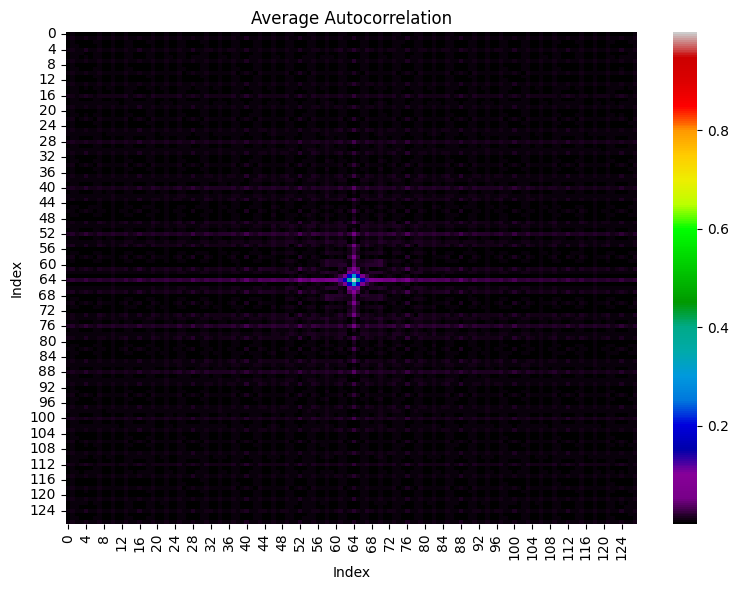

Mean: (-4.3669254169555035e-20-4.1795354695903554e-38j)
Max: (0.9987248688766509+0j)
Min: (-0.020080774204896897-1.1323325143418983e-19j)
SD: 0.006076201836960971
Processing subfolder: Real
1000


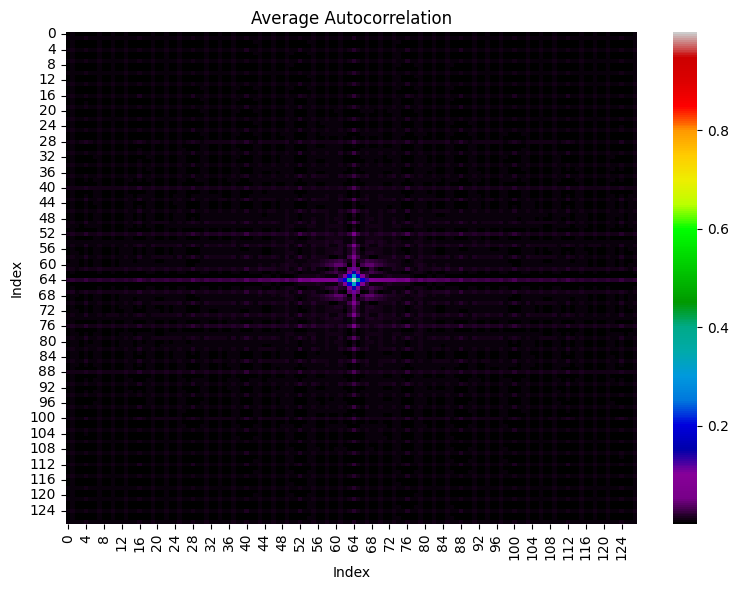

Mean: (1.807003620809174e-20+3.970558696110838e-37j)
Max: (0.9985818936956391+0j)
Min: (-0.04185058502710086-1.1051228260526245e-18j)
SD: 0.005753477580734086
Processing subfolder: PNDM
1000


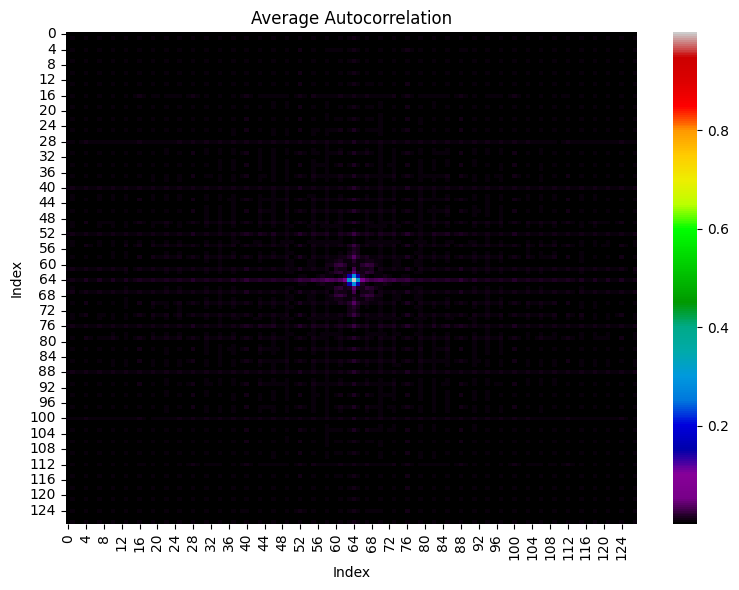

Mean: (8.282099928708714e-21-6.8962335248240864e-37j)
Max: (0.9989627228620293+0j)
Min: (-0.02506403429601948-1.2676534333817155e-19j)
SD: 0.004308027828703498
Processing subfolder: IDDPM
1000


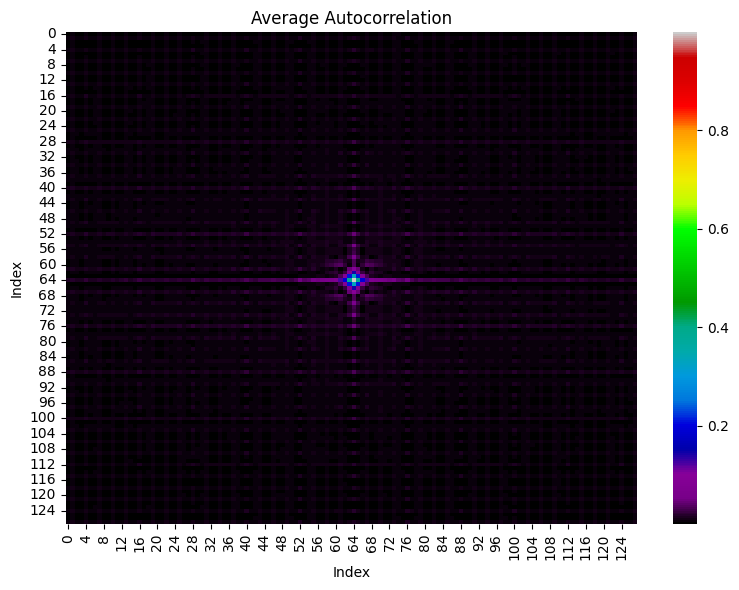

Mean: (-1.581128168208027e-20+6.269303204385533e-38j)
Max: (0.9987507188715844+0j)
Min: (-0.03608142531129767-1.0202373338150255e-18j)
SD: 0.006211783613296066


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path, resize_scale = 1.5):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    resized_image = cv2.resize(image, None, fx=resize_scale, fy=resize_scale, interpolation=cv2.INTER_LINEAR)
    return resized_image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    calculate_power_spectrum_statistics(avg_autocorr)



## Data Augmentation : 0.5 RESCALE

Processing subfolder: ADM
1000


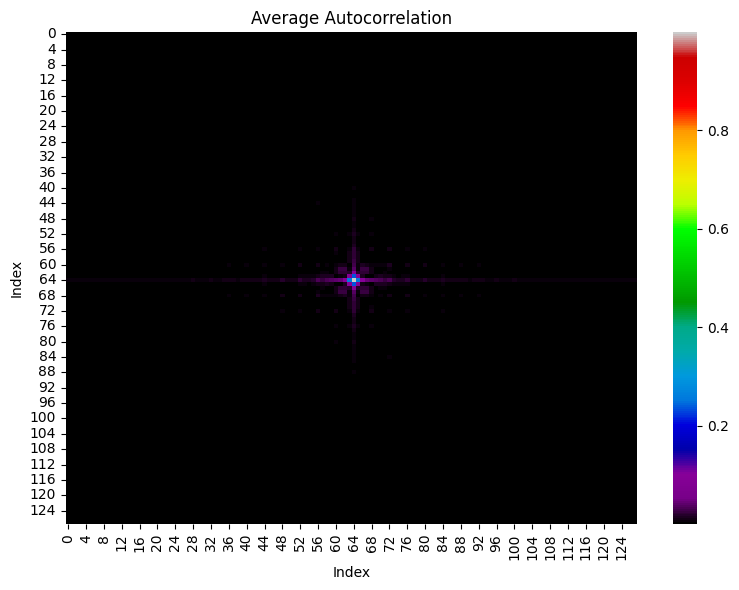

Mean: (-6.776263578034403e-20+1.88079096131566e-36j)
Max: (0.9985921545481412+0j)
Min: (-0.025878295304668404-2.265842027263793e-19j)
SD: 0.009166506835649799
Processing subfolder: DDPM
1000


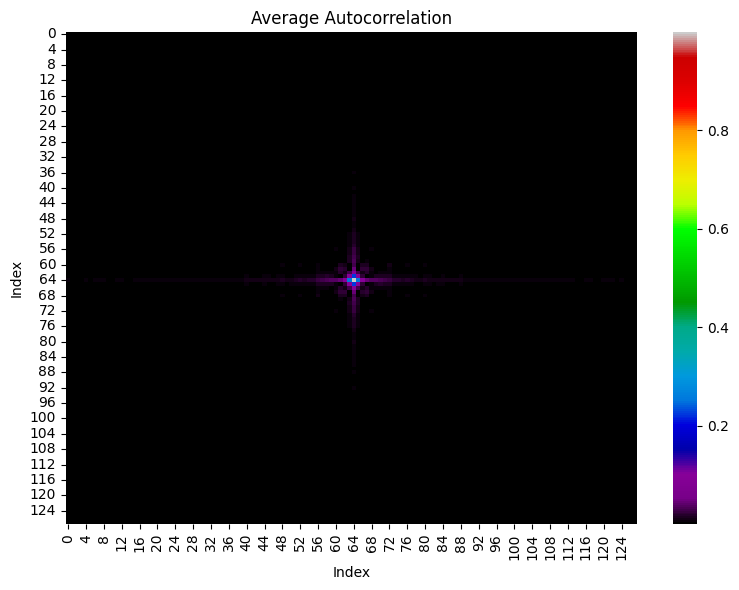

Mean: (-1.3552527156068805e-20+0j)
Max: (0.9987148692409786+0j)
Min: (-0.022518114333946567+2.661593588197837e-20j)
SD: 0.00913938873672573
Processing subfolder: LDM
1000


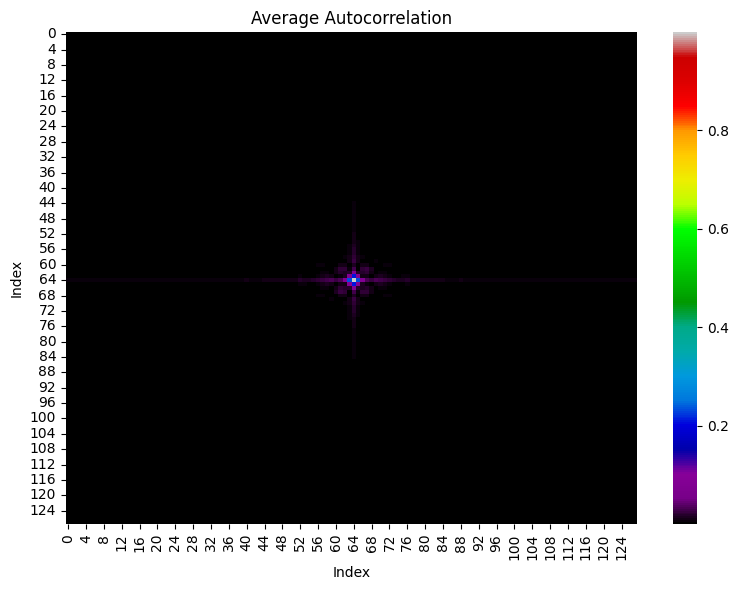

Mean: (-6.776263578034403e-20+1.504632769052528e-36j)
Max: (0.9988201955111222+0j)
Min: (-0.023703525088352183-1.7048595907357003e-19j)
SD: 0.00888464428345236
Processing subfolder: Real
1000


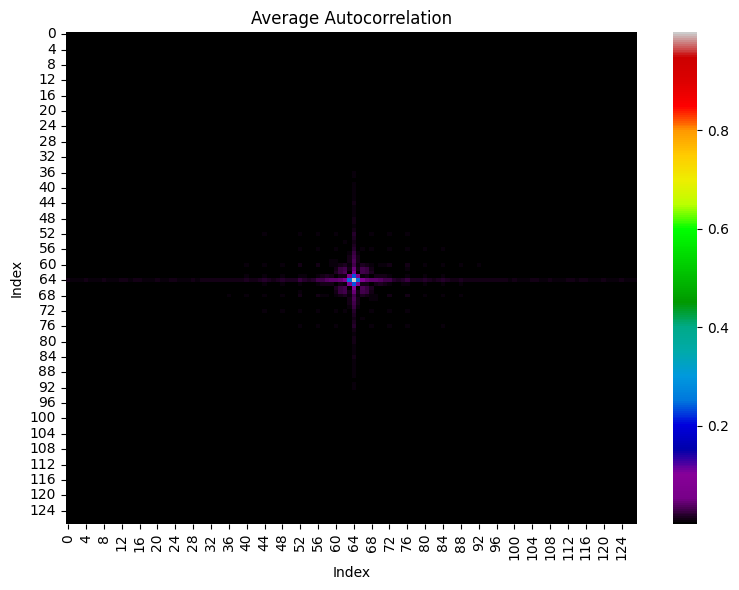

Mean: (-6.776263578034403e-20-7.52316384526264e-37j)
Max: (0.998609140131515+0j)
Min: (-0.03139039822498643-7.508284344554455e-19j)
SD: 0.009095190656543947
Processing subfolder: PNDM
1000


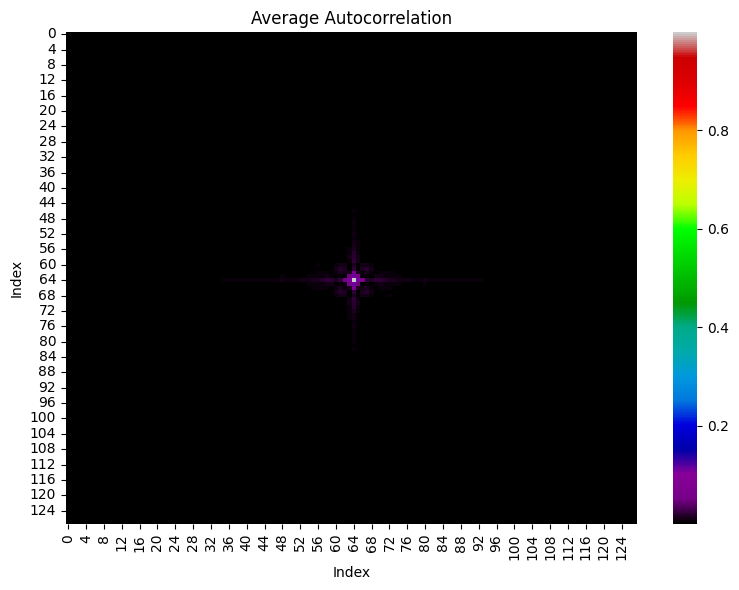

Mean: (6.098637220230962e-20-1.504632769052528e-36j)
Max: (0.9989509647853485+0j)
Min: (-0.01714284130525266-3.263649472767253e-21j)
SD: 0.00816555957943502
Processing subfolder: IDDPM
1000


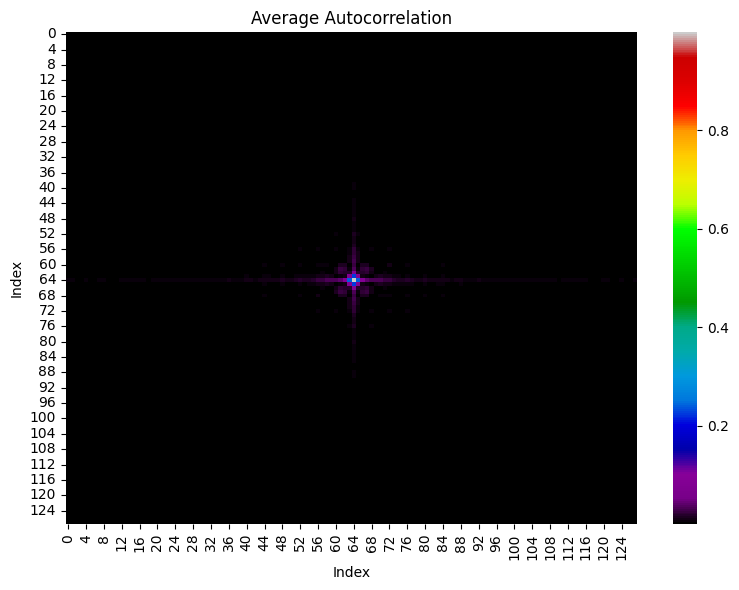

Mean: (4.0657581468206416e-20+3.009265538105056e-36j)
Max: (0.9987966439739457+0j)
Min: (-0.02417902765670808+9.419085031559155e-20j)
SD: 0.008978170826101747


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path, resize_scale = 0.5):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    resized_image = cv2.resize(image, None, fx=resize_scale, fy=resize_scale, interpolation=cv2.INTER_LINEAR)
    return resized_image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    calculate_power_spectrum_statistics(avg_autocorr)



## Data Augmentation :  Resizing (2x) + Denoise

Processing subfolder: ADM
1000


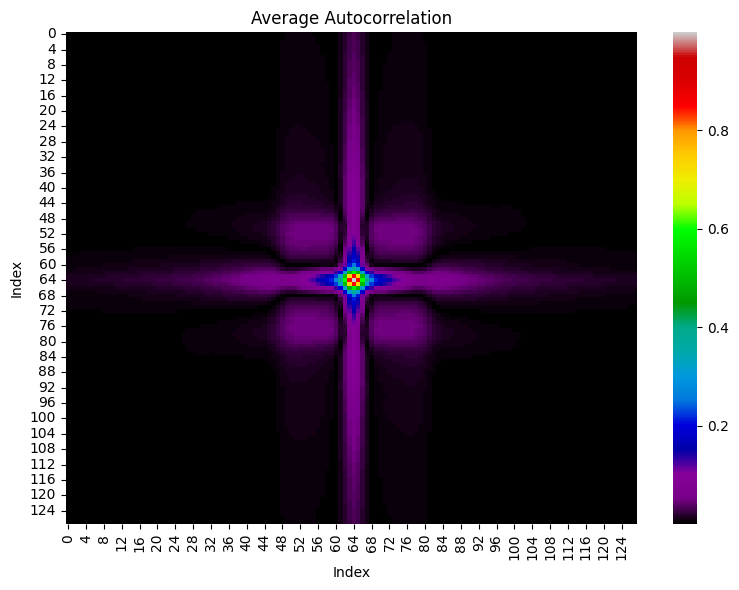

Mean: (-2.371692252312041e-20-5.524823448864751e-37j)
Max: (0.9988482876021396+0j)
Min: (-0.05069879135843929-3.531123379343337e-19j)
SD: 0.008249631463036915
Processing subfolder: DDPM
1000


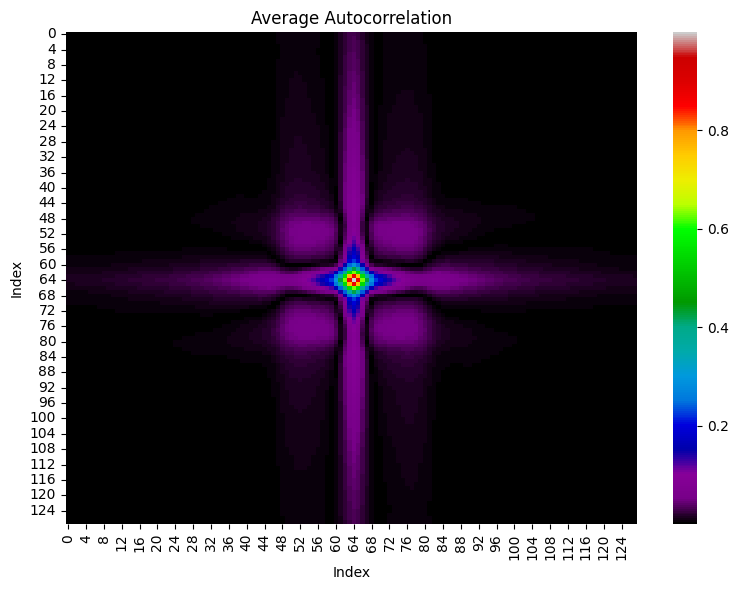

Mean: (3.7269449679189215e-20-9.874152546907215e-37j)
Max: (0.9986398988504845+0j)
Min: (-0.057165215724214846-1.269901988374544e-19j)
SD: 0.008871924480429224
Processing subfolder: LDM
1000


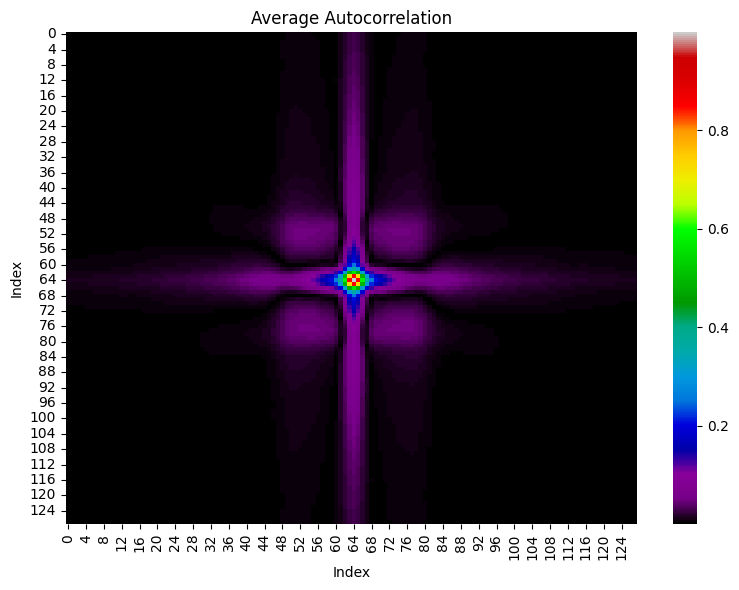

Mean: (5.759824041329242e-20-8.698658196084928e-37j)
Max: (0.9988134639365286+0j)
Min: (-0.04853127665760338-4.0005447107727985e-19j)
SD: 0.00805661004985053
Processing subfolder: Real
1000


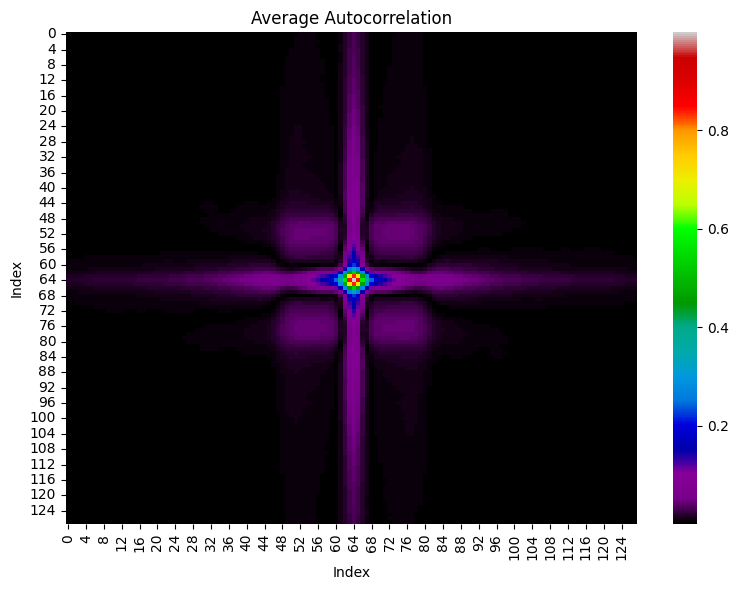

Mean: 5.64237288394698e-37j
Max: (0.9986953805721952+0j)
Min: (-0.044373095144768476-9.415185481408704e-20j)
SD: 0.007680040578001543
Processing subfolder: PNDM
1000


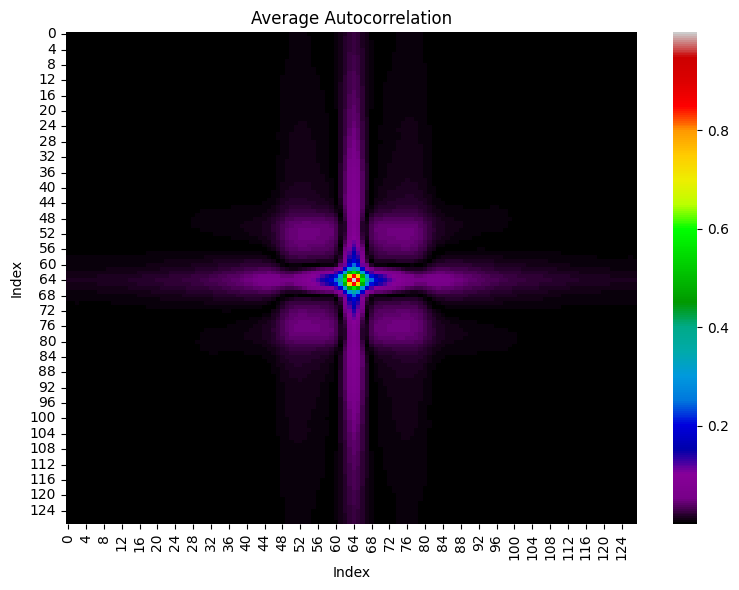

Mean: (-4.319868030996932e-20+4.231779662960235e-37j)
Max: (0.9989419933065059+0j)
Min: (-0.04881053182765344-3.1083760089962547e-20j)
SD: 0.007856657442174474
Processing subfolder: IDDPM
1000


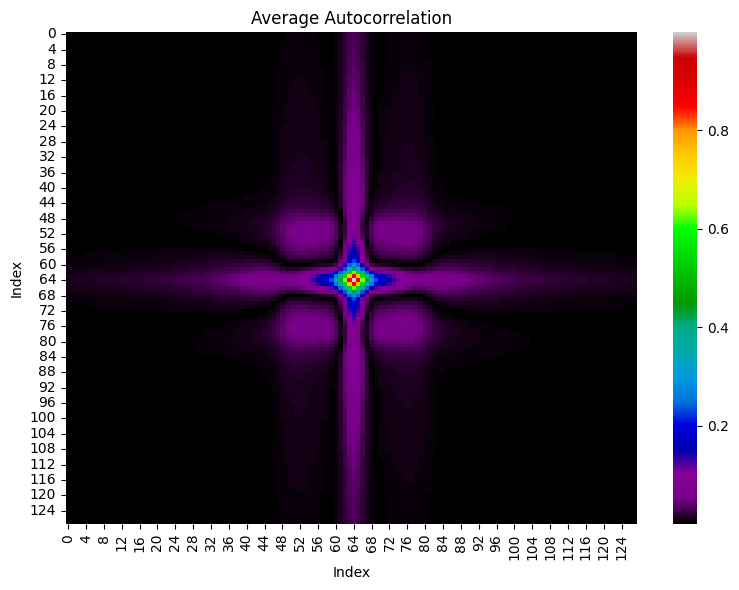

Mean: (-3.3881317890172014e-21-8.228460455756013e-38j)
Max: (0.9986730266272716+0j)
Min: (-0.05673598355782816-1.308294709822757e-19j)
SD: 0.008887289964066744


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path, resize_scale = 2):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    resized_image = cv2.resize(image, None, fx=resize_scale, fy=resize_scale, interpolation=cv2.INTER_LINEAR)
    return resized_image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    calculate_power_spectrum_statistics(avg_autocorr)



## Data Augmentation : 10% compresion

Processing subfolder: ADM
1000


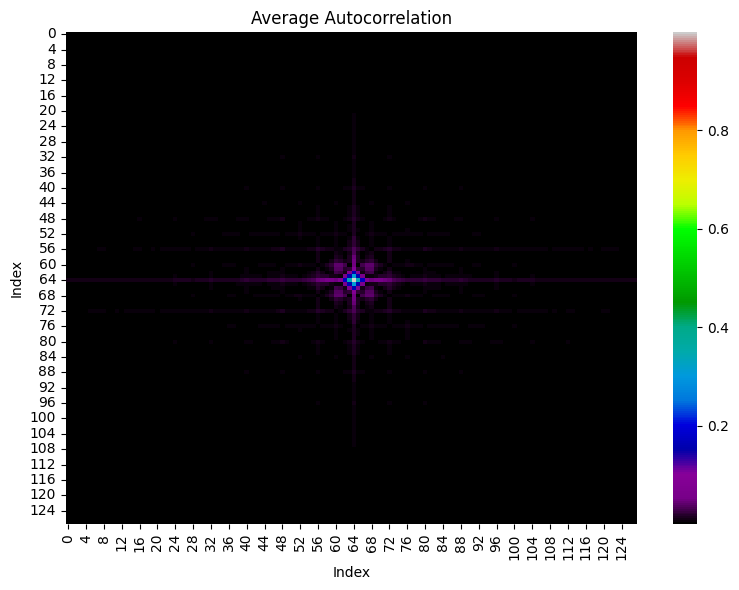

Mean: (-1.3552527156068805e-20-1.1754943508222875e-37j)
Max: (0.9989634807739787+0j)
Min: (-0.041976276290311546+1.1228970010415625e-18j)
SD: 0.005363708689883001
Processing subfolder: DDPM
1000


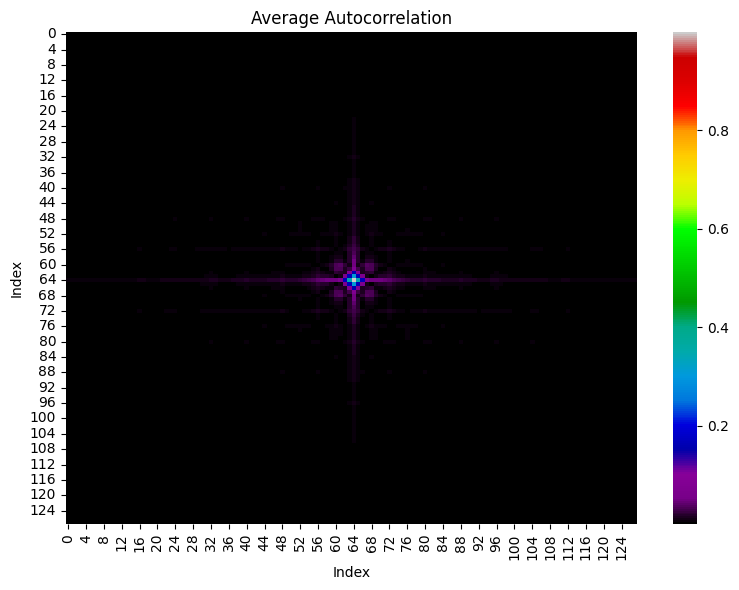

Mean: (1.6940658945086007e-20+6.8178672347692675e-37j)
Max: (0.9989255984832983+0j)
Min: (-0.03625547093754226-1.1070669561206096e-18j)
SD: 0.005338609281664208
Processing subfolder: LDM
1000


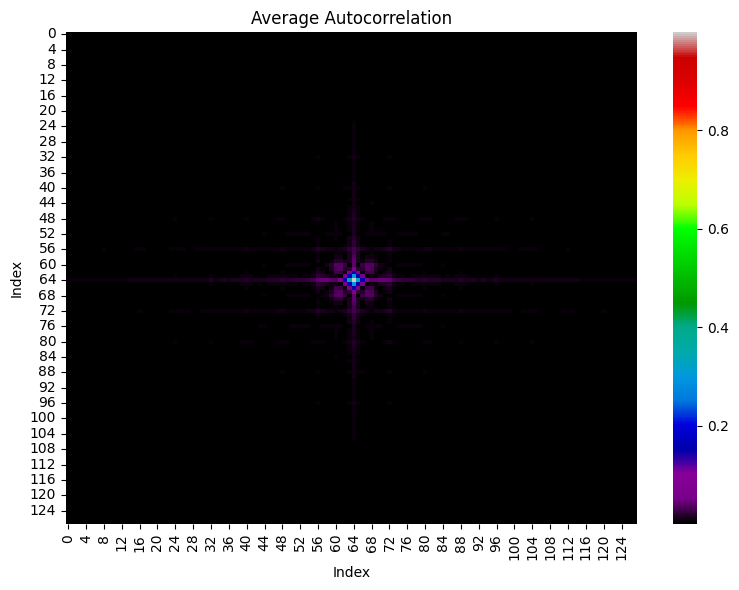

Mean: (-4.0657581468206416e-20+8.46355932592047e-37j)
Max: (0.9989383197568571+0j)
Min: (-0.03888885253345212-6.512209052755154e-19j)
SD: 0.005247959760697285
Processing subfolder: Real
1000


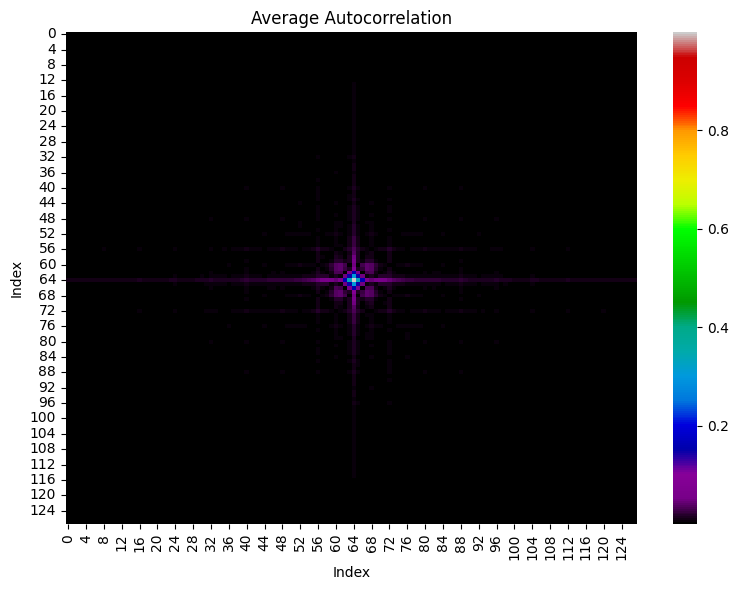

Mean: (5.082197683525802e-20-7.52316384526264e-37j)
Max: (0.9988544110578662+0j)
Min: (-0.04139538577633385-1.0748430989205574e-18j)
SD: 0.0052875204850168665
Processing subfolder: PNDM
1000


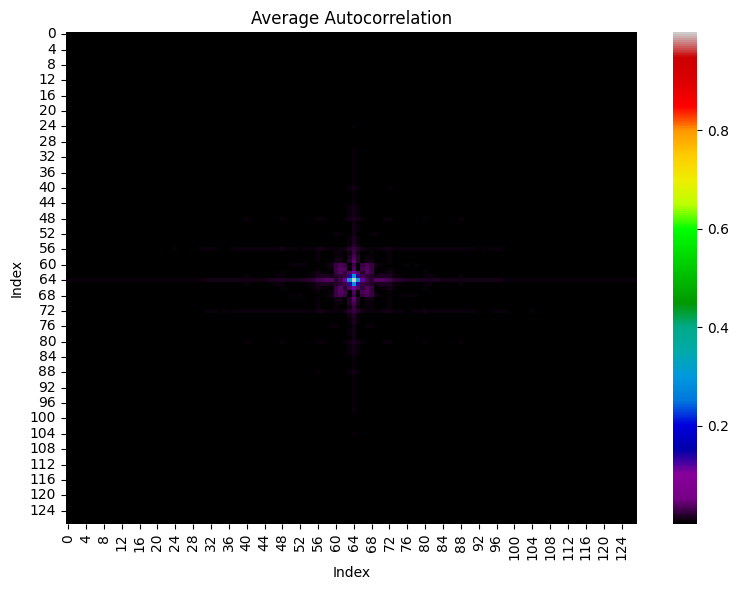

Mean: (2.0328790734103208e-20+1.1754943508222875e-37j)
Max: (0.9991078200940123+0j)
Min: (-0.03874618885711194-1.5649843723147875e-19j)
SD: 0.004945906038373207
Processing subfolder: IDDPM
1000


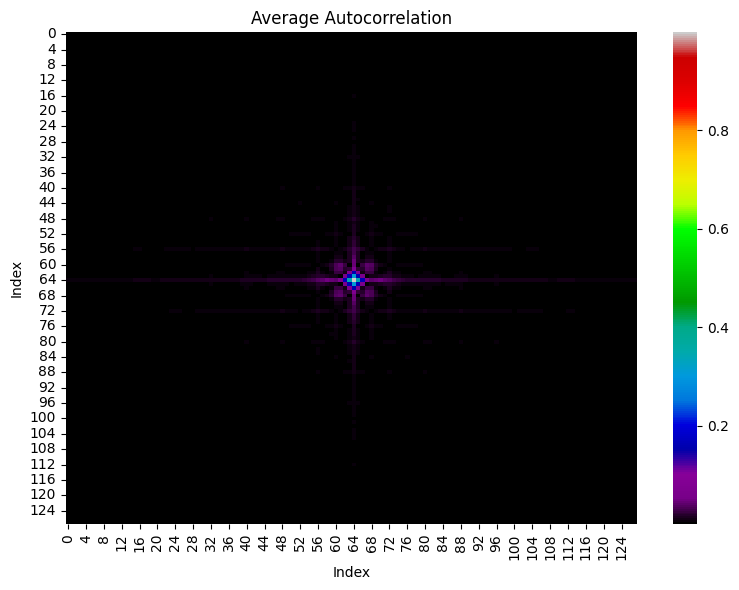

Mean: (1.5246593050577406e-20+0j)
Max: (0.9990175892239416+0j)
Min: (-0.03927970763443522-8.510465189908467e-19j)
SD: 0.005278860557636214


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path, quality = 90):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert image to JPEG format with specified quality
    _, encoded_image = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    compressed_image = cv2.imdecode(encoded_image, cv2.IMREAD_GRAYSCALE)
    return compressed_image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    #  # Show original and noisy images side by side
    # plt.figure(figsize=(12, 6))
    # for i, image_path in enumerate(images):
    #     image = load_image(image_path)
    #     noisy_image = rotate_image(image, 10)  # You can adjust the noise level as needed

    #     plt.subplot(2, len(images), i + 1)
    #     plt.imshow(image, cmap='gray')
    #     plt.title("Original")
    #     plt.axis('off')

    #     plt.subplot(2, len(images), len(images) + i + 1)
    #     plt.imshow(noisy_image, cmap='gray')
    #     plt.title("Noisy")
    #     plt.axis('off')

    # plt.tight_layout()
    # plt.show()

    calculate_power_spectrum_statistics(avg_autocorr)



## Data Augmentation : Compression 99%

Processing subfolder: ADM
1000


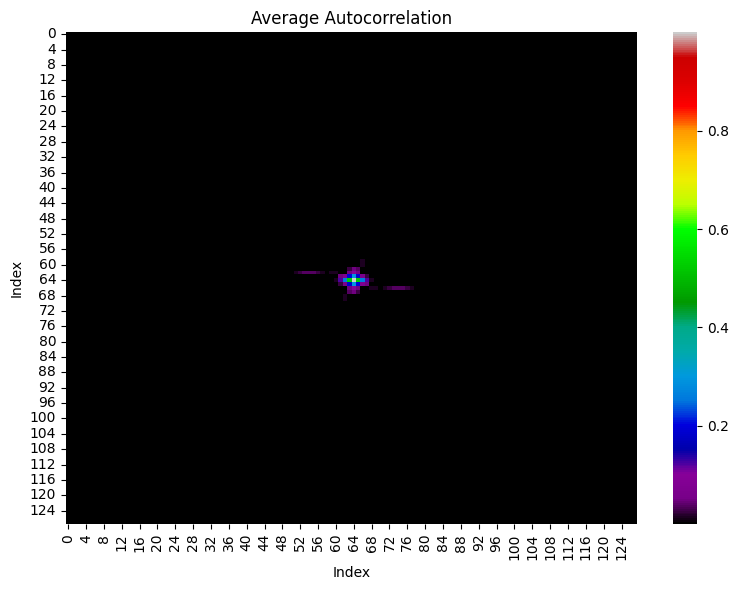

Mean: (1.8634724839594607e-20-2.82118644197349e-37j)
Max: (0.9999255898558063+0j)
Min: (-0.03711144718123072-1.5257078926696478e-18j)
SD: 0.005695615006454254
Processing subfolder: DDPM
1000


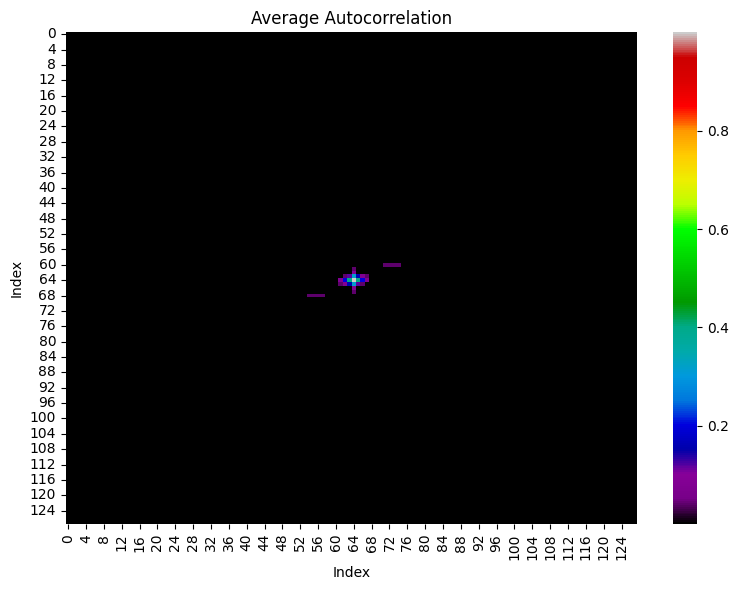

Mean: (-3.3881317890172014e-21+9.4039548065783e-37j)
Max: (0.9999420166015626+0j)
Min: (-0.040057983398437504-9.856244359683931e-19j)
SD: 0.0051606569458747835
Processing subfolder: LDM
1000


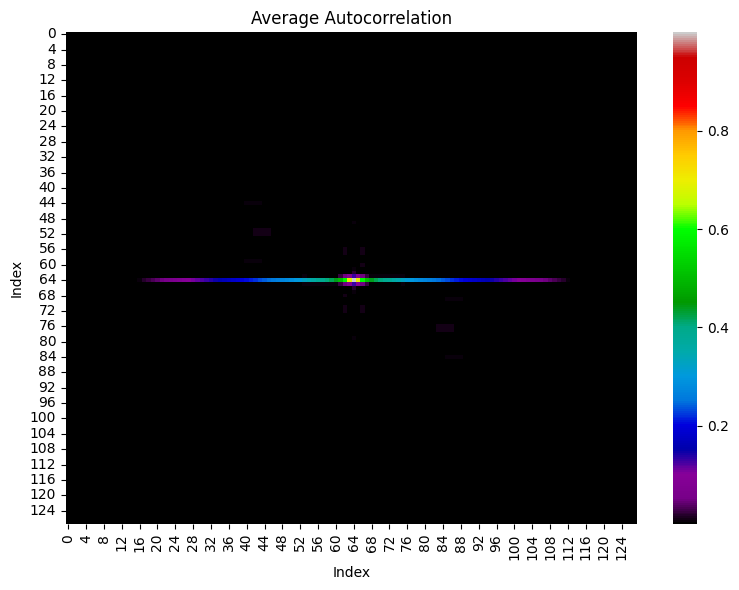

Mean: (-8.809142651444724e-20-1.9278107353485515e-36j)
Max: (0.9996434992009943+0j)
Min: (-0.008620963608923055-1.1887403062635011e-17j)
SD: 0.011058587399908913
Processing subfolder: Real
1000


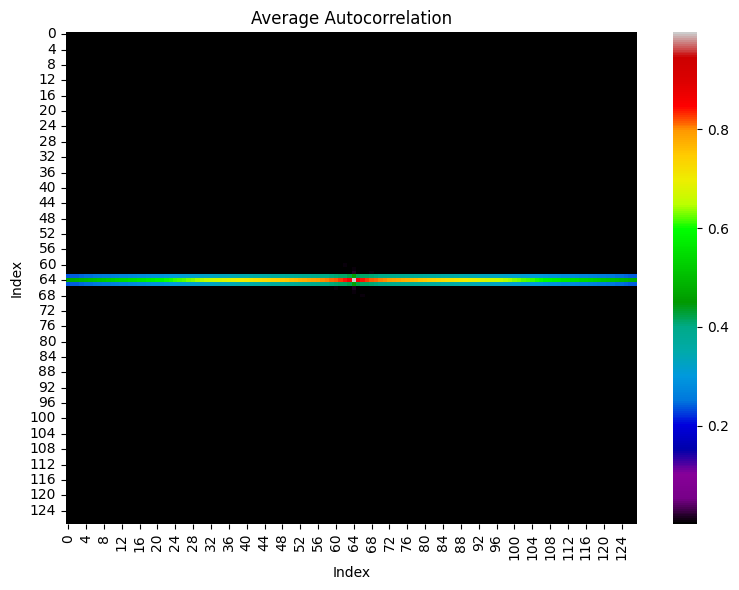

Mean: (-1.1926223897340549e-18-2.256949153578792e-36j)
Max: (0.9961815206413589+0j)
Min: (-0.006667482207643346-2.0596435786609394e-17j)
SD: 0.040192257719245894
Processing subfolder: PNDM
1000


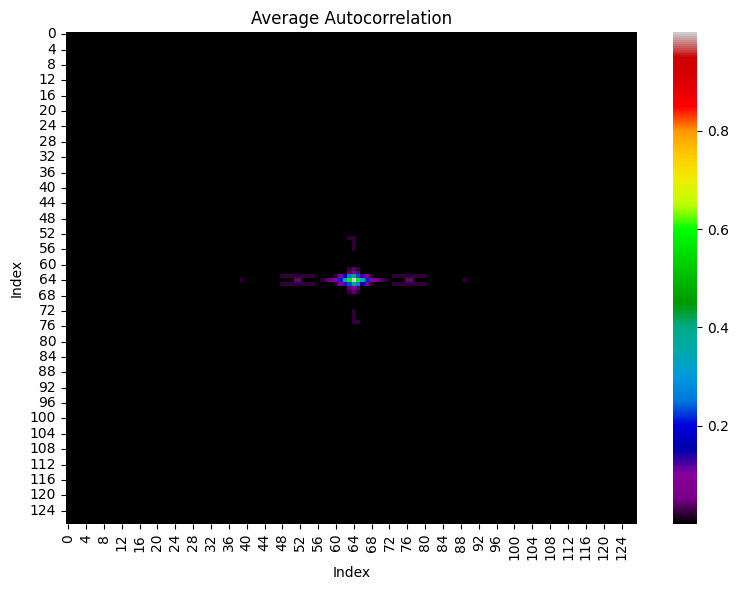

Mean: (-1.0164395367051604e-20+0j)
Max: (0.9999016295088099+0j)
Min: (-0.042651561980551866-1.2434469862568665e-18j)
SD: 0.006482499179128465
Processing subfolder: IDDPM
1000


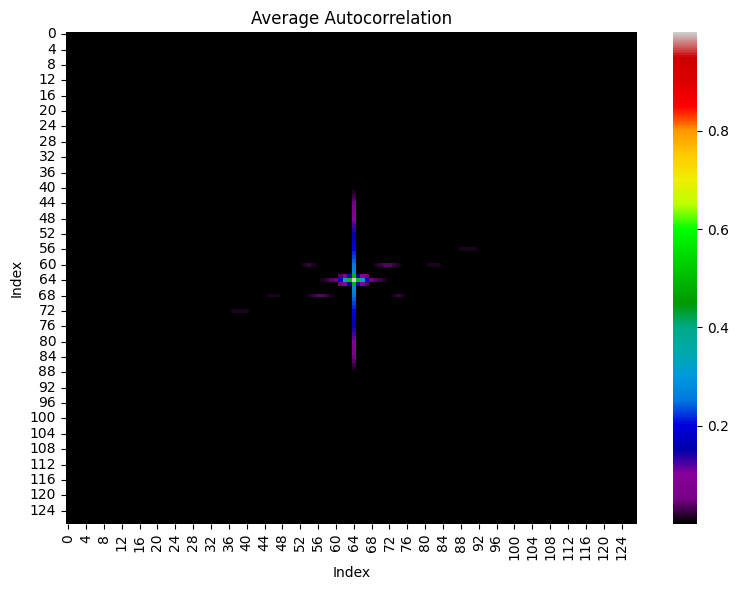

Mean: -1.504632769052528e-36j
Max: (0.9998259725449958+0j)
Min: (-0.03814871099930775-2.3502189552540684e-18j)
SD: 0.007433166054501221


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path, quality = 1):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert image to JPEG format with specified quality
    _, encoded_image = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    compressed_image = cv2.imdecode(encoded_image, cv2.IMREAD_GRAYSCALE)
    return compressed_image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    #  # Show original and noisy images side by side
    # plt.figure(figsize=(12, 6))
    # for i, image_path in enumerate(images):
    #     image = load_image(image_path)
    #     noisy_image = rotate_image(image, 10)  # You can adjust the noise level as needed

    #     plt.subplot(2, len(images), i + 1)
    #     plt.imshow(image, cmap='gray')
    #     plt.title("Original")
    #     plt.axis('off')

    #     plt.subplot(2, len(images), len(images) + i + 1)
    #     plt.imshow(noisy_image, cmap='gray')
    #     plt.title("Noisy")
    #     plt.axis('off')

    # plt.tight_layout()
    # plt.show()

    calculate_power_spectrum_statistics(avg_autocorr)



# 90% COMPRESSION

In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path, quality = 10):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert image to JPEG format with specified quality
    _, encoded_image = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    compressed_image = cv2.imdecode(encoded_image, cv2.IMREAD_GRAYSCALE)
    return compressed_image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    #  # Show original and noisy images side by side
    # plt.figure(figsize=(12, 6))
    # for i, image_path in enumerate(images):
    #     image = load_image(image_path)
    #     noisy_image = rotate_image(image, 10)  # You can adjust the noise level as needed

    #     plt.subplot(2, len(images), i + 1)
    #     plt.imshow(image, cmap='gray')
    #     plt.title("Original")
    #     plt.axis('off')

    #     plt.subplot(2, len(images), len(images) + i + 1)
    #     plt.imshow(noisy_image, cmap='gray')
    #     plt.title("Noisy")
    #     plt.axis('off')

    # plt.tight_layout()
    # plt.show()

    calculate_power_spectrum_statistics(avg_autocorr)

## Data Augmentation : COMPRESSION 75%

Processing subfolder: ADM
1000


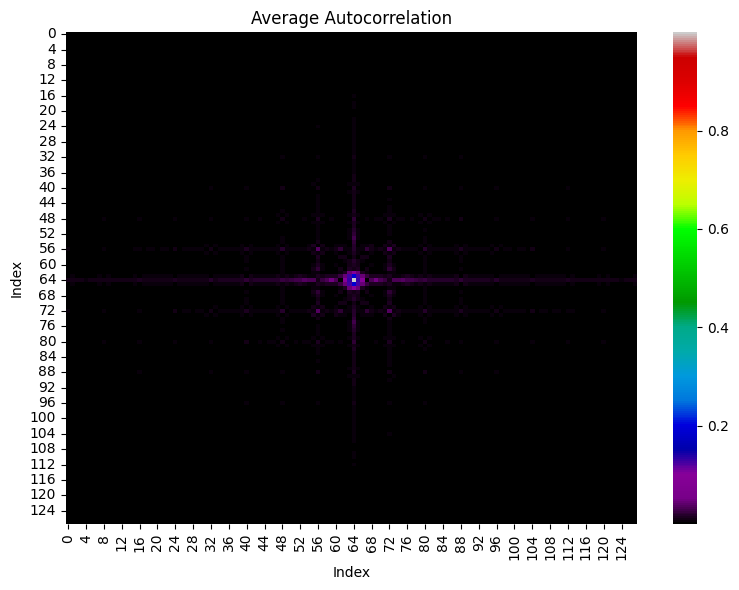

Mean: (1.6940658945086007e-21-1.169616879068176e-36j)
Max: (0.9996462348113089+0j)
Min: (-0.1262960902378288+6.017781446987226e-20j)
SD: 0.004547551230305138
Processing subfolder: DDPM
1000


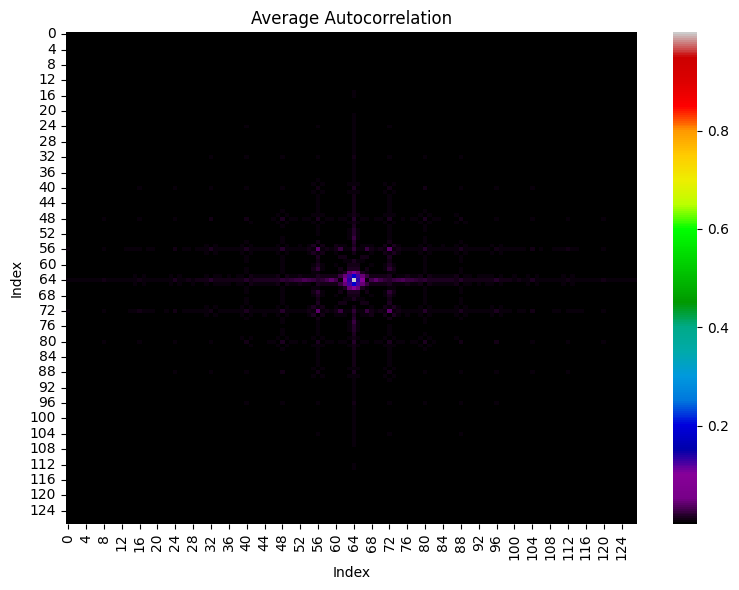

Mean: (2.1175823681357508e-20+2.82118644197349e-37j)
Max: (0.9996208128510522+0j)
Min: (-0.12551579108430652-2.151742418465779e-19j)
SD: 0.004516098633562012
Processing subfolder: LDM
1000


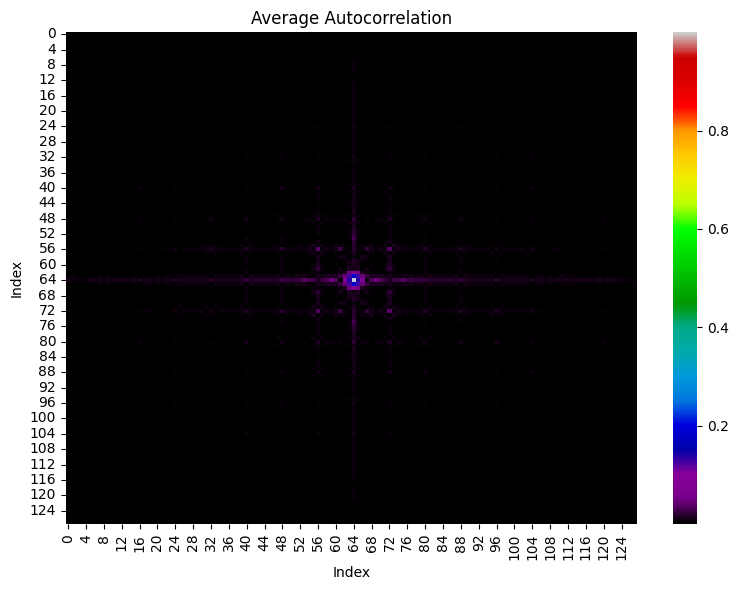

Mean: (-5.082197683525802e-21+8.933757066249385e-37j)
Max: (0.9996318065368421+0j)
Min: (-0.1266542302909464-1.6518243055590588e-18j)
SD: 0.00455649147826996
Processing subfolder: Real
1000


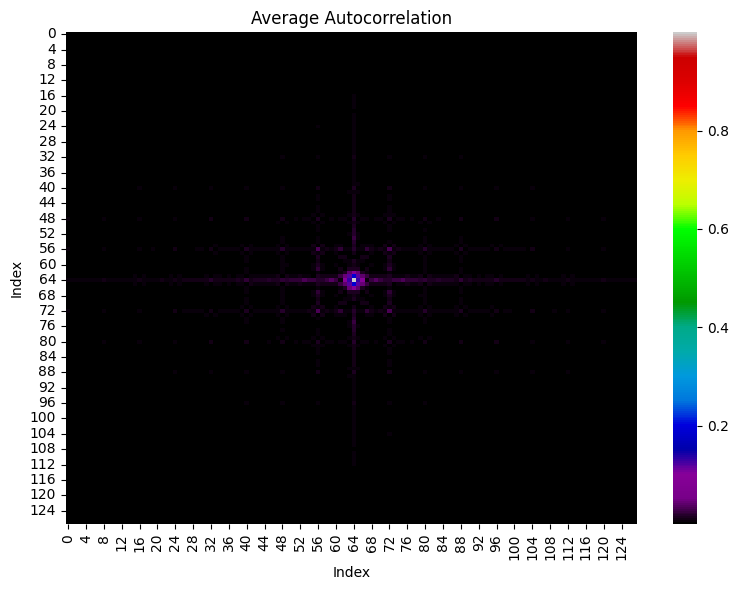

Mean: (-1.3552527156068805e-20-3.0562853121379475e-37j)
Max: (0.9995985166086702+0j)
Min: (-0.11994755747515469+1.3491007752773874e-18j)
SD: 0.004475674633876212
Processing subfolder: PNDM
1000


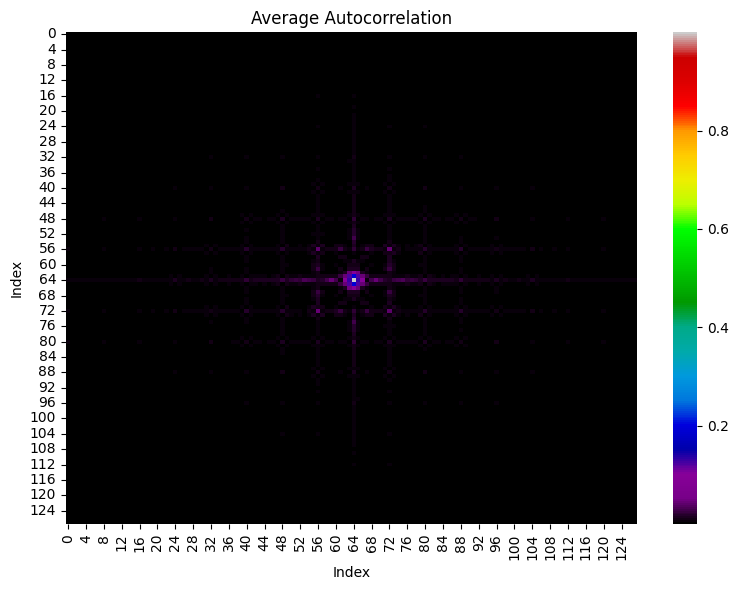

Mean: (-1.1858461261560205e-20+1.1754943508222875e-37j)
Max: (0.9995978947974233+0j)
Min: (-0.12419069487752418-1.029241806479153e-20j)
SD: 0.004528835404868211
Processing subfolder: IDDPM
1000


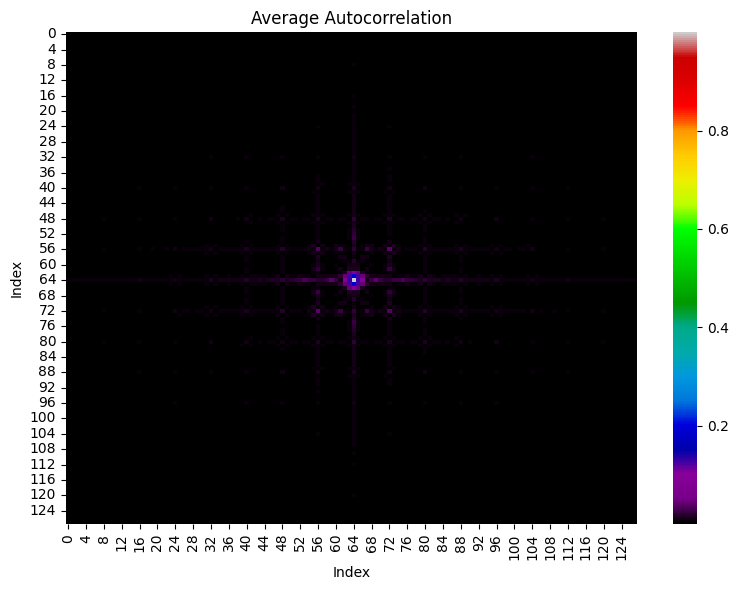

Mean: (-1.5246593050577406e-20-4.231779662960235e-37j)
Max: (0.9996161784913837+0j)
Min: (-0.12550750274923803-1.055663639958142e-19j)
SD: 0.0045016270346412085


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path, quality = 25):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert image to JPEG format with specified quality
    _, encoded_image = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    compressed_image = cv2.imdecode(encoded_image, cv2.IMREAD_GRAYSCALE)
    return compressed_image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    #  # Show original and noisy images side by side
    # plt.figure(figsize=(12, 6))
    # for i, image_path in enumerate(images):
    #     image = load_image(image_path)
    #     noisy_image = rotate_image(image, 10)  # You can adjust the noise level as needed

    #     plt.subplot(2, len(images), i + 1)
    #     plt.imshow(image, cmap='gray')
    #     plt.title("Original")
    #     plt.axis('off')

    #     plt.subplot(2, len(images), len(images) + i + 1)
    #     plt.imshow(noisy_image, cmap='gray')
    #     plt.title("Noisy")
    #     plt.axis('off')

    # plt.tight_layout()
    # plt.show()

    calculate_power_spectrum_statistics(avg_autocorr)



# ## Data Augmentation : Image Bluring

Processing subfolder: ADM
1000


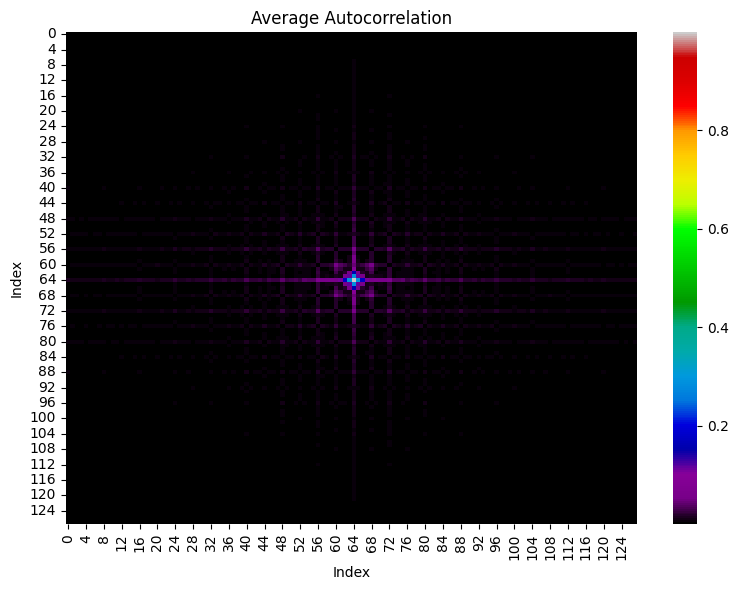

Mean: (-3.3881317890172014e-20+2.5860875718090325e-37j)
Max: (0.9988894746699707+0j)
Min: (-0.052204001101660805-1.306979200453935e-18j)
SD: 0.00543004863645018
Processing subfolder: DDPM
1000


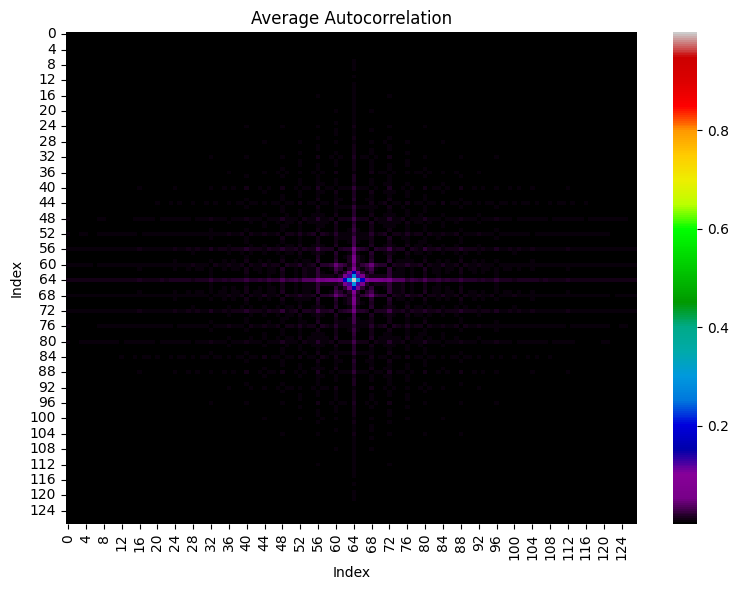

Mean: (-1.0164395367051604e-20+6.112570624275895e-37j)
Max: (0.9989369751159072+0j)
Min: (-0.04427098482193775-1.230831406791477e-18j)
SD: 0.00534704071453533
Processing subfolder: LDM
1000


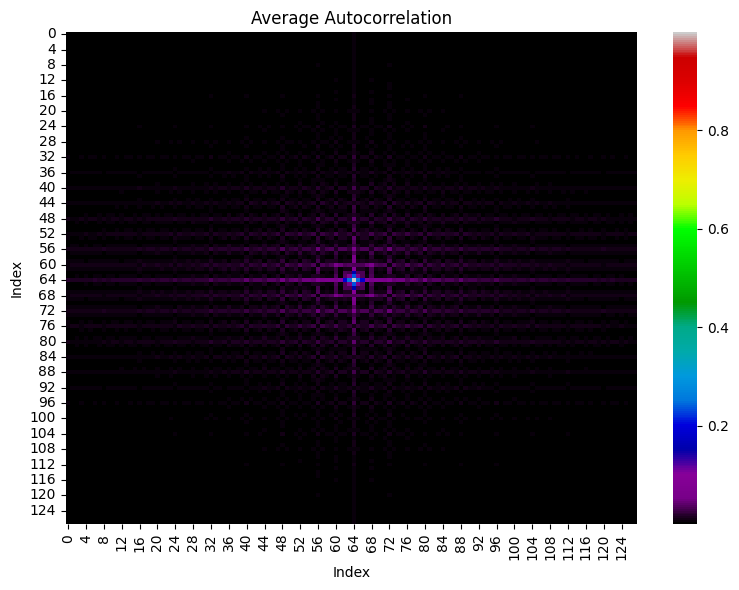

Mean: (4.0657581468206416e-20-6.8178672347692675e-37j)
Max: (0.9990605347332349+0j)
Min: (-0.0624980005952419-7.510681194409073e-20j)
SD: 0.005895472523009939
Processing subfolder: Real
1000


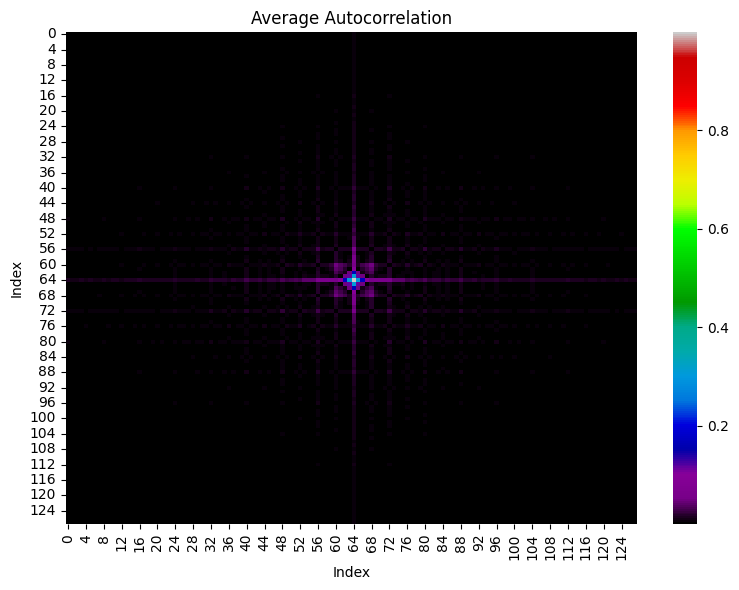

Mean: (3.7269449679189215e-20+1.6456920911512025e-36j)
Max: (0.9988507794807795+0j)
Min: (-0.049012906785261275-1.4776942352165282e-18j)
SD: 0.005397220304573409
Processing subfolder: PNDM
1000


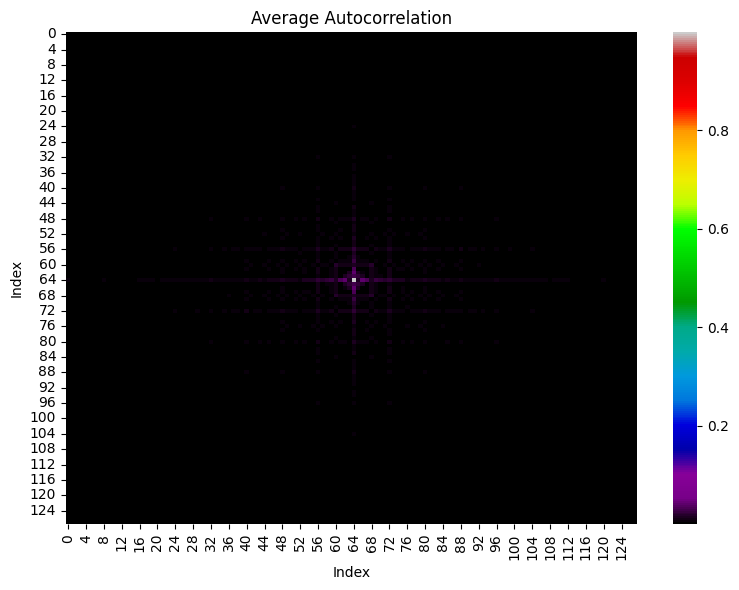

Mean: (-2.371692252312041e-20+4.70197740328915e-38j)
Max: (0.9992194199552917+0j)
Min: (-0.01791828518754449-4.0833508578330006e-19j)
SD: 0.004045615517688374
Processing subfolder: IDDPM
1000


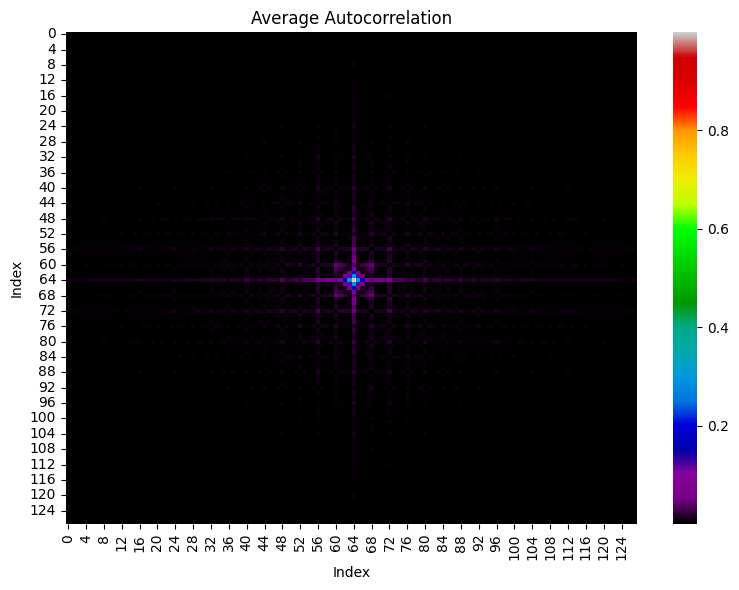

Mean: (-3.5575383784680614e-20+3.9966807927957775e-37j)
Max: (0.9990157119987496+0j)
Min: (-0.04540748051805134-7.948357621337517e-20j)
SD: 0.00525470201318083


In [ ]:
import numpy as np
import cv2
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    # noise_residuals = image.astype(np.float32)
    return noise_residuals

def blur_image(image):
    # Apply Gaussian blurring to the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        image = denoise_image(image)

        blurred_image = blur_image(image)

        # Compute the Fourier transform of the rotated image
        fft_image = np.fft.fft2(image)

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum / (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    normalization_factor = image_shape[0] * image_shape[1]
    autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr


def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)
        blurred_image = blur_image(image)
        image = denoise_image(image)

        # Apply denoising
        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:1]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)


    calculate_power_spectrum_statistics(avg_autocorr)



# 2. Power Spectrum in Frequency Domain

## Data Augmentation : Denoise

Processing subfolder: ADM


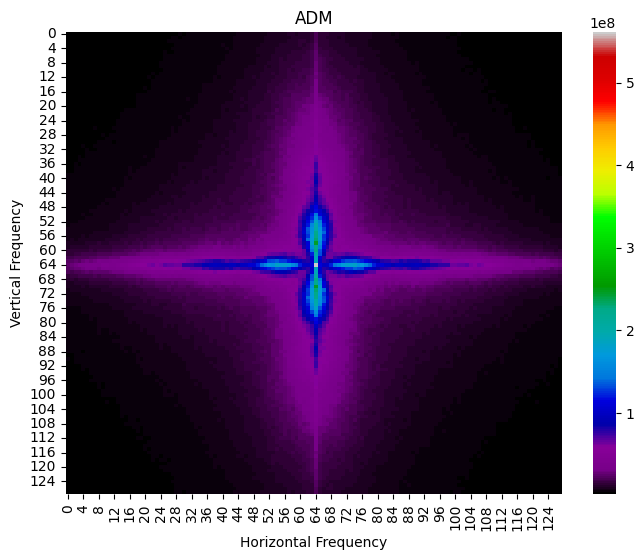

Mean Power: 88.50142207336427
Processing subfolder: DDPM


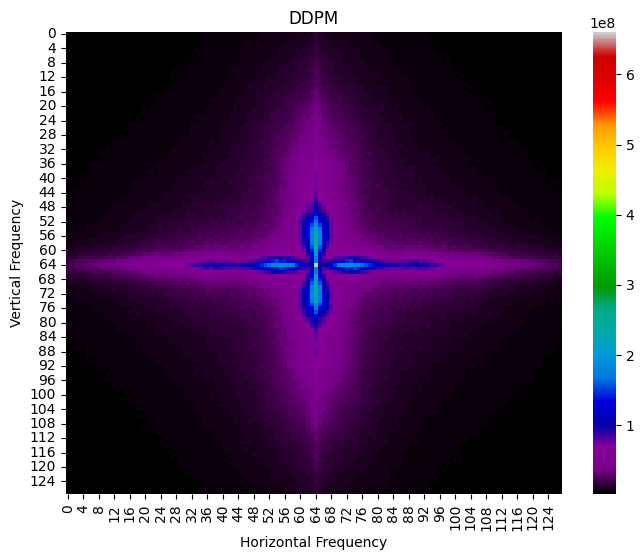

Mean Power: 81.5165910949707
Processing subfolder: LDM


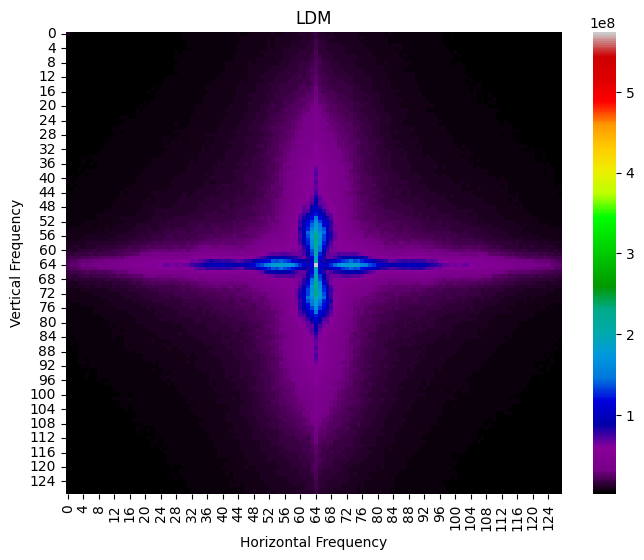

Mean Power: 88.72489582824706
Processing subfolder: Real


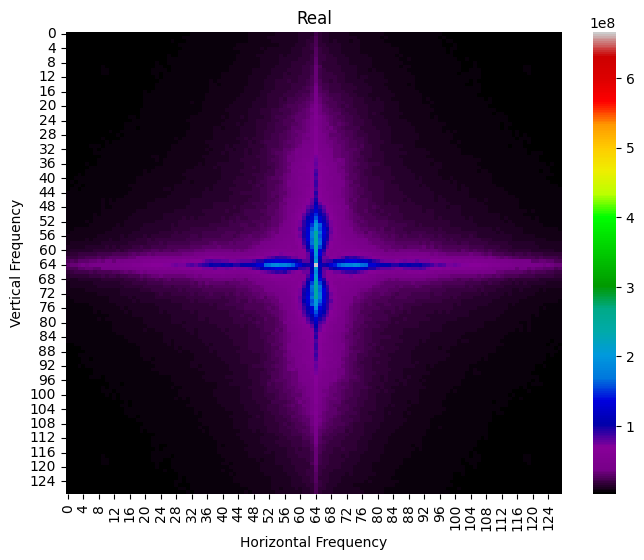

Mean Power: 96.49202139282228
Processing subfolder: PNDM


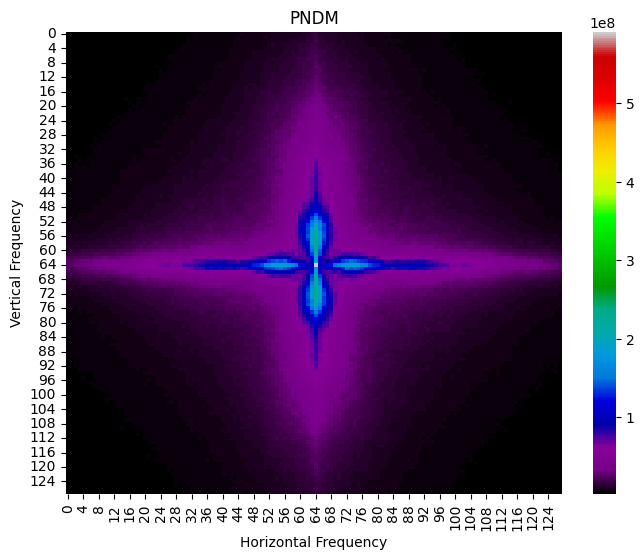

Mean Power: 99.69624111938478
Processing subfolder: IDDPM


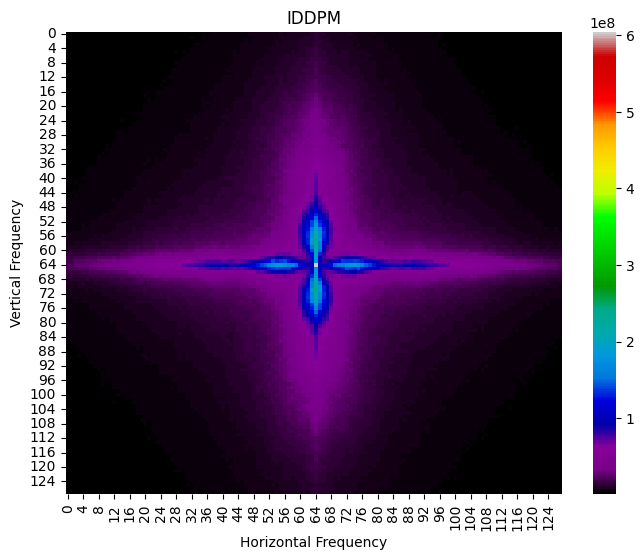

Mean Power: 78.52430043029784


In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt


def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    return image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power



    # # Normalize the power spectrum by dividing by the mean value
    # mean_power = np.mean(power_spectrum)

    return power_spectrum, mean_power

def display_power_spectrum(power_spectrum, subfolder):
    # Calculate the size of the power spectrum
    height, width = power_spectrum.shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_power_spectrum = power_spectrum[start_row:start_row + new_size, start_col:start_col + new_size]

    # Display the cropped power spectrum as a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_power_spectrum, cmap='nipy_spectral')
    plt.title(f'{subfolder}')
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Vertical Frequency')
    plt.show()

def calculate_power_spectrum_statistics(power_spectrum):
    # Calculate statistical information of the power spectrum
    mean_power = np.mean(power_spectrum)
    max_power = np.max(power_spectrum)
    min_power = np.min(power_spectrum)
    std_power = np.std(power_spectrum)

    return mean_power, max_power, min_power, std_power


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:100]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate power spectrum
    power_spectrum_org, mean_power = calculate_power_spectrum(images)

    # Display the power spectrum
    display_power_spectrum(power_spectrum_org, subfolder)

    # Print statistical information
    print("Mean Power:", mean_power)

    # # Save the power spectrum as a PNG image
    # save_path = os.path.join(output_path, subfolder + f"_power_spectrum_{subfolder}_Power_Spectrum.png")
    # cv2.imwrite(save_path, power_spectrum)
    # print("Power spectrum saved as:", save_path)


## Data Augmentation : Rescale 2x

Processing subfolder: ADM


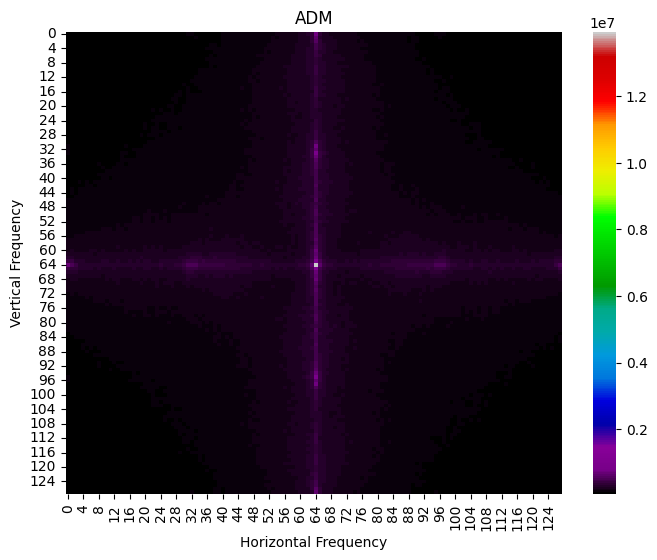

Mean Power: 0.1338264923095703
Processing subfolder: DDPM


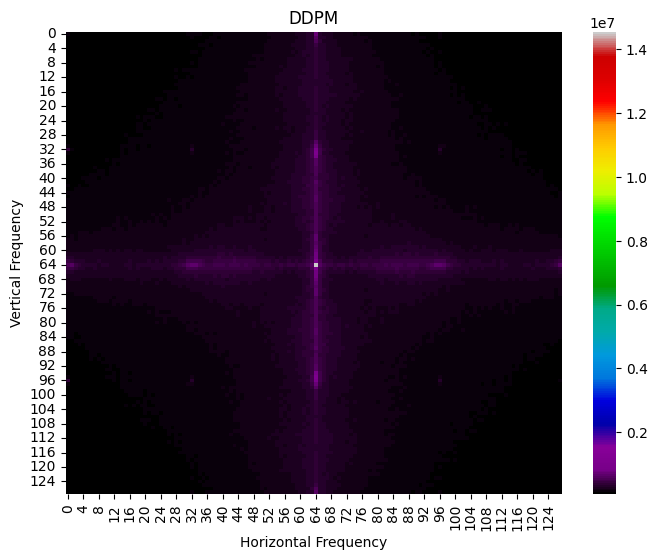

Mean Power: 0.1470510673522949
Processing subfolder: LDM


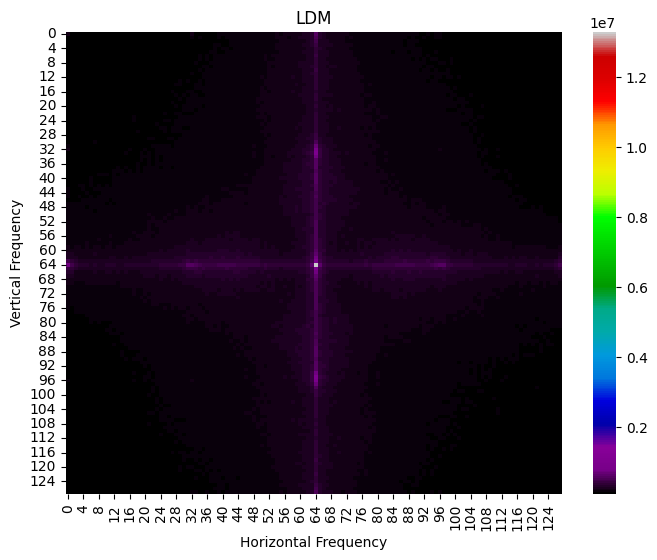

Mean Power: 0.15747770309448245
Processing subfolder: Real


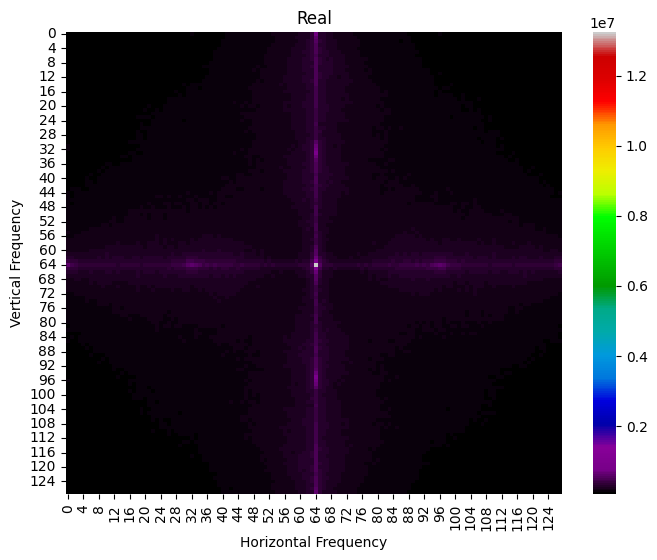

Mean Power: 0.12640864181518555
Processing subfolder: PNDM


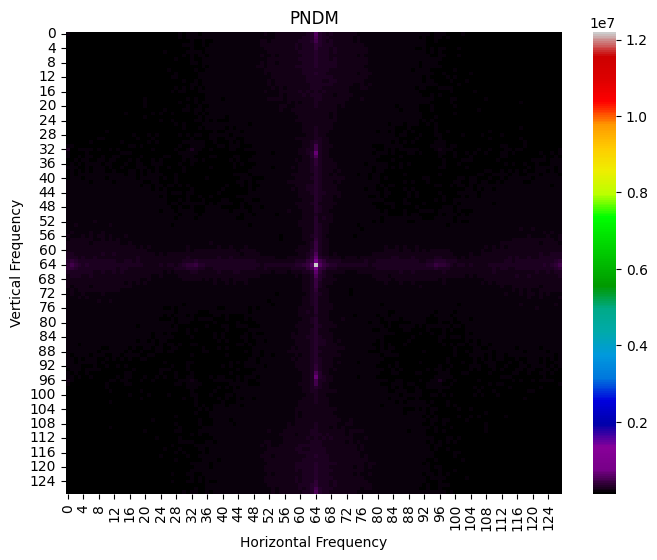

Mean Power: 0.17999626541137698
Processing subfolder: IDDPM


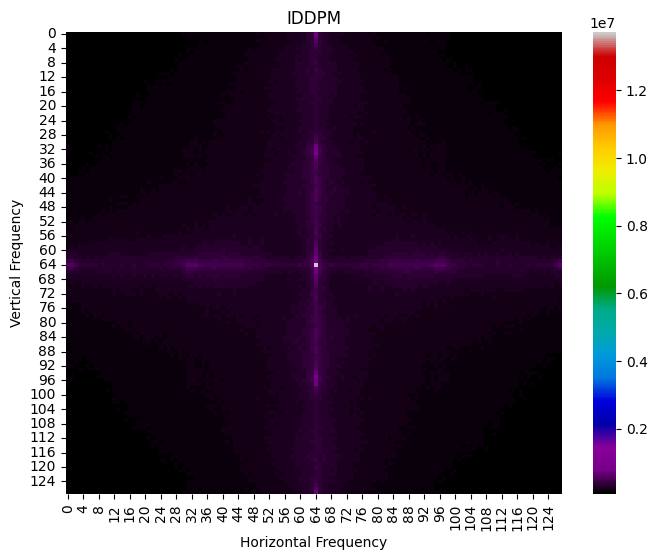

Mean Power: 0.15140954971313478


In [ ]:

import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt


def load_image(image_path, resize_scale = 2):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    resized_image = cv2.resize(image, None, fx=resize_scale, fy=resize_scale, interpolation=cv2.INTER_LINEAR)
    return resized_image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power



    # # Normalize the power spectrum by dividing by the mean value
    # mean_power = np.mean(power_spectrum)

    return power_spectrum, mean_power

def display_power_spectrum(power_spectrum, subfolder):
    # Calculate the size of the power spectrum
    height, width = power_spectrum.shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_power_spectrum = power_spectrum[start_row:start_row + new_size, start_col:start_col + new_size]

    # Display the cropped power spectrum as a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_power_spectrum, cmap='nipy_spectral')
    plt.title(f'{subfolder}')
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Vertical Frequency')
    plt.show()

def calculate_power_spectrum_statistics(power_spectrum):
    # Calculate statistical information of the power spectrum
    mean_power = np.mean(power_spectrum)
    max_power = np.max(power_spectrum)
    min_power = np.min(power_spectrum)
    std_power = np.std(power_spectrum)

    return mean_power, max_power, min_power, std_power


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:100]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate power spectrum
    power_spectrum_org, mean_power = calculate_power_spectrum(images)

    # Display the power spectrum
    display_power_spectrum(power_spectrum_org, subfolder)

    # Print statistical information
    print("Mean Power:", mean_power)

    # # Save the power spectrum as a PNG image
    # save_path = os.path.join(output_path, subfolder + f"_power_spectrum_{subfolder}_Power_Spectrum.png")
    # cv2.imwrite(save_path, power_spectrum)
    # print("Power spectrum saved as:", save_path)


## Data Augmentation : Rotate 10%

Processing subfolder: ADM


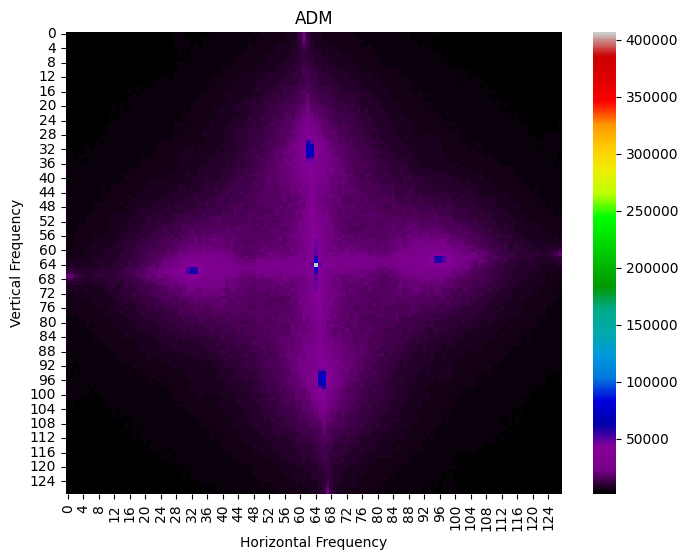

Mean Power: 0.05478534475786728
Processing subfolder: DDPM


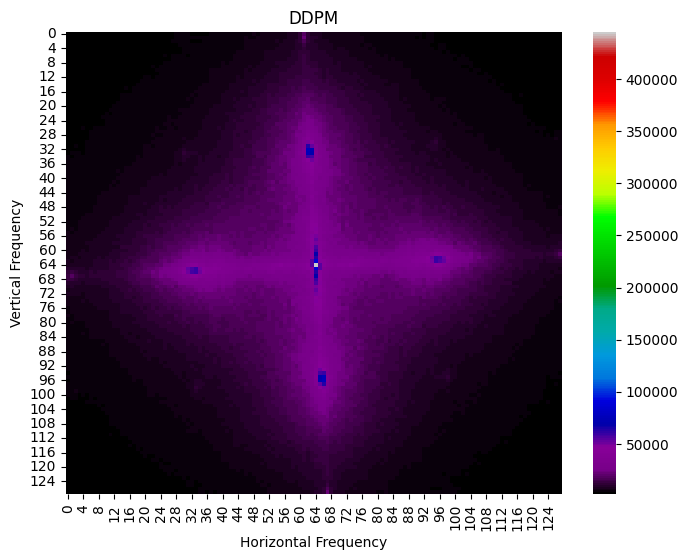

Mean Power: 0.06267635997998879
Processing subfolder: LDM


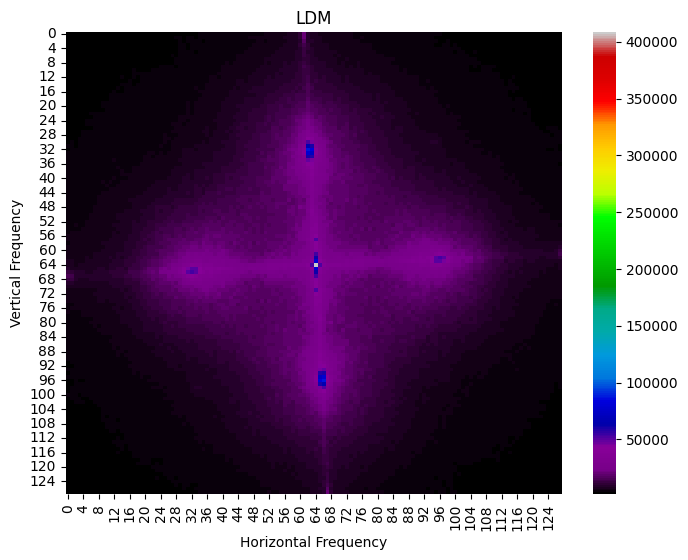

Mean Power: 0.06083780266655959
Processing subfolder: Real


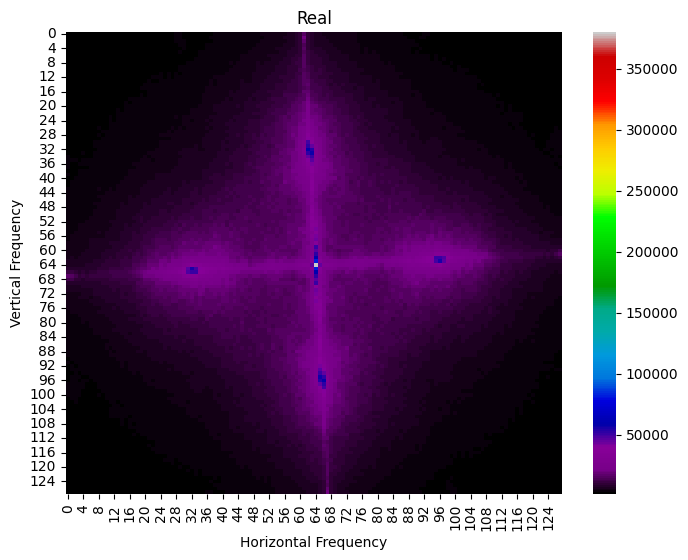

Mean Power: 0.04911587508305093
Processing subfolder: PNDM


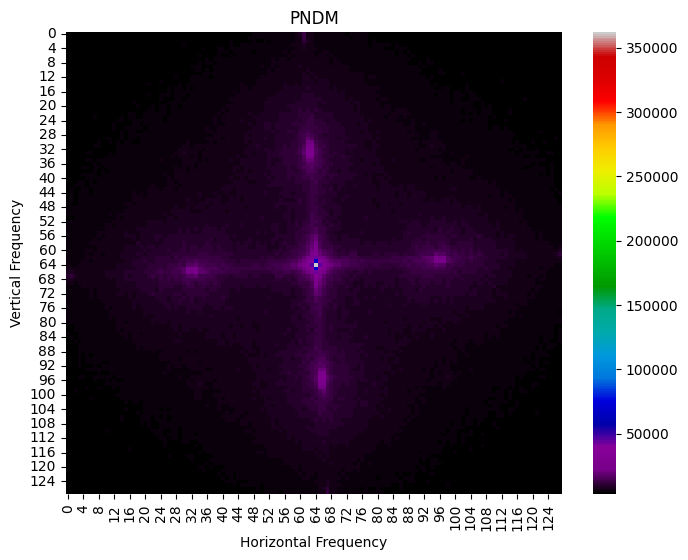

Mean Power: 0.05347646112166695
Processing subfolder: IDDPM


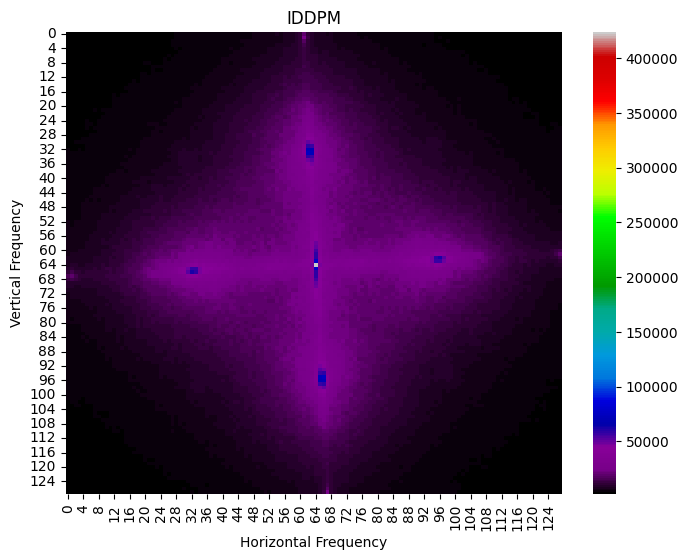

Mean Power: 0.06474623295894708


In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    return image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def rotate_image(image, angle):
    rows, cols = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image


def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Rotate the image randomly by 10%
        random.seed(42)
        angle = random.uniform(-10, 10)
        rotated_image = rotate_image(denoised_image, angle)

        # Compute the Fourier transform of the image
        fft_image = np.fft.fftshift(np.fft.fft2(rotated_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power



    # # Normalize the power spectrum by dividing by the mean value
    # mean_power = np.mean(power_spectrum)

    return power_spectrum, mean_power

def display_power_spectrum(power_spectrum, subfolder):
    # Calculate the size of the power spectrum
    height, width = power_spectrum.shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_power_spectrum = power_spectrum[start_row:start_row + new_size, start_col:start_col + new_size]

    # Display the cropped power spectrum as a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_power_spectrum, cmap='nipy_spectral')
    plt.title(f'{subfolder}')
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Vertical Frequency')
    plt.show()

def calculate_power_spectrum_statistics(power_spectrum):
    # Calculate statistical information of the power spectrum
    mean_power = np.mean(power_spectrum)
    max_power = np.max(power_spectrum)
    min_power = np.min(power_spectrum)
    std_power = np.std(power_spectrum)

    return mean_power, max_power, min_power, std_power


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:100]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate power spectrum
    power_spectrum_org, mean_power = calculate_power_spectrum(images)

    # Display the power spectrum
    display_power_spectrum(power_spectrum_org, subfolder)

    # Print statistical information
    print("Mean Power:", mean_power)

    # # Save the power spectrum as a PNG image
    # save_path = os.path.join(output_path, subfolder + f"_power_spectrum_{subfolder}_Power_Spectrum.png")
    # cv2.imwrite(save_path, power_spectrum)
    # print("Power spectrum saved as:", save_path)


## Data Augmentation : compression 99% + Denoised




Processing subfolder: ADM


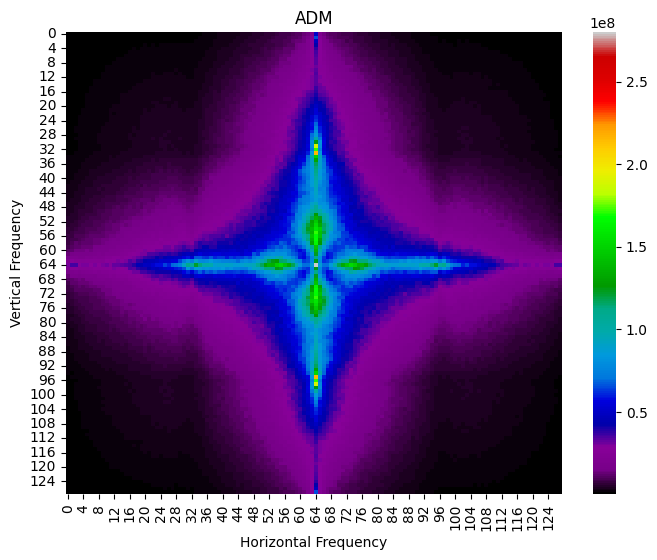

Mean Power: 92.37080905151367
Processing subfolder: DDPM


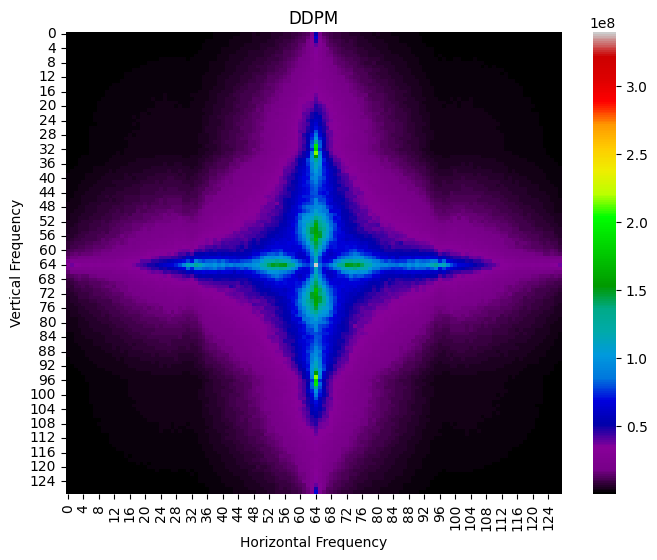

Mean Power: 86.96794033813478
Processing subfolder: LDM


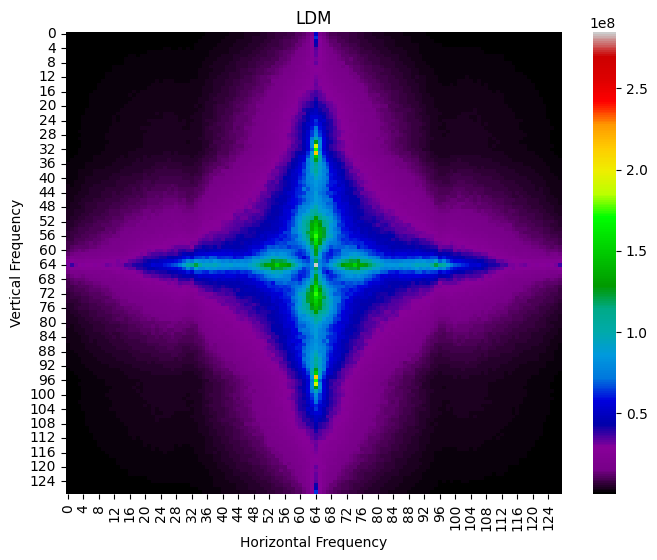

Mean Power: 89.87104765319823
Processing subfolder: Real


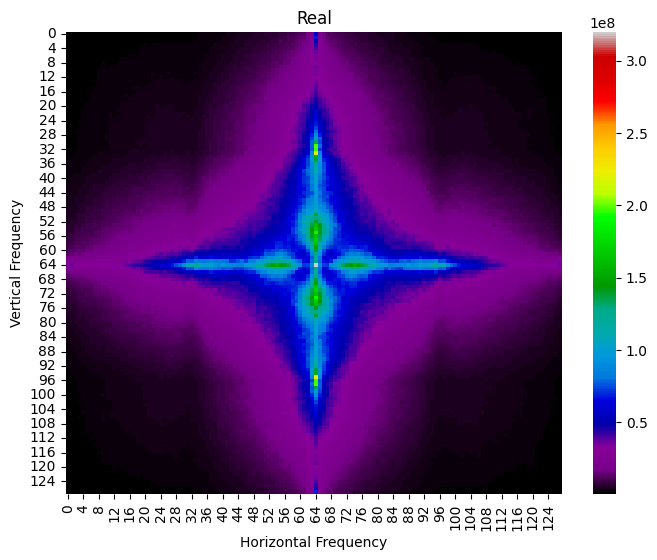

Mean Power: 95.92158195495605
Processing subfolder: PNDM


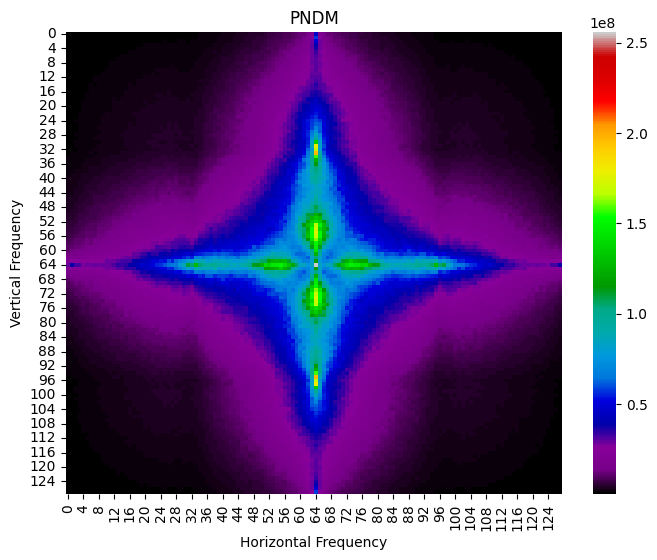

Mean Power: 94.99749784851075
Processing subfolder: IDDPM


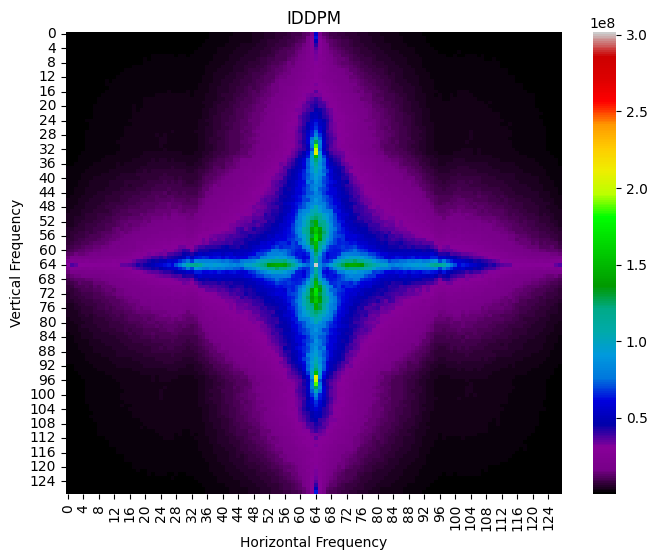

Mean Power: 85.26050505065919


In [ ]:

import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt


def load_image(image_path, quality = 1):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert image to JPEG format with specified quality
    _, encoded_image = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    compressed_image = cv2.imdecode(encoded_image, cv2.IMREAD_GRAYSCALE)
    return compressed_image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power



    # # Normalize the power spectrum by dividing by the mean value
    # mean_power = np.mean(power_spectrum)

    return power_spectrum, mean_power

def display_power_spectrum(power_spectrum, subfolder):
    # Calculate the size of the power spectrum
    height, width = power_spectrum.shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_power_spectrum = power_spectrum[start_row:start_row + new_size, start_col:start_col + new_size]

    # Display the cropped power spectrum as a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_power_spectrum, cmap='nipy_spectral')
    plt.title(f'{subfolder}')
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Vertical Frequency')
    plt.show()

def calculate_power_spectrum_statistics(power_spectrum):
    # Calculate statistical information of the power spectrum
    mean_power = np.mean(power_spectrum)
    max_power = np.max(power_spectrum)
    min_power = np.min(power_spectrum)
    std_power = np.std(power_spectrum)

    return mean_power, max_power, min_power, std_power


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:100]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate power spectrum
    power_spectrum_org, mean_power = calculate_power_spectrum(images)

    # Display the power spectrum
    display_power_spectrum(power_spectrum_org, subfolder)

    # Print statistical information
    print("Mean Power:", mean_power)

    # # Save the power spectrum as a PNG image
    # save_path = os.path.join(output_path, subfolder + f"_power_spectrum_{subfolder}_Power_Spectrum.png")
    # cv2.imwrite(save_path, power_spectrum)
    # print("Power spectrum saved as:", save_path)


## Data Augmentation : 99% compression

Processing subfolder: ADM


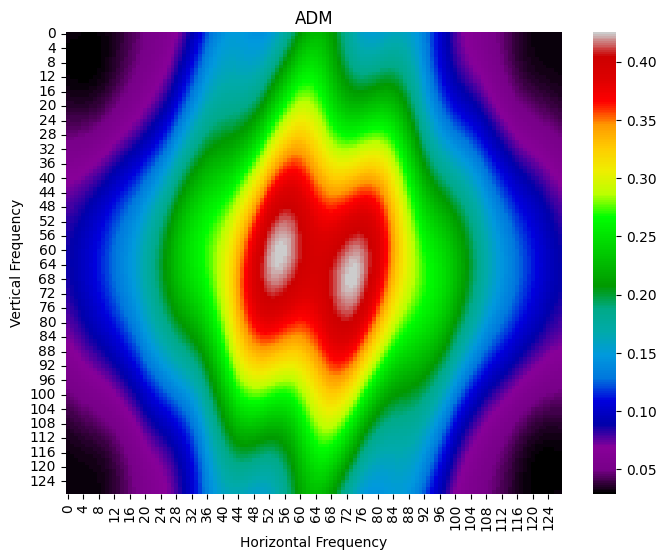

Mean Power: 1.2359619140625003e-06
Processing subfolder: DDPM


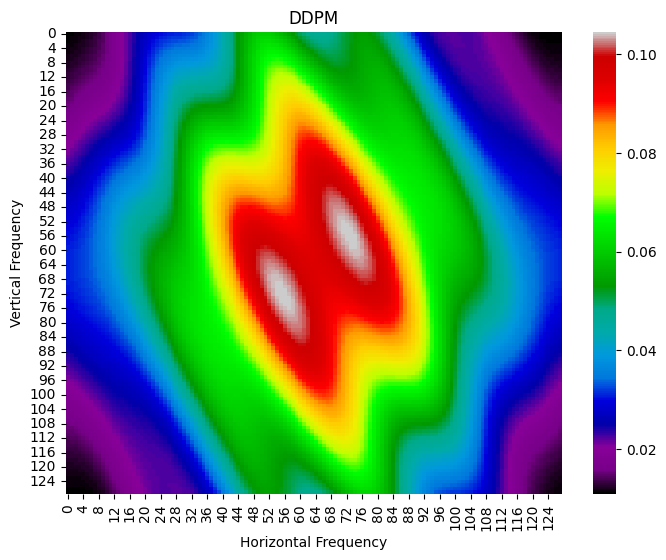

Mean Power: 3.814697265625e-07
Processing subfolder: LDM


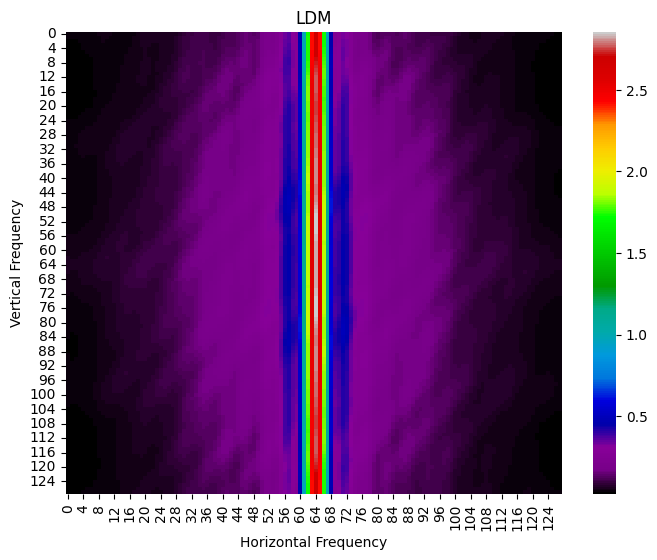

Mean Power: 1.8463134765625e-06
Processing subfolder: Real


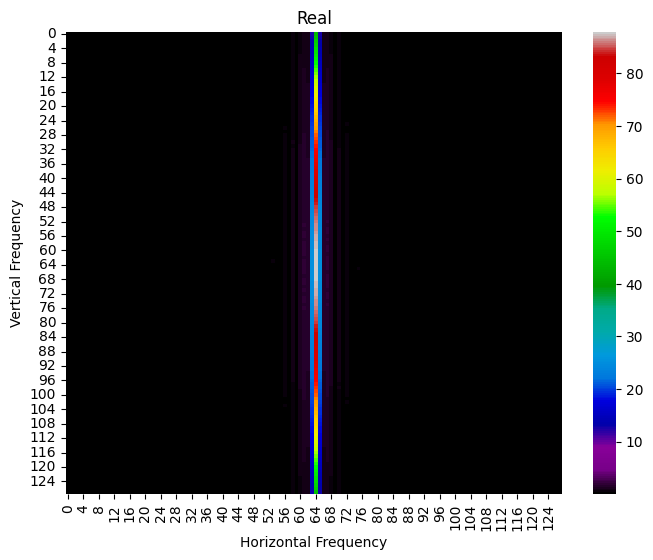

Mean Power: 5.355834960937501e-06
Processing subfolder: PNDM


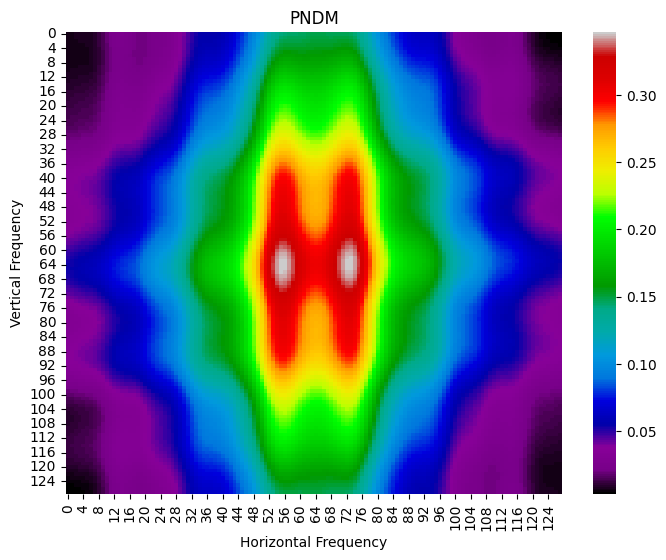

Mean Power: 7.171630859375e-07
Processing subfolder: IDDPM


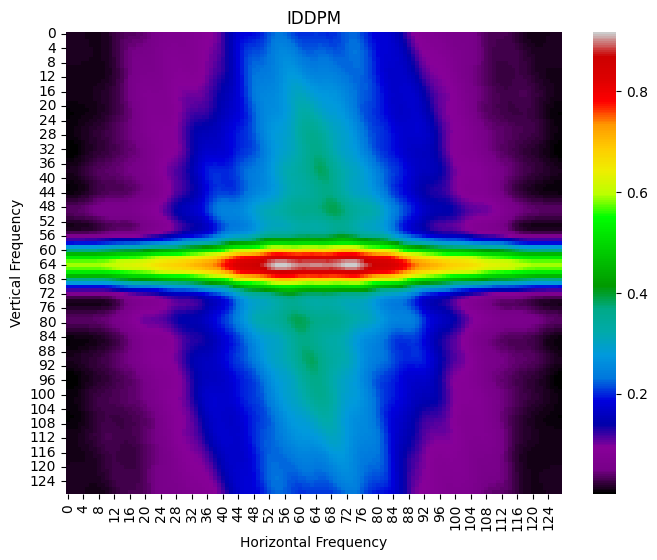

Mean Power: 1.2054443359375e-06


In [ ]:

import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt


def load_image(image_path, quality = 1):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert image to JPEG format with specified quality
    _, encoded_image = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    compressed_image = cv2.imdecode(encoded_image, cv2.IMREAD_GRAYSCALE)
    return compressed_image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power



    # # Normalize the power spectrum by dividing by the mean value
    # mean_power = np.mean(power_spectrum)

    return power_spectrum, mean_power

def display_power_spectrum(power_spectrum, subfolder):
    # Calculate the size of the power spectrum
    height, width = power_spectrum.shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_power_spectrum = power_spectrum[start_row:start_row + new_size, start_col:start_col + new_size]

    # Display the cropped power spectrum as a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_power_spectrum, cmap='nipy_spectral')
    plt.title(f'{subfolder}')
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Vertical Frequency')
    plt.show()

def calculate_power_spectrum_statistics(power_spectrum):
    # Calculate statistical information of the power spectrum
    mean_power = np.mean(power_spectrum)
    max_power = np.max(power_spectrum)
    min_power = np.min(power_spectrum)
    std_power = np.std(power_spectrum)

    return mean_power, max_power, min_power, std_power


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:100]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate power spectrum
    power_spectrum_org, mean_power = calculate_power_spectrum(images)

    # Display the power spectrum
    display_power_spectrum(power_spectrum_org, subfolder)

    # Print statistical information
    print("Mean Power:", mean_power)

    # # Save the power spectrum as a PNG image
    # save_path = os.path.join(output_path, subfolder + f"_power_spectrum_{subfolder}_Power_Spectrum.png")
    # cv2.imwrite(save_path, power_spectrum)
    # print("Power spectrum saved as:", save_path)


## No Data Augmentation

Processing subfolder: ADM


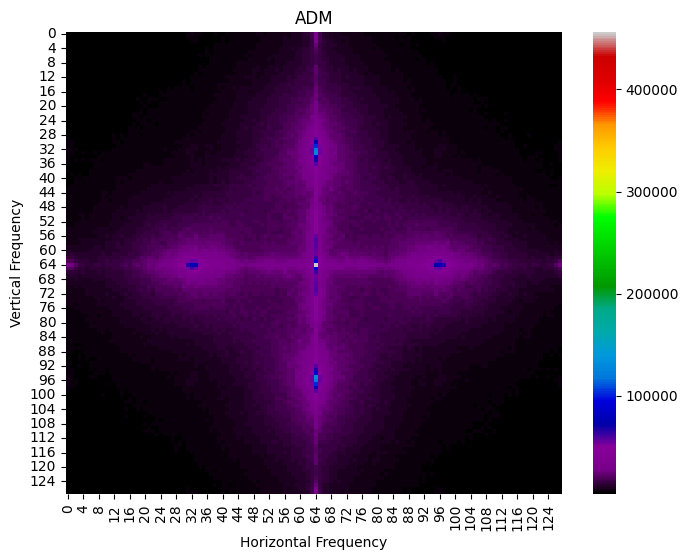

Mean Power: 0.09565316772460938
Processing subfolder: DDPM


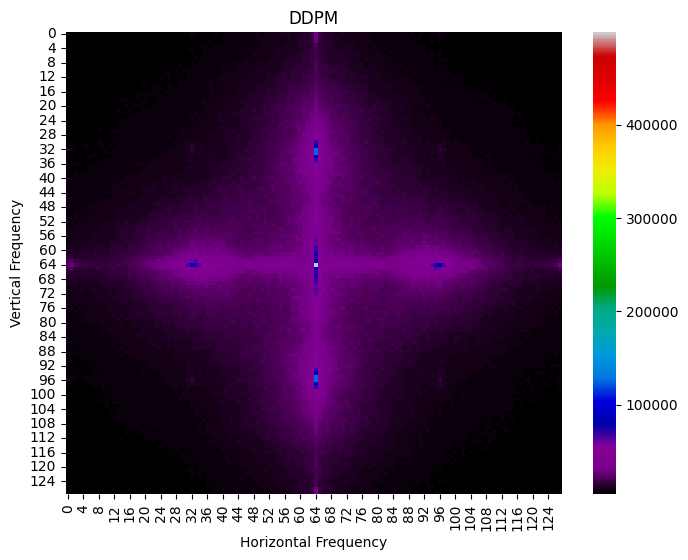

Mean Power: 0.10929672241210939
Processing subfolder: LDM


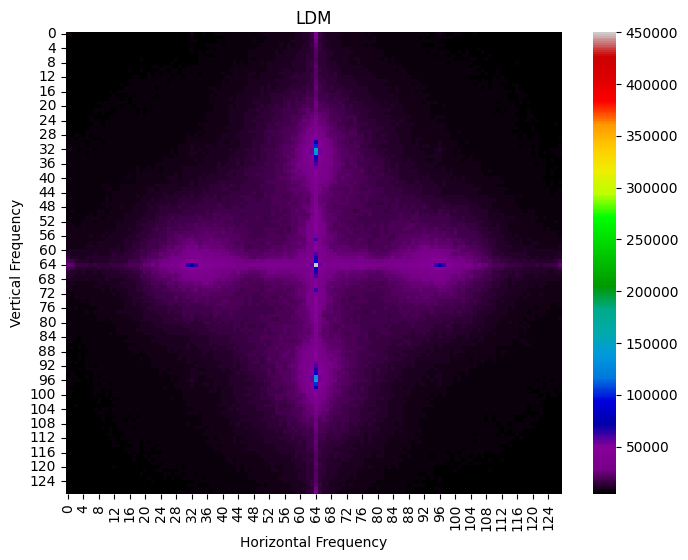

Mean Power: 0.11154103088378908
Processing subfolder: Real


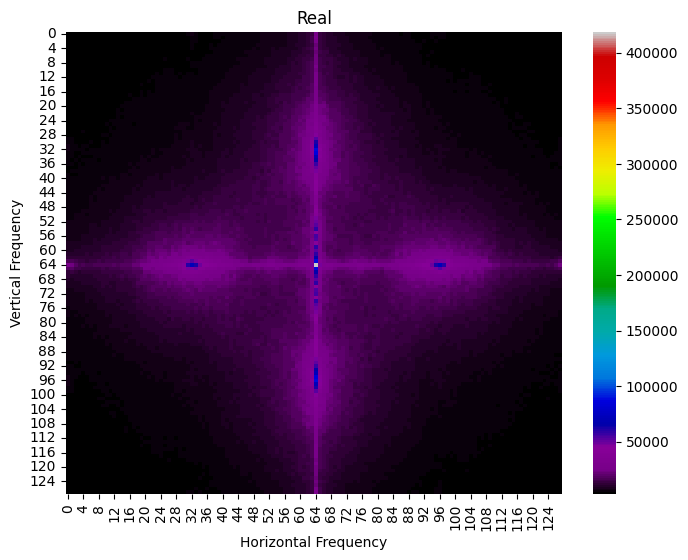

Mean Power: 0.08478240966796875
Processing subfolder: PNDM


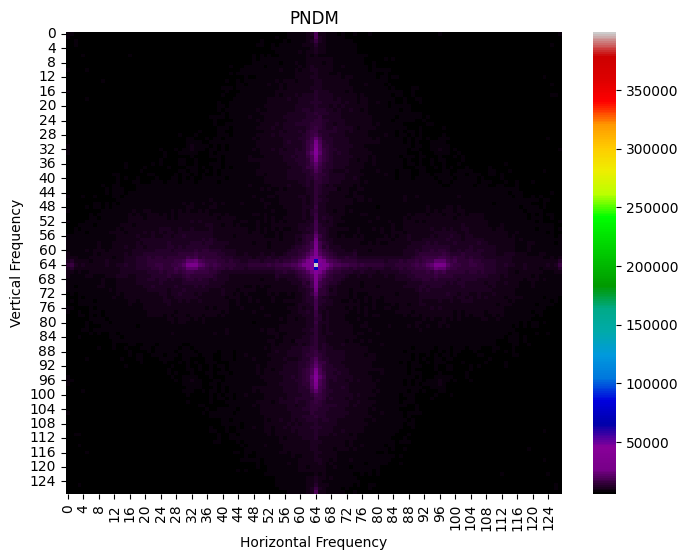

Mean Power: 0.11906120300292969
Processing subfolder: IDDPM


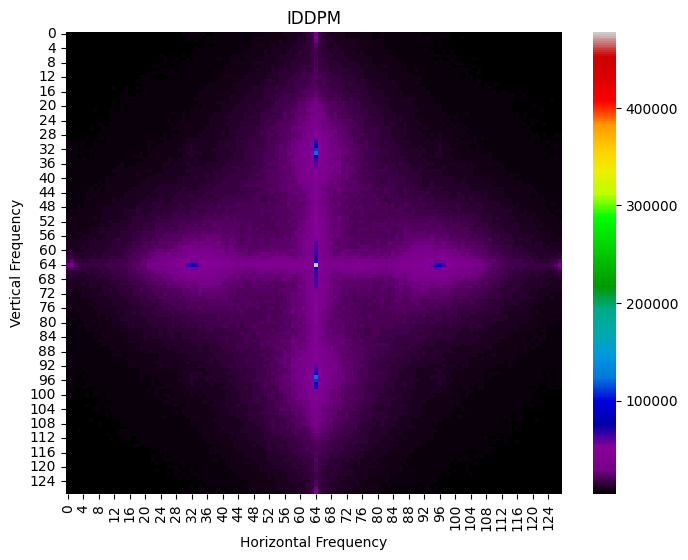

Mean Power: 0.11296463012695314


In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt


def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    return image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    # denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=0, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power



    # # Normalize the power spectrum by dividing by the mean value
    # mean_power = np.mean(power_spectrum)

    return power_spectrum, mean_power

def display_power_spectrum(power_spectrum, subfolder):
    # Calculate the size of the power spectrum
    height, width = power_spectrum.shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_power_spectrum = power_spectrum[start_row:start_row + new_size, start_col:start_col + new_size]

    # Display the cropped power spectrum as a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_power_spectrum, cmap='nipy_spectral')
    plt.title(f'{subfolder}')
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Vertical Frequency')
    plt.show()

def calculate_power_spectrum_statistics(power_spectrum):
    # Calculate statistical information of the power spectrum
    mean_power = np.mean(power_spectrum)
    max_power = np.max(power_spectrum)
    min_power = np.min(power_spectrum)
    std_power = np.std(power_spectrum)

    return mean_power, max_power, min_power, std_power


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:100]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate power spectrum
    power_spectrum_org, mean_power = calculate_power_spectrum(images)

    # Display the power spectrum
    display_power_spectrum(power_spectrum_org, subfolder)

    # Print statistical information
    print("Mean Power:", mean_power)

    # # Save the power spectrum as a PNG image
    # save_path = os.path.join(output_path, subfolder + f"_power_spectrum_{subfolder}_Power_Spectrum.png")
    # cv2.imwrite(save_path, power_spectrum)
    # print("Power spectrum saved as:", save_path)


## Data Augmentation : Low Noise Removal

Processing subfolder: ADM


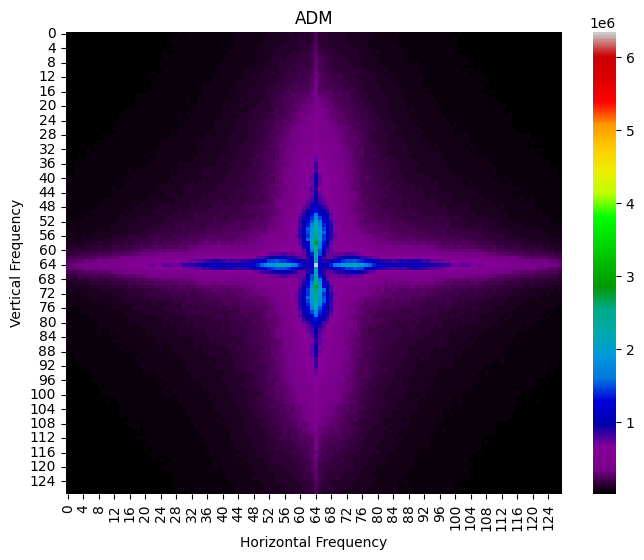

Mean Power: 88.50142207336427
Processing subfolder: DDPM


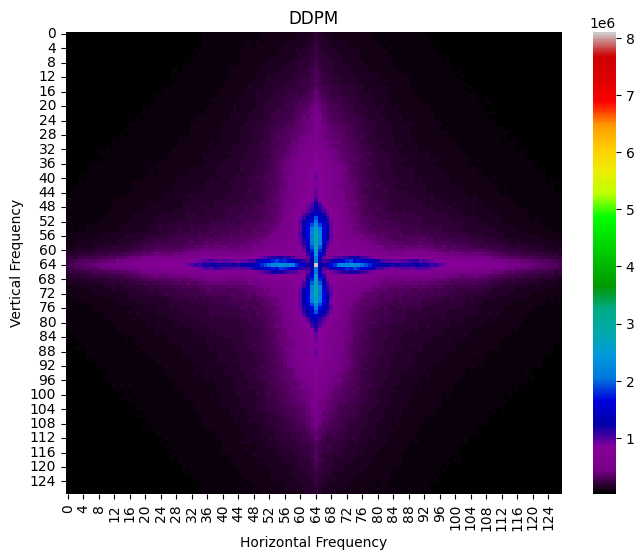

Mean Power: 81.5165910949707
Processing subfolder: LDM


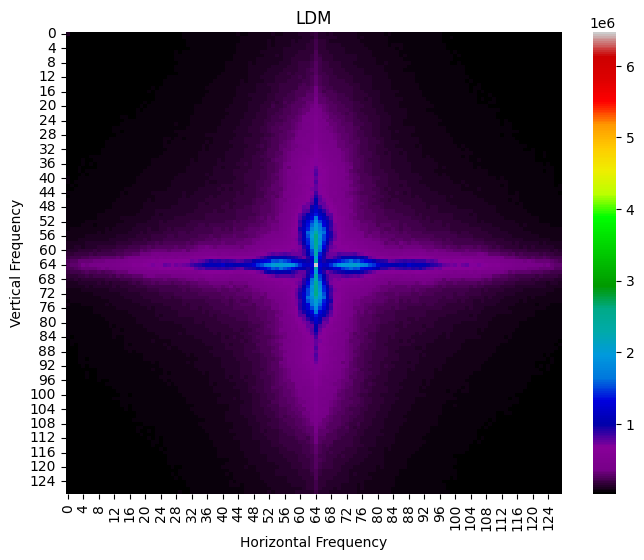

Mean Power: 88.72489582824706
Processing subfolder: Real


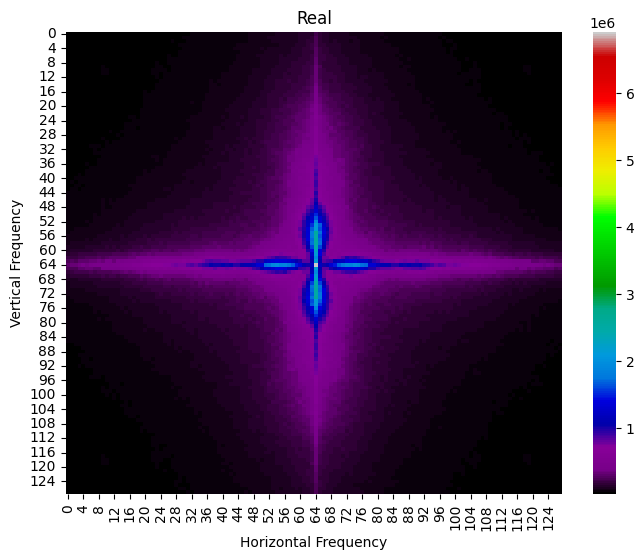

Mean Power: 96.49202139282228
Processing subfolder: PNDM


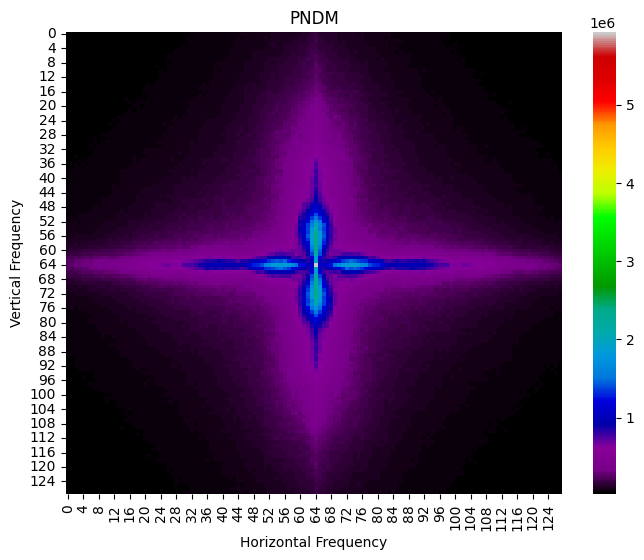

Mean Power: 99.69624111938478
Processing subfolder: IDDPM


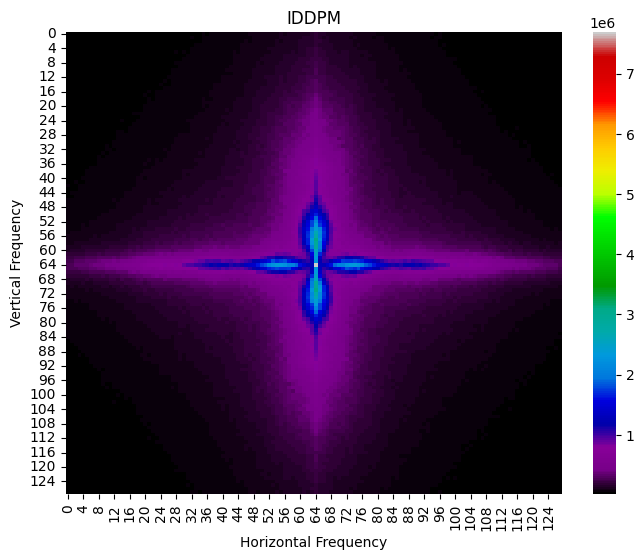

Mean Power: 78.52430043029786


In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt


def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    return image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power



    # # Normalize the power spectrum by dividing by the mean value
    # mean_power = np.mean(power_spectrum)

    return power_spectrum, mean_power, normalized_power_spectrum

def display_power_spectrum(power_spectrum, subfolder):
    # Calculate the size of the power spectrum
    height, width = power_spectrum.shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_power_spectrum = power_spectrum[start_row:start_row + new_size, start_col:start_col + new_size]

    # Display the cropped power spectrum as a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_power_spectrum, cmap='nipy_spectral')
    plt.title(f'{subfolder}')
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Vertical Frequency')
    plt.show()

def calculate_power_spectrum_statistics(power_spectrum):
    # Calculate statistical information of the power spectrum
    mean_power = np.mean(power_spectrum)
    max_power = np.max(power_spectrum)
    min_power = np.min(power_spectrum)
    std_power = np.std(power_spectrum)

    return mean_power, max_power, min_power, std_power


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:100]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate power spectrum
    power_spectrum_org, mean_power, normalized_power_spectrum = calculate_power_spectrum(images)

    # Display the power spectrum
    display_power_spectrum(normalized_power_spectrum, subfolder)

    # Print statistical information
    print("Mean Power:", mean_power)

    # # Save the power spectrum as a PNG image
    # save_path = os.path.join(output_path, subfolder + f"_power_spectrum_{subfolder}_Power_Spectrum.png")
    # cv2.imwrite(save_path, power_spectrum)
    # print("Power spectrum saved as:", save_path)


# 3. Radial Spectra Anlysis

Processing subfolder: ADM
1000
Processing subfolder: DDPM
1000
Processing subfolder: LDM
1000
Processing subfolder: Real
1000
Processing subfolder: PNDM
1000
Processing subfolder: IDDPM
1000


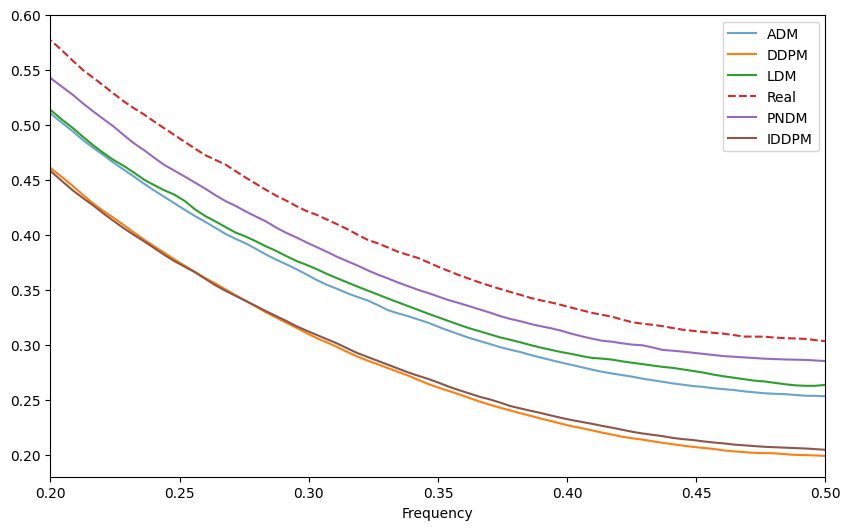

In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def calculate_radial_spectrum(image, num_steps, frequency_range):
    # Compute the Fourier transform of the image
    fourier_transform = (np.fft.fft2(image))
    spectrum = np.abs(fourier_transform)

    # Define the distance range for the radial spectrum
    min_rho, max_rho = frequency_range
    rho_values = np.linspace(min_rho, max_rho, num=num_steps)

    # Calculate the radial spectrum for each distance
    radial_spectrum = np.zeros(num_steps)
    for i, rho in enumerate(rho_values):
        # Define the annulus between radii rho - delta_rho and rho + delta_rho
        delta_rho = (max_rho - min_rho) / num_steps
        annulus = np.logical_and(rho - delta_rho <= np.abs(np.fft.fftfreq(image.shape[0])),
                                 np.abs(np.fft.fftfreq(image.shape[1])) <= rho + delta_rho)

        # Average the values within the annulus
        radial_spectrum[i] = np.mean(spectrum[annulus])
    # Normalize the spectrum by dividing by the standard deviation
    radial_spectrum /= np.std(radial_spectrum)

    return rho_values, radial_spectrum

def compute_radial_spectra(images, num_images, freq_range=(0, 0.5), num_steps=128):
    spectra = []
    for image_path in images[:num_images]:
        # Load the image
        image = load_image(image_path)

        # Compute the radial spectrum for the image
        freq_values, spectrum = calculate_radial_spectrum(image, num_steps, freq_range)
        spectra.append(spectrum)

    return freq_values, spectra

# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

plt.figure(figsize=(10, 6))  # Set figure size

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:10]
    num_images = len(image_files)
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]
    print(num_images)
    # Calculate radial spectra
    freq_values, spectra = compute_radial_spectra(images, num_images = num_images)

    # Average the spectra
    avg_spectrum = np.mean(spectra, axis=0)
    color_map = {
        'Real': '#d7282a',   # Assign 'crimson' to 'Real' subfolder
        'ADM': '#69a4cc',
        'DDPM': '#fe7f0f',
        'IDDPM': '#8c574a',
        'LDM': '#2ca02c',
        'PNDM': '#976abf',
    }
    color = color_map.get(subfolder, 'gray')  # Use 'gray' as the default color if not found in the color_map
    # Plot the average spectrum
    if subfolder == 'Real':
      plt.plot(freq_values, avg_spectrum, label=subfolder, color = color, linestyle = '--')
    else:
      plt.plot(freq_values, avg_spectrum, label=subfolder, color = color, linestyle = '-')
    # plt.plot(freq_values, avg_spectrum, label=subfolder)
plt.xlabel('Frequency')
plt.ylabel('')
plt.ylim(0.18, 0.6)
# plt.ylim(0, 1)
plt.xlim(0.2, 0.5)
# plt.title('Radial Spectrum')
plt.legend()
plt.show()
    # # Save the average spectrum as a PNG image
    # save_path = os.path.join(output_path, f"average_spectrum_{subfolder}.png")
    # plt.savefig(save_path)
    # print("Average spectrum saved as:", save_path)


# 4. Angular Spectrum

Processing subfolder: ADM
1000
Processing subfolder: DDPM
1000
Processing subfolder: LDM
1000
Processing subfolder: Real
1000
Processing subfolder: PNDM
1000
Processing subfolder: IDDPM
1000


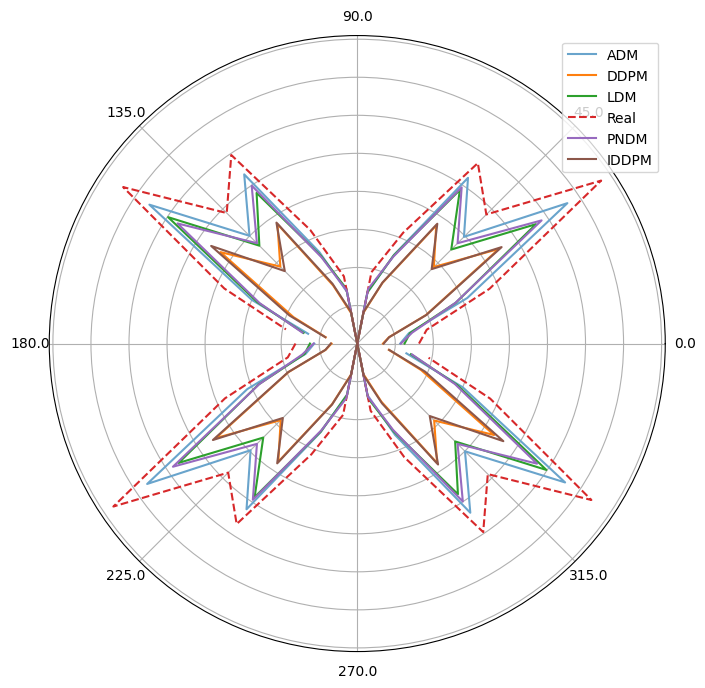

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

def load_image(image_path):
     # Load the image using OpenCV
     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
     return image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return denoised_image


def calculate_angular_spectrum(image, num_steps, angle_range, cutoff_frequency):
    # Compute the Fourier transform of the image
    fourier_transform = np.fft.fftshift(np.fft.fft2(image))
    # fourier_transform = np.fft.fft2(image)

    # Apply low-pass filtering to remove non-informative low-frequency content
    low_pass = np.abs(np.fft.fftfreq(image.shape[0])) <= cutoff_frequency
    fourier_transform[low_pass] = 0.1

    # Define the angle range for the angular spectrum
    min_angle, max_angle = angle_range
    angle_values = np.linspace(min_angle, max_angle, num=num_steps, endpoint=False)
    angle_values = np.unwrap(angle_values)  # Normalize the angle values

    # Calculate the angular spectrum for each angle
    angular_spectrum = np.zeros(num_steps)
    for i, angle in enumerate(angle_values):
        # Calculate the corresponding indices in the Fourier transform based on angle
        x = np.cos(angle)
        y = np.sin(angle)
        indices = np.around(x * (image.shape[1] - 1)).astype(int), np.around(y * (image.shape[0] - 1)).astype(int)

        # Average the values at the indices
        angular_spectrum[i] = np.mean(np.abs(fourier_transform[indices]))

    return angle_values, angular_spectrum


def plot_angular_spectrum(image_path, num_steps, angle_range, cutoff_frequency):
    # Load the image
    image = load_image(image_path)

    # Calculate the angular spectrum
    angle_values, spectrum = calculate_angular_spectrum(image, num_steps, angle_range, cutoff_frequency)

    # Plot the angular spectrum in a polar plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angle_values, spectrum)
    ax.set_xticks(np.linspace(0, 2 * np.pi, num=num_steps, endpoint=False))
    ax.set_xticklabels(np.linspace(0, 360, num=num_steps, endpoint=False))
    ax.set_title('Angular Spectrum')
    ax.set_rticks([])
    ax.grid(True)
    plt.show()


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

# Initialize arrays to store spectra
spectra_all = []

plt.figure(figsize=(8, 8))  # Set figure size
ax = plt.subplot(111, polar=True)  # Create a polar subplot

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:10]
    print(len(image_files))
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate angular spectra
    angle_values, spectra, spectra_all = [], [], []

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Calculate angular spectrum power density
        angle_vals, spectrum = calculate_angular_spectrum(image, num_steps=16, angle_range=(0, np.pi), cutoff_frequency=0)
        angle_values = angle_vals
        spectra.append(spectrum)

    # Store the spectra
    spectra_all.extend(spectra)

    # Compute the average spectrum
    avg_spectrum = np.mean(spectra_all, axis=0)
    # color = np.random.rand(3,)  # Random color for each subfolder
    # Define a color map to assign colors to subfolders
    color_map = {
        'Real': '#d7282a',   # Assign 'crimson' to 'Real' subfolder
        'ADM': '#69a4cc',
        'DDPM': '#fe7f0f',
        'IDDPM': '#8c574a',
        'LDM': '#2ca02c',
        'PNDM': '#976abf',
    }
    color = color_map.get(subfolder, 'gray')  # Use 'gray' as the default color if not found in the color_map
    label = subfolder
    if "Real" in subfolder:
        # Plot "real" subfolder spectra as dashed lines
        original_line_real, = ax.plot(angle_values, avg_spectrum, label=label, color=color, linestyle='--')
    else:
        # Plot synthetic subfolder spectra as solid lines
        original_line, = ax.plot(angle_values, avg_spectrum, label=label, color=color, linestyle='-')

    # Plot the mirror image (180 to 360 degrees) using the same color and label
    mirror_spectrum = np.flip(np.flip(avg_spectrum))

    if "Real" in subfolder:
      mirror_line, = ax.plot(angle_values + np.pi, mirror_spectrum, color=original_line_real.get_color(), linestyle=original_line_real.get_linestyle())
    else:
      mirror_line, = ax.plot(angle_values + np.pi, mirror_spectrum, color=original_line.get_color(), linestyle=original_line.get_linestyle())
    # ax.fill_between(np.concatenate((angle_values, angle_values + np.pi)), np.concatenate((avg_spectrum, mirror_spectrum)), color=color)

    # # Plot the average spectrum as a filled area in the radar chart
    # ax.fill(angle_values, avg_spectrum, alpha=0.25)

# Set the x-axis tick labels
ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
ax.set_xticklabels(np.linspace(0, 360, 8, endpoint=False))
ax.set_yticklabels([])

# Add legend and title
plt.legend()
# plt.title('Average Angular Spectrum')

# Show the plot
plt.show()
